## Import Packages

In [ ]:
pip install aif360 'aif360[Reductions]' 'aif360[inFairness]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install torch torchvision adjustText BlackBoxAuditing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394756 sha256=e9358f642cd4033e75af26bc9c76257aee7a40cffcb253375c35e67f89f96339
  Stored in directory: /root/.cache/pip/wheels/c9/8c/03/073e80e604151fb4cdc68b2e56a97f338d7723e4a4ab5e3823
Successfully built BlackBoxAuditing


In [ ]:
# Data handling and preprocessing
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.inspection import permutation_importance

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import pi
from adjustText import adjust_text

# Machine Learning models
import os
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Boosting models
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Pytorch for NN (MLP)
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch.optim as optim
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from itertools import product

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Fairness Metrics and Analysis
# AIF360
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing, DisparateImpactRemover
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover, MetaFairClassifier

from fairlearn.reductions import DemographicParity, EqualizedOdds, ExponentiatedGradient
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, false_negative_rate
from sklearn.base import clone

/usr/local/lib/python3.11/dist-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/usr/local/lib/python3.11/dist-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_discounted

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [ ]:
random_seed = 57
# PYTHON
os.environ['PYTHONHASHSEED'] = str(random_seed)
random.seed(random_seed)

# NUMPY
np.random.seed(random_seed)

# TENSORFLOW (TF 1.x session)
tf.compat.v1.set_random_seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
tf.set_random_seed(random_seed)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

## Loading Datasets

In [ ]:
# German Credit
cols = [
    'status', 'duration', 'credit_history', 'purpose', 'amount',
    'savings', 'employment', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'residence_since', 'property', 'age',
    'other_installment_plans', 'housing', 'existing_credits',
    'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Read data
data = pd.read_csv(url, header=None, delim_whitespace=True, names=cols)

# Map target label: 1 = good credit, 0 = bad credit
data['credit_risk'] = data['credit_risk'].map({1: 1, 2: 0})

target = 'credit_risk'

# Create a binary gender column (from 'personal_status_sex')
# A91, A93, A94 = male; A92, A95 = female
data['sex'] = data['personal_status_sex'].apply(lambda x: 1 if x in ['A91', 'A93', 'A94'] else 0)
# Create a binary marital status column (from 'personal_status_sex')
# A91, A92, A94 = married/divorced/separated (i.e. having commitments/responsibilities); A93, A95 = Single (i.e. no commitments)
data['marital_status'] = data['personal_status_sex'].apply(lambda x: 1 if x in ['A92', 'A94', 'A91'] else 0)

# convert age to bins
data['age'] = data['age'].apply(lambda x: 1 if x > 25 else 0)

# Optional: drop original sex column
data = data.drop(columns=['personal_status_sex'])

# Quick check
print(data.head())

/tmp/ipython-input-1894845781.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, header=None, delim_whitespace=True, names=cols)


  status  duration credit_history purpose  amount savings employment  \
0    A11         6            A34     A43    1169     A65        A75   
1    A12        48            A32     A43    5951     A61        A73   
2    A14        12            A34     A46    2096     A61        A74   
3    A11        42            A32     A42    7882     A61        A74   
4    A11        24            A33     A40    4870     A61        A73   

   installment_rate other_debtors  residence_since  ...  \
0                 4          A101                4  ...   
1                 2          A101                2  ...   
2                 2          A101                3  ...   
3                 2          A103                4  ...   
4                 3          A101                4  ...   

  other_installment_plans  housing existing_credits   job  people_liable  \
0                    A143     A152                2  A173              1   
1                    A143     A152                1  A173   

In [ ]:
proportion_good_credit = data.groupby('age')['credit_risk'].mean().reset_index()
proportion_good_credit.rename(columns={'credit_risk': 'proportion_good_credit'}, inplace=True)

print("Proportion of Good Credit Risk for Each Age Bin:")
print(proportion_good_credit)

Proportion of Good Credit Risk for Each Age Bin:
   age  proportion_good_credit
0    0                0.578947
1    1                0.728395


In [ ]:
data

status  duration credit_history purpose  amount savings employment  \
0      A11         6            A34     A43    1169     A65        A75   
1      A12        48            A32     A43    5951     A61        A73   
2      A14        12            A34     A46    2096     A61        A74   
3      A11        42            A32     A42    7882     A61        A74   
4      A11        24            A33     A40    4870     A61        A73   
..     ...       ...            ...     ...     ...     ...        ...   
995    A14        12            A32     A42    1736     A61        A74   
996    A11        30            A32     A41    3857     A61        A73   
997    A14        12            A32     A43     804     A61        A75   
998    A11        45            A32     A43    1845     A61        A73   
999    A12        45            A34     A41    4576     A62        A71   

     installment_rate other_debtors  residence_since  ...  \
0                   4          A101                4  ...   
1                   2          A101                2  ...   
2                   2          A101                3  ...   
3                   2          A103                4  ...   
4                   3          A101                4  ...   
..                ...           ...              ...  ...   
995                 3          A101                4  ...   
996                 4          A101                4  ...   
997                 4          A101                4  ...   
998                 4          A101                4  ...   
999                 3          A101                4  ...   

    other_installment_plans housing existing_credits   job  people_liable  \
0                      A143    A152                2  A173              1   
1                      A143    A152                1  A173              1   
2                      A143    A152                1  A172              2   
3                      A143    A153                1  A173              2   
4                      A143    A153                2  A173              2   
..                      ...     ...              ...   ...            ...   
995                    A143    A152                1  A172              1   
996                    A143    A152                1  A174              1   
997                    A143    A152                1  A173              1   
998                    A143    A153                1  A173              1   
999                    A143    A152                1  A173              1   

    telephone  foreign_worker credit_risk sex  marital_status  
0        A192            A201           1   1               0  
1        A191            A201           0   0               1  
2        A191            A201           1   1               0  
3        A191            A201           1   1               0  
4        A191            A201           0   1               0  
..        ...             ...         ...  ..             ...  
995      A191            A201           1   0               1  
996      A192            A201           1   1               1  
997      A191            A201           1   1               0  
998      A192            A201           0   1               0  
999      A191            A201           1   1               0  

[1000 rows x 22 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   object  
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   object  
 3   purpose                  1000 non-null   object  
 4   amount                   1000 non-null   int64   
 5   savings                  1000 non-null   object  
 6   employment               1000 non-null   object  
 7   installment_rate         1000 non-null   int64   
 8   other_debtors            1000 non-null   object  
 9   residence_since          1000 non-null   int64   
 10  property                 1000 non-null   object  
 11  age                      1000 non-null   category
 12  other_installment_plans  1000 non-null   object  
 13  housing                  1000 non-null   object  
 14  existing_

In [ ]:
# save data to drive
data.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/datasets/German/Raw/German_orig.csv')

## Data Integrity Check

In [ ]:
def check_data_integrity(df, target):
    """
    Check for data integrity issues such as missing values, duplicates, and outliers.
    """
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing values in each column:\n", missing_values[missing_values > 0])

    # List out columns with missing or NA values
    missing_columns = df.columns[df.isna().any()].tolist()
    print("Columns with missing or NA values:")
    print(missing_columns)

    # Check for duplicates
    duplicates = df.duplicated().sum()
    print("Number of duplicate rows:", duplicates)

    # Check for unique values in categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    print("Unique values in categorical columns:")
    for col in categorical_columns:
        unique_values = df[col].unique()
        print(f"{col}: {len(unique_values)} unique values")

    # Check for class imbalance
    plt.figure(figsize=(4, 3))
    sns.countplot(x=target, data=df)
    plt.title('Class Distribution')
    plt.xlabel(target)
    plt.ylabel('Count')
    plt.show()

    # Check for outliers using boxplots
    num_numeric_cols = len(df.select_dtypes(include=[np.number]).columns)
    num_rows = (num_numeric_cols + 3) // 4  # Calculate rows needed
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
        plt.subplot(num_rows, 4, i + 1)  # Adjust subplot grid
        sns.boxplot(x=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

    '''
    # Show all feature distribution
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
        plt.subplot(2, 4, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    '''

    # Show feature distribution by income
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
        plt.subplot(num_rows, 4, i + 1)  # Adjust subplot grid to accommodate more columns
        sns.histplot(df[df[target] == 0][col], kde=True, label='Target Value = 0', color='blue', alpha=0.5)
        sns.histplot(df[df[target] == 1][col], kde=True, label='Target Value = 1', color='red', alpha=0.5)
        plt.title(col)
        plt.xlabel('Value')


Missing values in each column:
 Series([], dtype: int64)
Columns with missing or NA values:
[]
Number of duplicate rows: 47
Unique values in categorical columns:
workclass: 7 unique values
education: 16 unique values
marital-status: 7 unique values
occupation: 14 unique values
relationship: 6 unique values
native-country: 41 unique values


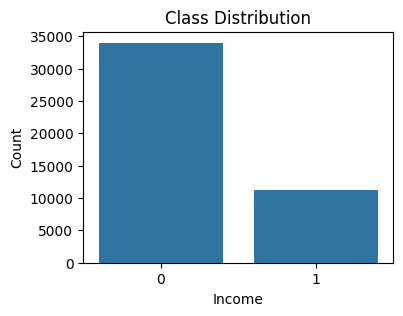

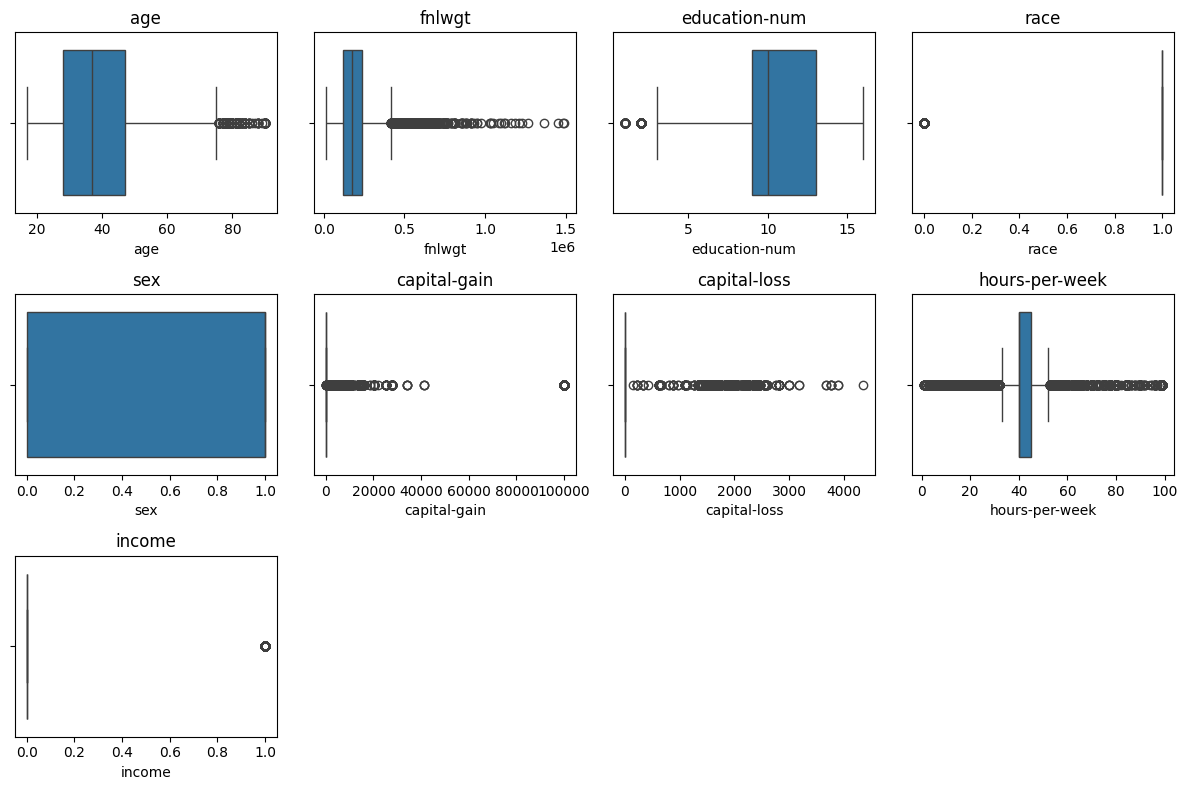

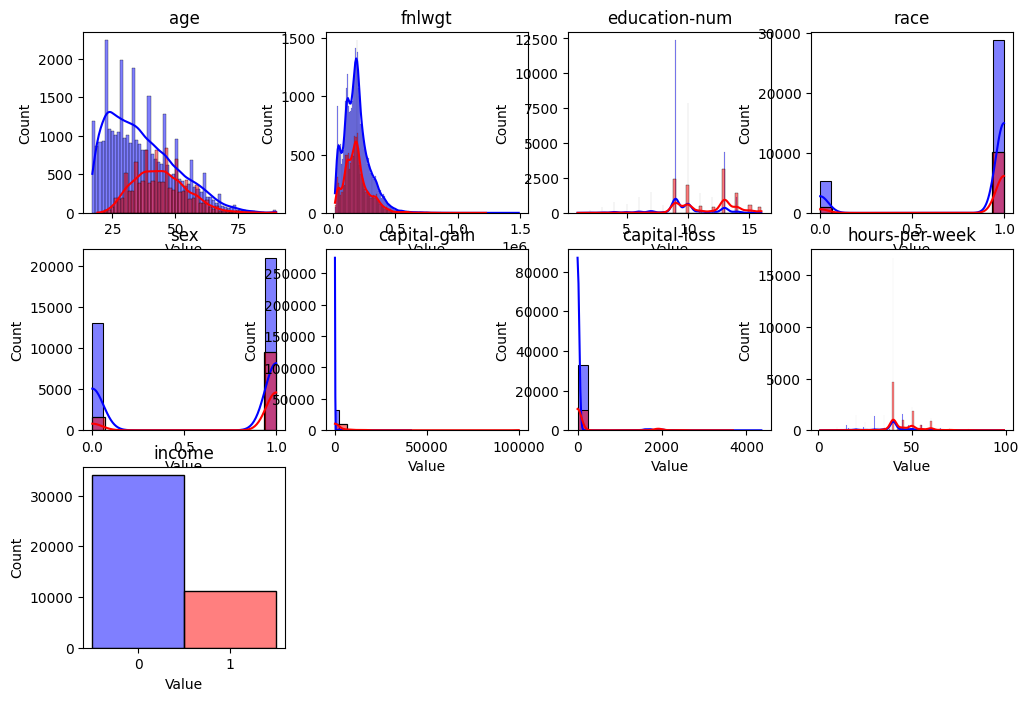

In [ ]:
check_data_integrity(data, target)

## Preprocessing

In [ ]:
def data_preprocessing(data, target):
    # Encode categorical variables
    cat_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

    data_OHE = pd.get_dummies(data, columns=cat_features, drop_first=True)

    X = data_OHE.drop(target, axis=1)
    y = data_OHE[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = data_preprocessing(data, target)

## MODEL SELECTION & FAIRNESS EVALUATION

In [ ]:
sensitive_feature = 'sex'

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 2)  # Binary classification with 2 logits

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)  # Raw logits

class PyTorchMLPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim=10, hidden_dim=64, lr=0.001, epochs=20, batch_size=64, random_state=random_seed):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.random_state = random_state
        self._build_model()

    def _set_seed(self):
        seed = self.random_state
        os.environ['PYTHONHASHSEED'] = str(seed)
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    def _build_model(self):
        self.model = SimpleMLP(self.input_dim, self.hidden_dim)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def fit(self, X, y, sample_weight=None):
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.longlong)
        X, y = check_X_y(X, y)
        self._build_model()

        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)

        if sample_weight is not None:
            sw_tensor = torch.tensor(sample_weight, dtype=torch.float32).to(self.device)
        else:
            sw_tensor = torch.ones(len(X_tensor)).to(self.device)

        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        criterion = nn.CrossEntropyLoss(reduction='none')

        for epoch in range(self.epochs):
            self.model.train()
            for i in range(0, len(X_tensor), self.batch_size):
                x_batch = X_tensor[i:i+self.batch_size]
                y_batch = y_tensor[i:i+self.batch_size]
                sw_batch = sw_tensor[i:i+self.batch_size]

                optimizer.zero_grad()
                logits = self.model(x_batch)
                loss = criterion(logits, y_batch)
                loss = (loss * sw_batch).mean()
                loss.backward()
                optimizer.step()

        return self

    def predict(self, X):
        X = np.asarray(X, dtype=np.float32)
        X = check_array(X)
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model(X_tensor)
            preds = torch.argmax(logits, dim=1)
        return preds.cpu().numpy().ravel()

    def predict_proba(self, X):
        X = np.asarray(X, dtype=np.float32)
        X = check_array(X)
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model(X_tensor)
            probs = F.softmax(logits, dim=1)
        probs = probs.cpu().numpy()
        return probs

In [ ]:
# Dictionary of models
models = {
    "LR": LogisticRegression(max_iter=2000, random_state=random_seed),
    "NB": GaussianNB(),
    "RF": RandomForestClassifier(random_state=random_seed),
    "DT": DecisionTreeClassifier(random_state=random_seed),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_seed),
    "LGBM": LGBMClassifier(random_state=random_seed),
    "GBM": GradientBoostingClassifier(random_state=random_seed),
    "MLP": PyTorchMLPWrapper(input_dim=X_train.shape[1])
}

In [ ]:
param_grid = {
    "NB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    "LR": {
        'C': [0.1, 1, 10],
        'penalty': ['l2', 'l1'],
        'solver': ['liblinear', 'saga']
    },
    "RF": {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30],
        #'min_samples_split': [2, 5, 10],
        #'min_samples_leaf': [1, 2, 4]
    },
    "DT": {
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        #'min_samples_leaf': [1, 2, 4]
    },
    "XGB": {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1]
    },
    "LGBM": {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
        'learning_rate': [0.01, 0.1]
    },
    "GBM": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "MLP": {
        'hidden_dim': [32, 64],
        'lr': [0.001, 0.01],
        'epochs': [10, 20]
    }
}


### Combined Functions

In [ ]:
#Use This (FINAL)
def train_evaluate_plot(models, param_grid, X_train, y_train, X_test, y_test, target, sensitive_feature):
    results = {}

    test_splits = np.array_split(np.arange(len(X_test)), 3)

    param_combinations = list(product(*param_grid['MLP'].values()))
    param_names = list(param_grid['MLP'].keys())

    for name, model in models.items():
        if name != 'MLP':
            pipe = ImbPipeline([
                ('scaler', MinMaxScaler()),
                ('clf', model)
            ])
            updated_param_grid = {f"clf__{key}": value for key, value in param_grid[name].items()}
            cv = GridSearchCV(pipe, updated_param_grid, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
            cv.fit(X_train, y_train)
            best_model = cv.best_estimator_

            cv_results = cv.cv_results_
            train_cv_score = np.mean(cv_results['mean_train_score'])
            val_cv_score = np.mean(cv_results['mean_test_score'])

            acc_list, f1_list, roc_list = [], [], []
            sp_list, eo_list, eodd_list, aod_list = [], [], [], []
            tpr_list, fpr_list, fnr_list = [], [], []

            for split in test_splits:
                X_split = X_test.iloc[split]
                y_split = y_test.iloc[split]

                y_pred = best_model.predict(X_split)
                y_prob = best_model.predict_proba(X_split)[:, 1]

                acc_list.append(accuracy_score(y_split, y_pred))
                f1_list.append(f1_score(y_split, y_pred))
                roc_list.append(roc_auc_score(y_split, y_prob))

                true_df = X_split.copy()
                true_df[target] = y_split.values
                pred_df = X_split.copy()
                pred_df[target] = y_pred

                true_dataset = BinaryLabelDataset(df=true_df, label_names=[target], protected_attribute_names=[sensitive_feature])
                pred_dataset = BinaryLabelDataset(df=pred_df, label_names=[target], protected_attribute_names=[sensitive_feature])

                metric = ClassificationMetric(true_dataset, pred_dataset,
                                              unprivileged_groups=[{sensitive_feature: 0}],
                                              privileged_groups=[{sensitive_feature: 1}])

                sp_list.append(metric.statistical_parity_difference())
                eo_list.append(metric.equal_opportunity_difference())
                eodd_list.append(metric.equalized_odds_difference())
                aod_list.append(metric.average_odds_difference())

                tpr_list.append(metric.true_positive_rate())
                fpr_list.append(metric.false_positive_rate())
                fnr_list.append(metric.false_negative_rate())

            results[name] = {
                'train_cv_f1': train_cv_score,
                'val_cv_f1': val_cv_score,
                'accuracy': np.mean(acc_list),
                'f1': np.mean(f1_list),
                'roc_auc': np.mean(roc_list),
                'stat_parity': np.mean(sp_list),
                'equal_opp': np.mean(eo_list),
                'equal_odds': np.mean(eodd_list),
                'avg_odds_diff': np.mean(aod_list),
                'tpr': np.mean(tpr_list),
                'fpr': np.mean(fpr_list),
                'fnr': np.mean(fnr_list),
                'best_model': best_model
            }

        else:
            # Manual CV for PyTorch MLP
            scaler = MinMaxScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            X_np = X_train_scaled
            y_np = y_train.to_numpy() if hasattr(y_train, "to_numpy") else y_train

            best_score = -1
            best_params = None

            skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
            for values in param_combinations:
                params = dict(zip(param_names, values))
                fold_scores = []

                for train_idx, val_idx in skf.split(X_np, y_np):
                    X_fold_train, X_fold_val = X_np[train_idx], X_np[val_idx]
                    y_fold_train, y_fold_val = y_np[train_idx], y_np[val_idx]

                    model = PyTorchMLPWrapper(
                        input_dim=X_np.shape[1],
                        hidden_dim=params['hidden_dim'],
                        lr=params['lr'],
                        epochs=params['epochs']
                    )
                    model.fit(X_fold_train, y_fold_train)
                    y_pred = model.predict(X_fold_val)
                    fold_scores.append(f1_score(y_fold_val, y_pred))

                avg_score = np.mean(fold_scores)
                if avg_score > best_score:
                    best_score = avg_score
                    best_params = params

            best_model = PyTorchMLPWrapper(
                input_dim=X_np.shape[1],
                hidden_dim=best_params['hidden_dim'],
                lr=best_params['lr'],
                epochs=best_params['epochs']
            )
            best_model.fit(X_np, y_np)
            train_cv_score = val_cv_score = best_score

            acc_list, f1_list, roc_list = [], [], []
            sp_list, eo_list, eodd_list, aod_list = [], [], [], []
            tpr_list, fpr_list, fnr_list = [], [], []

            for split in test_splits:
                X_split = pd.DataFrame(X_test_scaled[split], columns=X_test.columns)
                y_split = y_test.iloc[split]

                y_pred = best_model.predict(X_split)
                y_prob = best_model.predict_proba(X_split)[:, 1]

                acc_list.append(accuracy_score(y_split, y_pred))
                f1_list.append(f1_score(y_split, y_pred))
                roc_list.append(roc_auc_score(y_split, y_prob))

                true_df = X_split.copy()
                true_df[target] = y_split.values
                pred_df = X_split.copy()
                pred_df[target] = y_pred

                true_dataset = BinaryLabelDataset(df=true_df, label_names=[target], protected_attribute_names=[sensitive_feature])
                pred_dataset = BinaryLabelDataset(df=pred_df, label_names=[target], protected_attribute_names=[sensitive_feature])

                metric = ClassificationMetric(true_dataset, pred_dataset,
                                              unprivileged_groups=[{sensitive_feature: 0}],
                                              privileged_groups=[{sensitive_feature: 1}])

                sp_list.append(metric.statistical_parity_difference())
                eo_list.append(metric.equal_opportunity_difference())
                eodd_list.append(metric.equalized_odds_difference())
                aod_list.append(metric.average_odds_difference())

                tpr_list.append(metric.true_positive_rate())
                fpr_list.append(metric.false_positive_rate())
                fnr_list.append(metric.false_negative_rate())

            results[name] = {
                'train_cv_f1': train_cv_score,
                'val_cv_f1': val_cv_score,
                'accuracy': np.mean(acc_list),
                'f1': np.mean(f1_list),
                'roc_auc': np.mean(roc_list),
                'stat_parity': np.mean(sp_list),
                'equal_opp': np.mean(eo_list),
                'equal_odds': np.mean(eodd_list),
                'avg_odds_diff': np.mean(aod_list),
                'tpr': np.mean(tpr_list),
                'fpr': np.mean(fpr_list),
                'fnr': np.mean(fnr_list),
                'best_model': best_model
            }

    results_df = pd.DataFrame(results).T.sort_values(by='f1', ascending=False)

    metrics_df = results_df[['train_cv_f1', 'val_cv_f1', 'accuracy', 'f1', 'roc_auc']].astype(float)
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title("Model Performance Comparison")
    plt.xlabel("Metric")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()

    fairness_metrics = ['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff', 'tpr', 'fpr', 'fnr']
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    plt.suptitle('Fairness Metrics and Rates Comparison')
    axes = axes.flatten()

    for i, metric in enumerate(fairness_metrics):

        sns.barplot(x=results_df.index, y=metric, data=results_df, ax=axes[i])
        axes[i].set_title(metric.replace('_', ' ').title())
        axes[i].set_xlabel('Model')
        axes[i].set_ylabel(metric.replace('_', ' ').title())
        if metric in ['stat_parity', 'equal_opp', 'equal_odds']:
            axes[i].axhline(0, linestyle='--', color='gray')

    for j in range(len(fairness_metrics), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    perf_metrics = ['accuracy', 'f1', 'roc_auc']
    fair_metrics = ['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff']

    perf_norm = results_df[perf_metrics] / results_df[perf_metrics].max()
    fair_norm = 1 - results_df[fair_metrics].abs() / results_df[fair_metrics].abs().max()

    def radar_chart(data_norm, title, metrics, subplot_idx):
        N = len(metrics)
        angles = [n / float(N) * 2 * pi for n in range(N)] + [0]
        ax = plt.subplot(1, 2, subplot_idx, polar=True)
        for model in data_norm.index:
            values = data_norm.loc[model].tolist() + [data_norm.loc[model].tolist()[0]]
            ax.plot(angles, values, label=model)
            ax.fill(angles, values, alpha=0.1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        ax.set_title(title, size=13)

    plt.figure(figsize=(14, 6))
    radar_chart(perf_norm, 'Performance Metrics (Higher = Better)', perf_metrics, 1)
    radar_chart(fair_norm, 'Fairness Metrics (Higher = Fairer)', fair_metrics, 2)

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(results_df.index))
    plt.tight_layout()
    plt.show()

    return results, results_df

In [ ]:
def pareto_plot(df):
    # Plot Pareto grid (F1 vs AOD)
    plt.figure(figsize=(8, 5))

    # Use 1 - |AOD| as fairness score
    x = 1 - abs(df['avg_odds_diff'])
    y = df['f1']
    labels = df.index

    # Optional: color by another metric (e.g., accuracy)
    colors = df['accuracy']

    # Use seaborn for better style
    sns.set(style="whitegrid")

    # Scatter plot with colormap
    scatter = plt.scatter(x, y, c=colors, cmap='viridis', s=100, edgecolor='k')

    # Prepare text labels
    texts = []
    for i, label in enumerate(labels):
        texts.append(plt.text(x.iloc[i]+0.002, y.iloc[i], label, fontsize=9, ha='left', va='center'))

    # Auto-adjust labels to avoid overlap
    adjust_text(
        texts,
        only_move={'points': 'y', 'texts': 'xy'},  # allow smarter repositioning
        arrowprops=dict(arrowstyle="-", color='gray', lw=0.5)
    )

    # Axes and title
    plt.xlabel('1 - |Average Odds Difference| (Higher = Fairer)', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.title('Fairness–Performance Trade-off Across Models', fontsize=14)

    # Colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Accuracy', rotation=270, labelpad=15)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:11:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 560, number of negative: 240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700000 -> initscore=0.847298
[LightGBM] [Info] Start training from score 0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

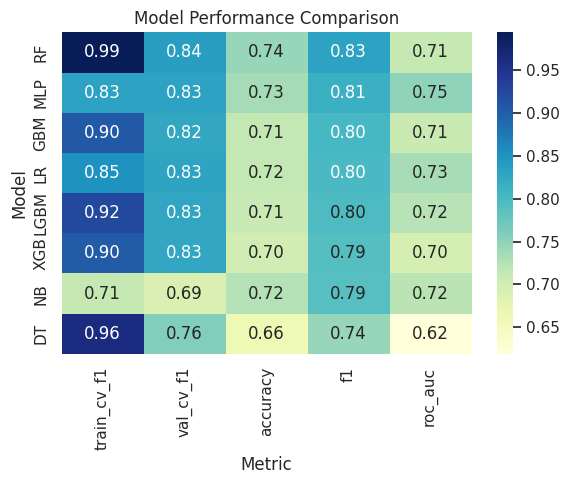

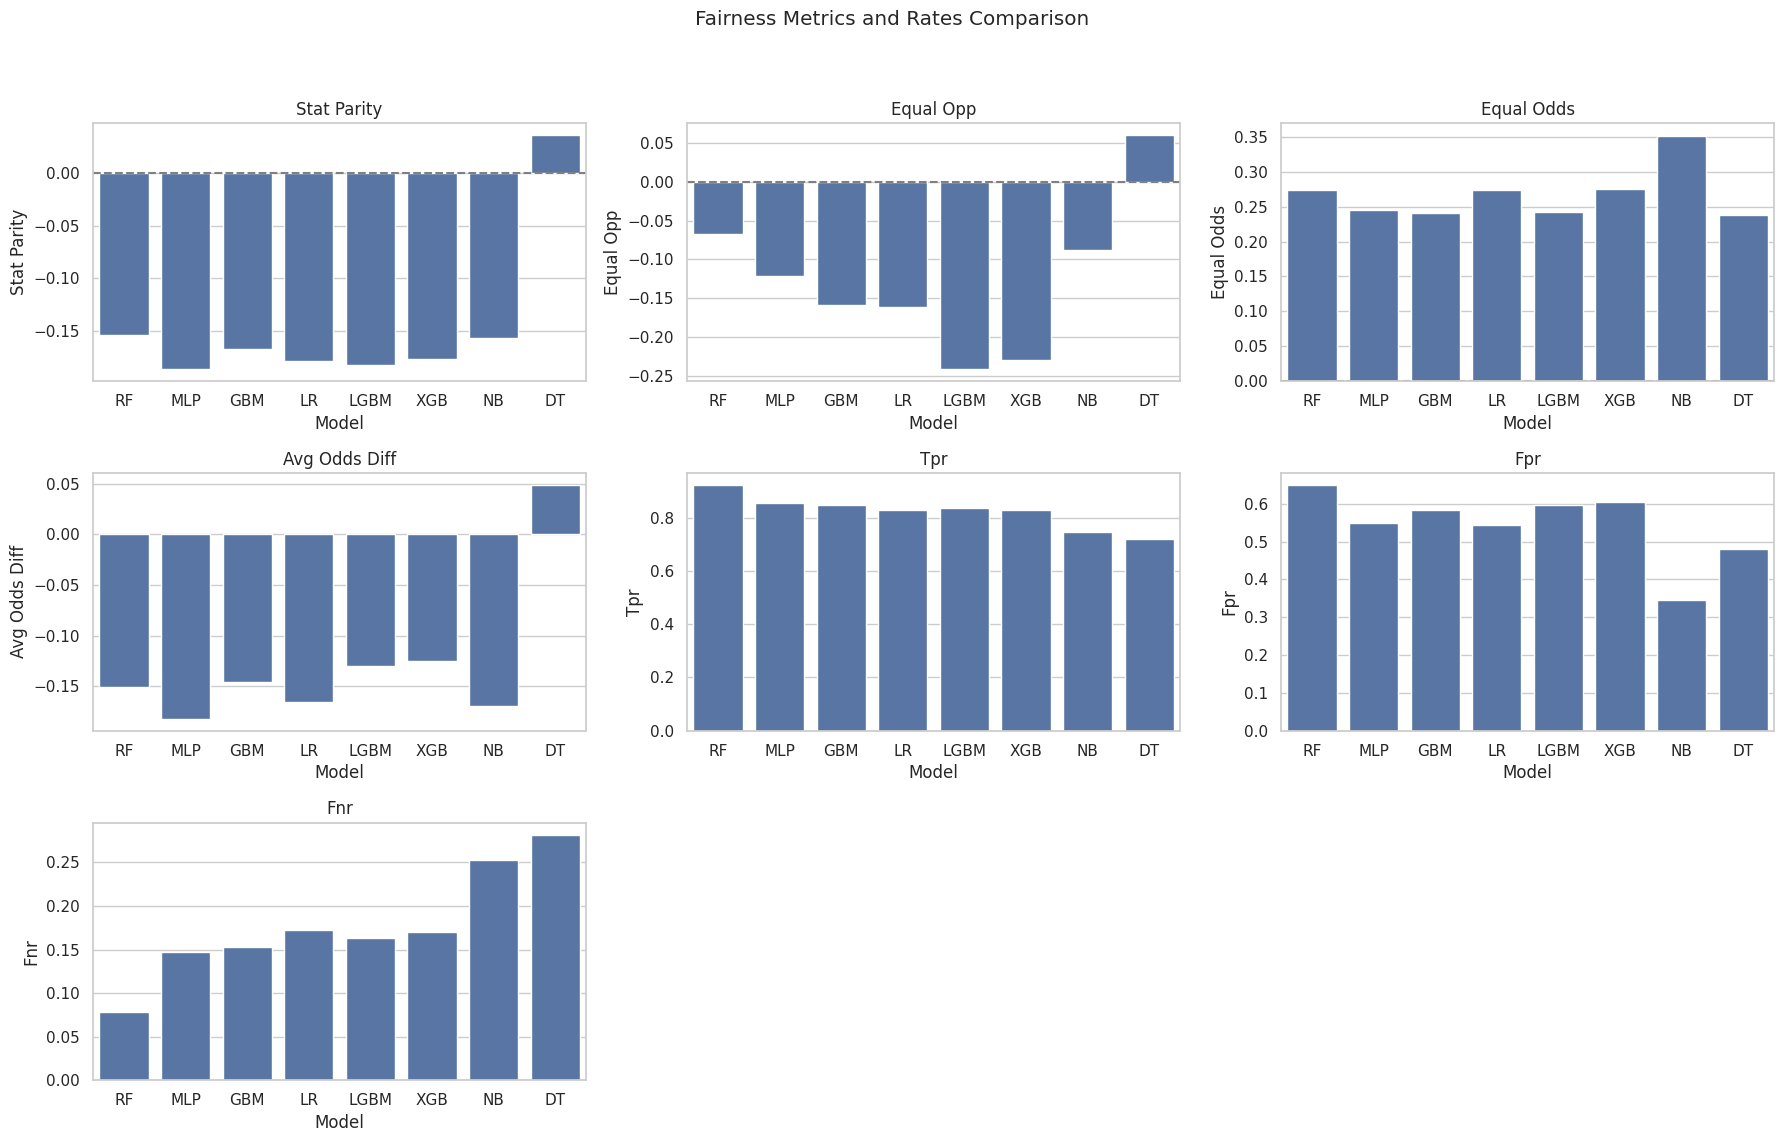

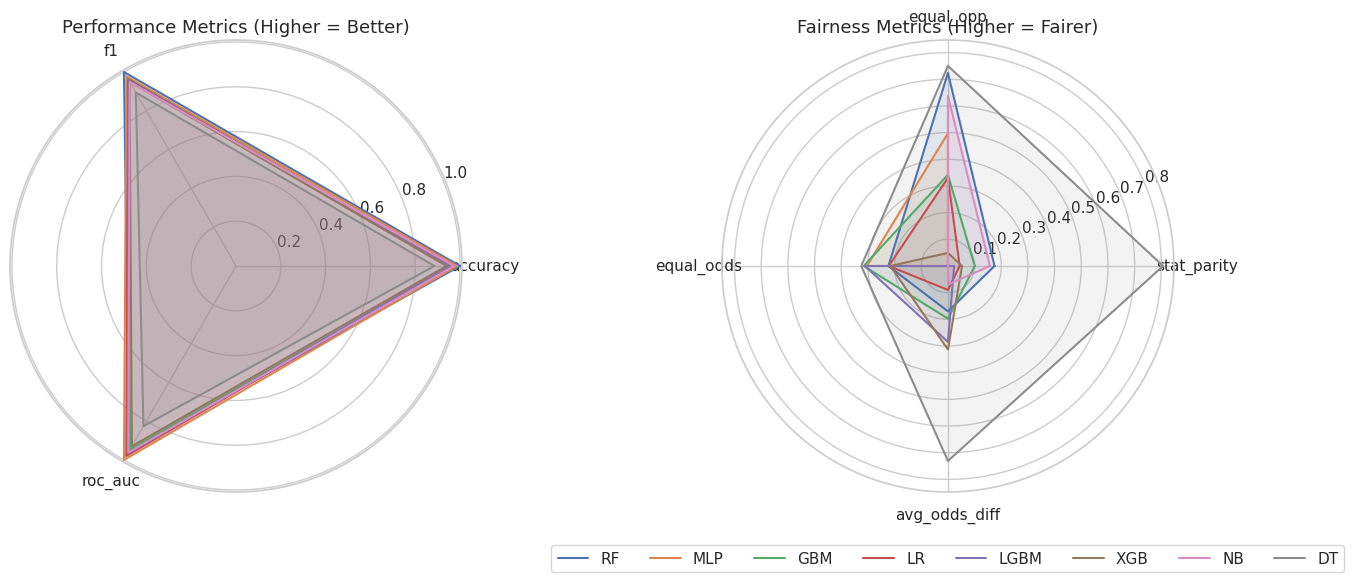

In [ ]:
results_dict, results_df = train_evaluate_plot(models, param_grid, X_train, y_train, X_test, y_test, target, sensitive_feature)

In [ ]:
results_df

train_cv_f1 val_cv_f1  accuracy        f1   roc_auc stat_parity  \
RF      0.993749  0.837171  0.744912  0.832409  0.713992   -0.154067   
MLP     0.831359  0.831359  0.734886  0.814055  0.749687   -0.186687   
GBM     0.904906  0.824924  0.714986  0.803229  0.708854   -0.167881   
LR      0.850529  0.830668  0.715061  0.800219  0.734301   -0.178452   
LGBM    0.922384  0.827208  0.710011  0.796288  0.724258   -0.182352   
XGB     0.902606   0.82652  0.700286  0.791164  0.696572   -0.176804   
NB      0.713954  0.689634  0.724634   0.78976  0.720696   -0.157324   
DT      0.961679  0.758322  0.660184   0.74426  0.619152    0.036063   

     equal_opp equal_odds avg_odds_diff       tpr       fpr       fnr  \
RF   -0.066764   0.273392     -0.151297  0.921274  0.649393  0.078726   
MLP  -0.121467   0.244963     -0.182327  0.852937  0.550202  0.147063   
GBM  -0.159174   0.240854     -0.146304  0.847208  0.583986  0.152792   
LR   -0.161976   0.273749     -0.165952  0.827296  0.545479  0.172704   
LGBM -0.241837   0.242168     -0.130405  0.837032  0.598021  0.162968   
XGB  -0.229959   0.275924     -0.125225   0.82991  0.606163   0.17009   
NB   -0.087537   0.351941     -0.169592  0.747176  0.345929  0.252824   
DT    0.060429   0.237536      0.049027  0.718421  0.480117  0.281579   

                                             best_model  
RF    (MinMaxScaler(), (DecisionTreeClassifier(max_d...  
MLP                     PyTorchMLPWrapper(input_dim=47)  
GBM   (MinMaxScaler(), ([DecisionTreeRegressor(crite...  
LR    (MinMaxScaler(), LogisticRegression(C=1, max_i...  
LGBM  (MinMaxScaler(), LGBMClassifier(max_depth=20, ...  
XGB   (MinMaxScaler(), XGBClassifier(base_score=None...  
NB    (MinMaxScaler(), GaussianNB(var_smoothing=1e-07))  
DT    (MinMaxScaler(), DecisionTreeClassifier(max_de...

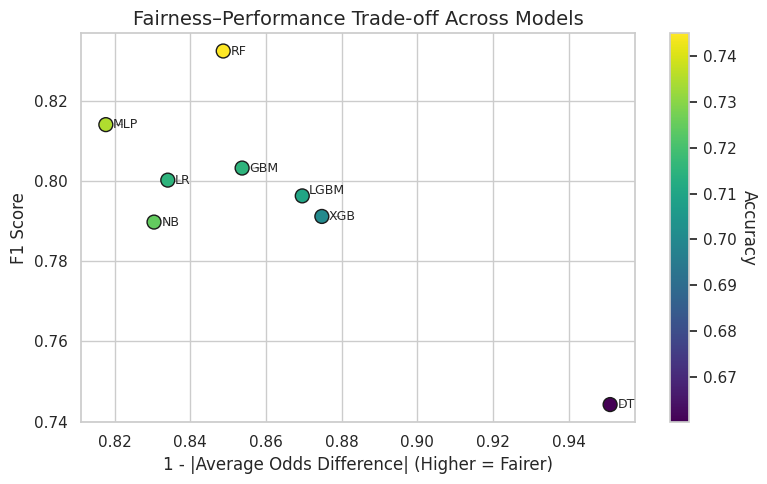

In [ ]:
pareto_plot(results_df)

In [ ]:
# Export the results DataFrame to a CSV file
results_df.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/Results/German/German_sex_original_models.csv')

## Fairness Mitigation

In [ ]:
# Define weights for each metric (tune these based on priority)
w_f1 = 0.5        # Equal weightage between performance and fairness
w_spd = 0.25      # Equal weightage for the 4 fairness metrics
w_eod = 0.25
w_eopp = 0.25
w_aod = 0.25

# Scoring function: higher is better
def composite_score(result):
    f1 = result['f1']
    spd = abs(result['stat_parity'])  # smaller is better → we subtract from 1
    eod = abs(result['equal_odds'])
    eopp = abs(result['equal_opp'])
    aod = abs(result['avg_odds_diff'])

    # Combine the fairness scores into 1 with equal weightage and invert it (higher better)
    fairness_score = 1 - (w_spd * spd + w_eod * eod + w_eopp * eopp + w_aod * aod)
    return w_f1 * f1 + (1 - w_f1) * fairness_score

In [ ]:
# Select model with highest composite score
best_name = max(results_dict, key=lambda x: composite_score(results_dict[x]))
best_model = results_dict[best_name]['best_model']

print(f"Balanced Best Model: {best_name}")

# Check if it's a pipeline
if isinstance(best_model, Pipeline):
    print("Model parameters:")
    print(best_model.named_steps['clf'].get_params())
else:
    print("Model parameters:")
    print(best_model.get_params())

Balanced Best Model: RF
Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 57, 'verbose': 0, 'warm_start': False}


### Fairness Constraints Functions

####Redundant function

In [ ]:
def RW(best_name, X_train, y_train, X_test, y_test, sensitive_feature):
    rw_results = {}

    # Apply Reweighing
    train_df = X_train.copy()
    train_df['income'] = y_train.values

    train_bld = BinaryLabelDataset(df=train_df, label_names=['income'], protected_attribute_names=[sensitive_feature])
    RW = Reweighing(unprivileged_groups=[{sensitive_feature: 0}], privileged_groups=[{sensitive_feature: 1}])
    train_rw = RW.fit_transform(train_bld)

    # Train on reweighed data
    X_rw = train_rw.features
    y_rw = train_rw.labels.ravel()
    weights = train_rw.instance_weights

    reweigh_model = ImbPipeline([
        ('scaler', MinMaxScaler()),
        ('clf', results_dict[best_name]['best_model'].named_steps['clf'])
    ])

    reweigh_model.fit(X_rw, y_rw, clf__sample_weight=weights)
    y_pred_rw = reweigh_model.predict(X_test)

    # Evaluate
    acc_rw = accuracy_score(y_test, y_pred_rw)
    f1_rw = f1_score(y_test, y_pred_rw)
    roc_rw = roc_auc_score(y_test, reweigh_model.predict_proba(X_test)[:, 1])

    test_df_rw = X_test.copy()
    test_df_rw['income'] = y_test.values
    pred_df_rw = X_test.copy()
    pred_df_rw['income'] = y_pred_rw

    true_ds_rw = BinaryLabelDataset(df=test_df_rw, label_names=['income'], protected_attribute_names=[sensitive_feature])
    pred_ds_rw = BinaryLabelDataset(df=pred_df_rw, label_names=['income'], protected_attribute_names=[sensitive_feature])

    metric_rw = ClassificationMetric(true_ds_rw, pred_ds_rw,
                                    unprivileged_groups=[{sensitive_feature: 0}],
                                    privileged_groups=[{sensitive_feature: 1}])
    rw_results = {
            'accuracy': acc_rw,
            'f1': f1_rw,
            'roc_auc': roc_rw,
            'stat_parity': metric_rw.statistical_parity_difference(),
            'equal_opp': metric_rw.equal_opportunity_difference(),
            'equal_odds': metric_rw.equalized_odds_difference(),
            'avg_odds_diff': metric_rw.average_odds_difference(),
            'tpr': metric_rw.true_positive_rate(),
            'fpr': metric_rw.false_positive_rate(),
            'fnr': metric_rw.false_negative_rate(),
            'best_model': best_model
        }

    # Concatenate results
    rw_results_df = pd.DataFrame(rw_results, index=['RW'])
    combined_results = pd.concat([results_df.loc[[best_name]], rw_results_df], axis=0)

    # Visualization
    plot_data = pd.DataFrame({
        'Metric': ['Accuracy', 'F1 Score', 'ROC AUC', 'Stat_Parity_Diff', 'Equal_Opp_Diff', 'Equal_Odd_Diff'],
        'Base': [combined_results['accuracy'].iloc[0], combined_results['f1'].iloc[0], combined_results['roc_auc'].iloc[0], combined_results['stat_parity'].iloc[0], combined_results['equal_opp'].iloc[0], combined_results['equal_odds'].iloc[0]],
        'Reweigh': [combined_results['accuracy'].iloc[1], combined_results['f1'].iloc[1], combined_results['roc_auc'].iloc[1], combined_results['stat_parity'].iloc[1], combined_results['equal_opp'].iloc[1], combined_results['equal_odds'].iloc[1]]
    })

    # Plot
    ax = plot_data.plot(x='Metric', kind='bar', figsize=(8, 4))
    plt.title('Model Comparison')
    plt.ylabel('Score')
    plt.xlabel('Evaluation Metric')
    plt.xticks(rotation=0)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

    return rw_results_df, combined_results

In [ ]:
def adv_debias(best_name, X_train, y_train, X_test, y_test, sensitive_feature):
    adv_results = {}

    # Scale inputs to [0, 1]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    X_train_df[sensitive_feature] = X_train[sensitive_feature].values.astype(int)
    X_test_df[sensitive_feature] = X_test[sensitive_feature].values.astype(int)
    X_train_df['income'] = y_train.values
    X_test_df['income'] = y_test.values

    # Create BinaryLabelDatasets
    train_bld = BinaryLabelDataset(
        df=X_train_df,
        label_names=['income'],
        protected_attribute_names=[sensitive_feature]
    )

    test_bld = BinaryLabelDataset(
        df=X_test_df,
        label_names=['income'],
        protected_attribute_names=[sensitive_feature]
    )

    tf.compat.v1.reset_default_graph()
    sess = tf.compat.v1.Session()

    # Train adversarial debiasor
    adv_debiasor = AdversarialDebiasing(
        privileged_groups=[{sensitive_feature: 1}],
        unprivileged_groups=[{sensitive_feature: 0}],
        scope_name='adv_debiasing',
        debias=True,
        sess=sess,
        num_epochs=10,
        batch_size=128
    )
    adv_debiasor.fit(train_bld)
    pred_adv = adv_debiasor.predict(test_bld)

    # Evaluate
    adv_metric = ClassificationMetric(
        test_bld, pred_adv,
        privileged_groups=[{sensitive_feature: 1}],
        unprivileged_groups=[{sensitive_feature: 0}]
    )

    # Record results
    y_true_adv = test_bld.labels.ravel()
    y_pred_adv = pred_adv.labels.ravel()
    acc_adv = accuracy_score(y_true_adv, y_pred_adv)
    f1_adv = f1_score(y_true_adv, y_pred_adv)
    roc_adv = roc_auc_score(y_true_adv, pred_adv.scores)

    adv_results = {
        'accuracy': acc_adv,
        'f1': f1_adv,
        'roc_auc': roc_adv,
        'stat_parity': adv_metric.statistical_parity_difference(),
        'equal_opp': adv_metric.equal_opportunity_difference(),
        'equal_odds': adv_metric.equalized_odds_difference(),
        'adv_model': adv_debiasor
    }

    # Concatenate results
    adv_results_df = pd.DataFrame(adv_results, index=['ADV'])
    combined_results = pd.concat([results_df.loc[[best_name]], adv_results_df], axis=0)

    # Visualization
    plot_data = pd.DataFrame({
        'Metric': ['Accuracy', 'F1 Score', 'ROC AUC', 'Stat_Parity_Diff', 'Equal_Opp_Diff', 'Equal_Odd_Diff'],
        'Base': [combined_results['accuracy'].iloc[0], combined_results['f1'].iloc[0], combined_results['roc_auc'].iloc[0], combined_results['stat_parity'].iloc[0], combined_results['equal_opp'].iloc[0], combined_results['equal_odds'].iloc[0]],
        'AdvDebias': [combined_results['accuracy'].iloc[1], combined_results['f1'].iloc[1], combined_results['roc_auc'].iloc[1], combined_results['stat_parity'].iloc[1], combined_results['equal_opp'].iloc[1], combined_results['equal_odds'].iloc[1]]
    })

    # Plot
    ax = plot_data.plot(x='Metric', kind='bar', figsize=(8, 4))
    plt.title('Model Comparison')
    plt.ylabel('Score')
    plt.xlabel('Evaluation Metric')
    plt.xticks(rotation=0)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

    return adv_results_df, combined_results

In [ ]:
def PR(best_name, X_train, y_train, X_test, y_test, sensitive_feature, results_df, results_dict):
    pr_results = {}

    # Prepare train and test datasets
    train_df = X_train.copy()
    train_df['income'] = y_train.values
    test_df = X_test.copy()
    test_df['income'] = y_test.values

    # Convert to BinaryLabelDataset
    train_bld = BinaryLabelDataset(df=train_df, label_names=['income'], protected_attribute_names=[sensitive_feature])
    test_bld = BinaryLabelDataset(df=test_df, label_names=['income'], protected_attribute_names=[sensitive_feature])

    # Train Prejudice Remover
    pr_model = PrejudiceRemover(sensitive_attr=sensitive_feature, eta=25.0)
    pr_model.fit(train_bld)
    pred_pr = pr_model.predict(test_bld)

    # Get predictions
    y_pred_pr = pred_pr.labels.ravel()
    y_true = y_test.values
    y_score = pred_pr.scores.ravel()

    # Evaluate
    acc_pr = accuracy_score(y_true, y_pred_pr)
    f1_pr = f1_score(y_true, y_pred_pr)
    roc_pr = roc_auc_score(y_true, y_score)

    metric_pr = ClassificationMetric(test_bld, pred_pr,
                                     unprivileged_groups=[{sensitive_feature: 0}],
                                     privileged_groups=[{sensitive_feature: 1}])

    pr_results = {
        'accuracy': acc_pr,
        'f1': f1_pr,
        'roc_auc': roc_pr,
        'stat_parity': metric_pr.statistical_parity_difference(),
        'equal_opp': metric_pr.equal_opportunity_difference(),
        'equal_odds': metric_pr.equalized_odds_difference(),
        'best_model': pr_model
    }

    # Create results DataFrame
    pr_results_df = pd.DataFrame(pr_results, index=['PR'])
    combined_results = pd.concat([results_df.loc[[best_name]], pr_results_df], axis=0)

    # Visualization
    plot_data = pd.DataFrame({
        'Metric': ['Accuracy', 'F1 Score', 'ROC AUC', 'Stat_Parity_Diff', 'Equal_Opp_Diff', 'Equal_Odd_Diff'],
        best_name: [combined_results['accuracy'].iloc[0], combined_results['f1'].iloc[0], combined_results['roc_auc'].iloc[0], combined_results['stat_parity'].iloc[0], combined_results['equal_opp'].iloc[0], combined_results['equal_odds'].iloc[0]],
        'PrejudiceRemover': [combined_results['accuracy'].iloc[1], combined_results['f1'].iloc[1], combined_results['roc_auc'].iloc[1], combined_results['stat_parity'].iloc[1], combined_results['equal_opp'].iloc[1], combined_results['equal_odds'].iloc[1]]
    })

    # Plot
    ax = plot_data.plot(x='Metric', kind='bar', figsize=(8, 4))
    plt.title('Model Comparison: Base vs Prejudice Remover')
    plt.ylabel('Score')
    plt.xlabel('Evaluation Metric')
    plt.xticks(rotation=0)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

    return pr_results_df, combined_results

In [ ]:
def DIR(best_name, X_train, y_train, X_test, y_test, sensitive_feature, results_df, results_dict):
    dir_results = {}

    # Prepare datasets
    train_df = X_train.copy()
    train_df['income'] = y_train.values
    test_df = X_test.copy()
    test_df['income'] = y_test.values

    train_bld = BinaryLabelDataset(df=train_df, label_names=['income'], protected_attribute_names=[sensitive_feature])
    test_bld = BinaryLabelDataset(df=test_df, label_names=['income'], protected_attribute_names=[sensitive_feature])

    # Apply Disparate Impact Remover
    dir = DisparateImpactRemover(repair_level=1.0)
    train_dir = dir.fit_transform(train_bld)
    X_train_dir = train_dir.features
    y_train_dir = train_dir.labels.ravel()

    model = ImbPipeline([
        ('scaler', MinMaxScaler()),
        ('clf', results_dict[best_name]['best_model'].named_steps['clf'])
    ])
    model.fit(X_train_dir, y_train_dir)

    y_pred_dir = model.predict(X_test)
    roc_dir = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    acc_dir = accuracy_score(y_test, y_pred_dir)
    f1_dir = f1_score(y_test, y_pred_dir)

    pred_df = X_test.copy()
    pred_df['income'] = y_pred_dir
    true_df = X_test.copy()
    true_df['income'] = y_test.values

    true_bld = BinaryLabelDataset(df=true_df, label_names=['income'], protected_attribute_names=[sensitive_feature])
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['income'], protected_attribute_names=[sensitive_feature])

    metric = ClassificationMetric(true_bld, pred_bld,
                                  unprivileged_groups=[{sensitive_feature: 0}],
                                  privileged_groups=[{sensitive_feature: 1}])

    dir_results = {
        'accuracy': acc_dir,
        'f1': f1_dir,
        'roc_auc': roc_dir,
        'stat_parity': metric.statistical_parity_difference(),
        'equal_opp': metric.equal_opportunity_difference(),
        'equal_odds': metric.equalized_odds_difference(),
        'best_model': model
    }

    dir_results_df = pd.DataFrame(dir_results, index=['DIR'])
    combined_results = pd.concat([results_df.loc[[best_name]], dir_results_df], axis=0)

    plot_data = pd.DataFrame({
        'Metric': ['Accuracy', 'F1 Score', 'ROC AUC', 'Stat_Parity_Diff', 'Equal_Opp_Diff', 'Equal_Odd_Diff'],
        best_name: [combined_results['accuracy'].iloc[0], combined_results['f1'].iloc[0], combined_results['roc_auc'].iloc[0], combined_results['stat_parity'].iloc[0], combined_results['equal_opp'].iloc[0], combined_results['equal_odds'].iloc[0]],
        'DisparateImpactRemover': [combined_results['accuracy'].iloc[1], combined_results['f1'].iloc[1], combined_results['roc_auc'].iloc[1], combined_results['stat_parity'].iloc[1], combined_results['equal_opp'].iloc[1], combined_results['equal_odds'].iloc[1]]
    })

    ax = plot_data.plot(x='Metric', kind='bar', figsize=(8, 4))
    plt.title('Model Comparison: Base vs Disparate Impact Remover')
    plt.ylabel('Score')
    plt.xlabel('Evaluation Metric')
    plt.xticks(rotation=0)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

    return dir_results_df, combined_results

In [ ]:
def compare_fairness_constraints(best_name, results_df, rw_results_df, adv_results_df, pr_results_df):
    # Concatenate and Visualise
    all_results = pd.concat([results_df.loc[[best_name]], rw_results_df, adv_results_df, pr_results_df], axis=0)
    all_results

    # Ensure these are the metric columns in the same order you want to plot
    metric_labels = ['Accuracy', 'F1 Score', 'ROC AUC', 'Stat_Parity_Diff', 'Equal_Opp_Diff', 'Equal_Odd_Diff', 'Avg_Odds_Diff']
    metric_keys = ['accuracy', 'f1', 'roc_auc', 'stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff']

    # Create a long-form DataFrame for plotting
    plot_data = pd.melt(
        all_results[metric_keys].reset_index(),
        id_vars='index',
        value_vars=metric_keys,
        var_name='Metric',
        value_name='Score'
    )

    label_map = dict(zip(metric_keys, metric_labels))
    plot_data['Metric'] = plot_data['Metric'].map(label_map)

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(data=plot_data, x='Metric', y='Score', hue='index')
    plt.title('Model Comparison Across Metrics')
    plt.xlabel('Evaluation Metric')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

####Useful functions

In [ ]:
class MultiLevelReweighing:
    """MultiLevelReweighing is a preprocessing technique that Weights the examples in each
    (group, label) combination differently to ensure fairness before
    classification .This technique can compute the protected level of every sample , and then it can
    give every sample a new weight.
    """

    def __init__(self, unprivileged_groups, privileged_groups):
        """
        Args:
            unprivileged_groups (list(dict)): Representation for unprivileged group.
            privileged_groups (list(dict)): Representation for privileged group.
            such as:
            [{'feature_name':'sex','privileged_value':1,'level':2},
            {'feature_name':'race','privileged_value':1,'level':1}]
        """

        self.unprivileged_groups = unprivileged_groups
        self.privileged_groups = privileged_groups
        self.protect_feature_count = len(self.privileged_groups)
        self.w_p_fav = 1.0
        self.w_p_unfav = 1.0
        self.w_up_fav = 1.0
        self.w_up_unfav = 1.0

    def fit(self, dataset):
        """Compute the weights for reweighing the dataset.

        Args:
            dataset (BinaryLabelDataset): Dataset containing true labels.

        Returns:
            MultiLevelReweighing: Returns self.
        """

        (
            protect_level_dic,
            fav_cond,
            unfav_cond,
            combination_p_fav_dic,
        ) = self._obtain_conditionings(dataset)

        level_max = 0
        for group in self.privileged_groups:
            level_max = level_max + group["level"]
        n = np.sum(dataset.instance_weights, dtype=np.float64)
        n_p_level_dic = {}
        # weight:[1,2,1,1,2]
        #'n_p1':2
        for level in range(0, level_max + 1):
            n_p_level_dic["n_p" + str(level)] = np.sum(
                dataset.instance_weights[
                    protect_level_dic["protect_level" + str(level) + "_cond"]
                ],
                dtype=np.float64,
            )

        n_fav = np.sum(dataset.instance_weights[fav_cond], dtype=np.float64)
        n_unfav = np.sum(dataset.instance_weights[unfav_cond], dtype=np.float64)

        n_p_level_fav_or_unfav_dic = {}
        # "n_p1_unfav":3
        for level in range(0, level_max + 1):
            n_p_level_fav_or_unfav_dic["n_p" + str(level) + "_fav"] = np.sum(
                dataset.instance_weights[
                    combination_p_fav_dic["cond_p" + str(level) + "_fav"]
                ],
                dtype=np.float64,
            )
            n_p_level_fav_or_unfav_dic["n_p" + str(level) + "_unfav"] = np.sum(
                dataset.instance_weights[
                    combination_p_fav_dic["cond_p" + str(level) + "_unfav"]
                ],
                dtype=np.float64,
            )

        self.w_p_level_fav_or_unfav_dic = {}

        # reweighing weights
        # dataset.instance_weights
        # "w_p3_fav":3
        for level in range(0, level_max + 1):
            self.w_p_level_fav_or_unfav_dic["w_p" + str(level) + "_fav"] = (
                n_fav
                * n_p_level_dic["n_p" + str(level)]
                / (n * n_p_level_fav_or_unfav_dic["n_p" + str(level) + "_fav"])
            )
            self.w_p_level_fav_or_unfav_dic["w_p" + str(level) + "_unfav"] = (
                n_unfav
                * n_p_level_dic["n_p" + str(level)]
                / (n * n_p_level_fav_or_unfav_dic["n_p" + str(level) + "_unfav"])
            )

        return self

    def transform(self, dataset):
        """Transform the dataset to a new dataset based on the estimated
        transformation.

        Args:
            dataset (BinaryLabelDataset): Dataset that needs to be transformed.
        Returns:
            dataset (BinaryLabelDataset): Dataset with transformed
                instance_weights attribute.
        """
        protect_level_dic = {}
        level_max = 0
        for group in self.privileged_groups:
            level_max = level_max + group["level"]
        dataset_transformed = dataset.copy(deepcopy=True)

        (
            protect_level_dic,
            fav_cond,
            unfav_cond,
            combination_p_fav_dic,
        ) = self._obtain_conditionings(dataset)

        # apply reweighing
        for level in range(1 + level_max):
            dataset_transformed.instance_weights[
                combination_p_fav_dic["cond_p" + str(level) + "_fav"]
            ] *= self.w_p_level_fav_or_unfav_dic["w_p" + str(level) + "_fav"]
            dataset_transformed.instance_weights[
                combination_p_fav_dic["cond_p" + str(level) + "_unfav"]
            ] *= self.w_p_level_fav_or_unfav_dic["w_p" + str(level) + "_unfav"]

        return dataset_transformed

    ##############################
    #### Supporting functions ####
    ##############################
    def _obtain_conditionings(self, dataset):
        """Obtain the necessary conditioning boolean vectors to compute
        instance level weights.
        [{'feature_name':'sex','privileged_value':1,'level':2},
            {'feature_name':'race','privileged_value':1,'level':1}]
        """
        # conditioning

        protect_level_dic = {}
        level_max = 0
        for group in self.privileged_groups:
            level_max = level_max + group["level"]
        for i in range(0, level_max + 1):
            protect_level_dic["protect_level" + str(i) + "_cond"] = np.zeros(
                dataset.protected_attributes.shape[0], dtype=bool
            )
        #'protect_level3_cond':[0,1,0]
        #'protect_level2_cond':[0,0,1]
        # [
        #     [1,1],
        #     [0,1],
        #     [1,0],
        #     [0,0]
        # ]
        # ['sex','race']
        for sample_index in range(len(dataset.protected_attributes)):  # 3,5
            protect_feature = dataset.protected_attributes[sample_index]
            this_sample_protect_level = 0
            for group in self.privileged_groups:
                name = group["feature_name"]
                val = group["privileged_value"]
                level = group["level"]
                index = dataset.protected_attribute_names.index(name)
                if protect_feature[index] == val:
                    this_sample_protect_level = this_sample_protect_level + level  # 3
            protect_level_dic[
                "protect_level" + str(this_sample_protect_level) + "_cond"
            ][sample_index] = True
            # "protect_level" + str(3) + "_cond":[0,0,0,1,0]

        # [[1],[0],[1]],[1,0,1]
        fav_cond = dataset.labels.ravel() == dataset.favorable_label  # [0,0,1,1,0]
        unfav_cond = dataset.labels.ravel() == dataset.unfavorable_label  # [1,1,0,0,1]

        # combination of label and privileged/unpriv. groups
        combination_p_fav_dic = {}
        # "cond_p3_fav":[0,0,1,0,0]

        for i in range(0, level_max + 1):  # 3

            combination_p_fav_dic["cond_p" + str(i) + "_fav"] = np.logical_and(
                fav_cond, protect_level_dic["protect_level" + str(i) + "_cond"]
            )
            combination_p_fav_dic["cond_p" + str(i) + "_unfav"] = np.logical_and(
                unfav_cond, protect_level_dic["protect_level" + str(i) + "_cond"]
            )

        return (protect_level_dic, fav_cond, unfav_cond, combination_p_fav_dic)

In [ ]:
# NEW: Run all fairness method with gridsearch for hyperparameter
def run_all_fairness_methods(best_name, data, X_train, y_train, X_test, y_test, target, sensitive_feature, results_df, results_dict):
    combined_all = results_df.loc[[best_name]].copy()
    data = data.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    train_df = X_train.copy()
    train_df[target] = y_train.values
    test_df = X_test.copy()
    test_df[target] = y_test.values

    # Ensure sensitive features are included in the DataFrames used for BLD creation
    sensitive_features_list = ['sex', 'age'] # Include both sex and race
    train_df_bld = train_df.copy()
    test_df_bld = test_df.copy()

    # Add sensitive features if they are not already present (after one-hot encoding)
    for sf in sensitive_features_list:
        if sf not in train_df_bld.columns and sf in data.columns: # Check if original data has the feature
             # This assumes original 'data' DataFrame has the sensitive feature before one-hot encoding
             train_df_bld[sf] = data.loc[train_df_bld.index, sf].values.astype(int)
             test_df_bld[sf] = data.loc[test_df_bld.index, sf].values.astype(int)
        elif sf in train_df_bld.columns:
             # If already present (e.g., not one-hot encoded), ensure correct type if needed
             train_df_bld[sf] = train_df_bld[sf].astype(int)
             test_df_bld[sf] = test_df_bld[sf].astype(int)


    train_bld = BinaryLabelDataset(df=train_df_bld, label_names=[target], protected_attribute_names=[sensitive_feature])
    test_bld = BinaryLabelDataset(df=test_df_bld, label_names=[target], protected_attribute_names=[sensitive_feature])


    # --- Reweighing ---
    rw = Reweighing(unprivileged_groups=[{sensitive_feature: 0}], privileged_groups=[{sensitive_feature: 1}])
    train_rw = rw.fit_transform(train_bld)
    X_rw = train_rw.features
    y_rw = train_rw.labels.ravel()
    weights = train_rw.instance_weights
    input_dim = X_rw.shape[1]

    if best_name=="MLP":
        # MLP model (custom PyTorch wrapper)
        model_rw = results_dict[best_name]['best_model']
    else:
        model_rw = ImbPipeline([
            ('scaler', MinMaxScaler()),
            ('clf', results_dict[best_name]['best_model'].named_steps['clf'])
        ])

    model_rw.fit(X_rw, y_rw, clf__sample_weight=weights)

    y_pred_rw = model_rw.predict(X_test)
    # Reconstruct prediction DataFrame with same structure as test_df_bld
    pred_df_rw = test_df_bld.copy()
    pred_df_rw[target] = y_pred_rw

    metric_rw = ClassificationMetric(test_bld, BinaryLabelDataset(df=pred_df_rw, label_names=[target], protected_attribute_names=[sensitive_feature]),
                                     unprivileged_groups=[{sensitive_feature: 0}], privileged_groups=[{sensitive_feature: 1}])

    RW_row = pd.Series({
        'accuracy': accuracy_score(y_test, y_pred_rw),
        'f1': f1_score(y_test, y_pred_rw),
        'roc_auc': roc_auc_score(y_test, model_rw.predict_proba(X_test)[:, 1]),
        'stat_parity': metric_rw.statistical_parity_difference(),
        'equal_opp': metric_rw.equal_opportunity_difference(),
        'equal_odds': metric_rw.equalized_odds_difference(),
        'avg_odds_diff': metric_rw.average_odds_difference(),
        'tpr': metric_rw.true_positive_rate(),
        'fpr': metric_rw.false_positive_rate(),
        'fnr': metric_rw.false_negative_rate(),
        'best_parameter': None,
        'best_model': model_rw
    }, name='RW')

    combined_all = pd.concat([combined_all, RW_row.to_frame().T], axis=0)

    # --- Prejudice Remover ---
    best_pr = None
    best_pr_row = None
    for eta in [1.0, 10.0, 25.0, 50.0, 100.0]:
        try:
            pr_model = PrejudiceRemover(sensitive_attr=sensitive_feature, eta=eta)
            pr_model.fit(train_bld)
            pred_pr = pr_model.predict(test_bld)
            y_pred_pr = pred_pr.labels.ravel()

            metric_pr = ClassificationMetric(test_bld, pred_pr,
                                            unprivileged_groups=[{sensitive_feature: 0}],
                                            privileged_groups=[{sensitive_feature: 1}])

            pr_row = pd.Series({
                'accuracy': accuracy_score(y_test, y_pred_pr),
                'f1': f1_score(y_test, y_pred_pr),
                'roc_auc': roc_auc_score(y_test, pred_pr.scores.ravel()),
                'stat_parity': metric_pr.statistical_parity_difference(),
                'equal_opp': metric_pr.equal_opportunity_difference(),
                'equal_odds': metric_pr.equalized_odds_difference(),
                'avg_odds_diff': metric_pr.average_odds_difference(),
                'tpr': metric_pr.true_positive_rate(),
                'fpr': metric_pr.false_positive_rate(),
                'fnr': metric_pr.false_negative_rate(),
                'best_parameter': eta,
                'best_model': pr_model
            }, name=f'PR_eta_{eta}')

            if best_pr_row is None or abs(pr_row['equal_opp']) < abs(best_pr_row['equal_opp']):
                best_pr = pr_model
                best_pr_row = pr_row

        except Exception as e:
            print(f"Prejudice Remover failed for eta={eta}: {e}")

    if best_pr_row is not None:
        combined_all = pd.concat([combined_all, best_pr_row.to_frame().T])

    # --- Disparate Impact Remover ---
    best_dir_row = None
    for repair_level in [0.1, 0.25, 0.5, 0.75, 1.0]:
        try:
            dir = DisparateImpactRemover(repair_level=repair_level)
            train_dir = dir.fit_transform(train_bld)
            X_train_dir = train_dir.features
            y_train_dir = train_dir.labels.ravel()

            model_dir = results_dict[best_name]['best_model'] if best_name == "MLP" else ImbPipeline([
                ('scaler', MinMaxScaler()),
                ('clf', results_dict[best_name]['best_model'].named_steps['clf'])
            ])
            model_dir.fit(X_train_dir, y_train_dir)
            y_pred_dir = model_dir.predict(X_test)

            pred_df_dir = test_df_bld.copy()
            pred_df_dir[target] = y_pred_dir

            metric_dir = ClassificationMetric(test_bld, BinaryLabelDataset(df=pred_df_dir, label_names=[target], protected_attribute_names=[sensitive_feature]),
                                              unprivileged_groups=[{sensitive_feature: 0}],
                                              privileged_groups=[{sensitive_feature: 1}])

            dir_row = pd.Series({
                'accuracy': accuracy_score(y_test, y_pred_dir),
                'f1': f1_score(y_test, y_pred_dir),
                'roc_auc': roc_auc_score(y_test, model_dir.predict_proba(X_test)[:, 1]),
                'stat_parity': metric_dir.statistical_parity_difference(),
                'equal_opp': metric_dir.equal_opportunity_difference(),
                'equal_odds': metric_dir.equalized_odds_difference(),
                'avg_odds_diff': metric_dir.average_odds_difference(),
                'tpr': metric_dir.true_positive_rate(),
                'fpr': metric_dir.false_positive_rate(),
                'fnr': metric_dir.false_negative_rate(),
                'best_parameter': repair_level,
                'best_model': model_dir
            }, name=f'DIR_rl_{repair_level}')

            if best_dir_row is None or abs(dir_row['equal_opp']) < abs(best_dir_row['equal_opp']):
                best_dir_row = dir_row

        except Exception as e:
            print(f"DIR failed for repair_level={repair_level}: {e}")

    if best_dir_row is not None:
        combined_all = pd.concat([combined_all, best_dir_row.to_frame().T])


    # --- Exponentiated Gradient Reduction ---
    # Scale X
    scaler = MaxAbsScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Restore DataFrames after scaling
    X_train_reset = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_copy = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Add sensitive features AFTER scaling (not scaled)
    for sf in sensitive_features_list:
        if sf not in X_train_reset.columns and sf in data.columns:
            X_train_reset[sf] = data.loc[X_train_reset.index, sf].astype(int).values
            X_test_copy[sf] = data.loc[X_test_copy.index, sf].astype(int).values
        elif sf in X_train_reset.columns:
            X_train_reset[sf] = X_train_reset[sf].astype(int)
            X_test_copy[sf] = X_test_copy[sf].astype(int)

    y_train_reset = y_train.reset_index(drop=True)

    best_egr_row = None
    for eps in [0.001, 0.01, 0.1]:
        for constraint in [EqualizedOdds(), DemographicParity()]:
            try:
                expgrad = ExponentiatedGradient(estimator=LogisticRegression(solver='liblinear', random_state=random_seed),
                                                constraints=constraint,
                                                sample_weight_name="sample_weight",
                                                eps=eps)
                expgrad.fit(X_train_reset, y_train_reset, sensitive_features=X_train_reset[sensitive_feature])
                y_pred_eg = expgrad.predict(X_test_copy)

                pred_df_eg = X_test_copy.copy()
                pred_df_eg[target] = y_pred_eg
                test_df_for_metric = X_test_copy.copy()
                test_df_for_metric[target] = y_test.values
                test_bld_for_metric = BinaryLabelDataset(df=test_df_for_metric, label_names=[target], protected_attribute_names=[sensitive_feature])

                metric_eg = ClassificationMetric(test_bld_for_metric, BinaryLabelDataset(df=pred_df_eg, label_names=[target], protected_attribute_names=[sensitive_feature]),
                                                unprivileged_groups=[{sensitive_feature: 0}], privileged_groups=[{sensitive_feature: 1}])

                egr_row = pd.Series({
                    'accuracy': accuracy_score(y_test, y_pred_eg),
                    'f1': f1_score(y_test, y_pred_eg),
                    'roc_auc': roc_auc_score(y_test, expgrad._pmf_predict(X_test_copy)[:, 1]),
                    'stat_parity': metric_eg.statistical_parity_difference(),
                    'equal_opp': metric_eg.equal_opportunity_difference(),
                    'equal_odds': metric_eg.equalized_odds_difference(),
                    'avg_odds_diff': metric_eg.average_odds_difference(),
                    'tpr': metric_pr.true_positive_rate(),
                    'fpr': metric_pr.false_positive_rate(),
                    'fnr': metric_pr.false_negative_rate(),
                    'best_parameter': eps,
                    'best_model': expgrad
                }, name=f"EGR_{constraint.__class__.__name__}_eps_{eps}")

                if best_egr_row is None or abs(egr_row['equal_opp']) < abs(best_egr_row['equal_opp']):
                    best_egr_row = egr_row

            except Exception as e:
                print(f"EGR failed for eps={eps} constraint={constraint}: {e}")

    if best_egr_row is not None:
        combined_all = pd.concat([combined_all, best_egr_row.to_frame().T])


    # --- Adversarial Debiasing ---
    # Scale inputs to [0, 1]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Add sensitive features to X_train_df and X_test_df if not present
    for sf in sensitive_features_list:
        if sf not in X_train_df.columns and sf in data.columns:
            X_train_df[sf] = data.iloc[X_train_df.index, sf].values.astype(int)
            X_test_df[sf] = data.iloc[X_test_df.index, sf].values.astype(int)
        elif sf in X_train_df.columns:
             X_train_df[sf] = X_train_df[sf].astype(int)
             X_test_df[sf] = X_test_df[sf].astype(int)


    X_train_df[target] = y_train.values
    X_test_df[target] = y_test.values

    # Create BinaryLabelDatasets
    train_bld_adv = BinaryLabelDataset(
        df=X_train_df,
        label_names=[target],
        protected_attribute_names=[sensitive_feature]
    )

    test_bld_adv = BinaryLabelDataset(
        df=X_test_df,
        label_names=[target],
        protected_attribute_names=[sensitive_feature]
    )

    best_adv_row = None
    for batch_size in [32, 64]:
        for num_epochs in [10, 20, 50]:
            try:
                tf.compat.v1.reset_default_graph()
                sess = tf.compat.v1.Session()

                adv_debiasor = AdversarialDebiasing(
                    privileged_groups=[{sensitive_feature: 1}],
                    unprivileged_groups=[{sensitive_feature: 0}],
                    scope_name='adv_debiasing',
                    debias=True,
                    seed=random_seed,
                    sess=sess,
                    num_epochs=num_epochs,
                    batch_size=batch_size
                )
                adv_debiasor.fit(train_bld_adv)
                pred_adv = adv_debiasor.predict(test_bld_adv)
                y_pred_adv = pred_adv.labels.ravel()

                metric_adv = ClassificationMetric(test_bld_adv, pred_adv,
                                                  privileged_groups=[{sensitive_feature: 1}],
                                                  unprivileged_groups=[{sensitive_feature: 0}])

                adv_row = pd.Series({
                    'accuracy': accuracy_score(y_test, y_pred_adv),
                    'f1': f1_score(y_test, y_pred_adv),
                    'roc_auc': roc_auc_score(y_test, pred_adv.scores.ravel()),
                    'stat_parity': metric_adv.statistical_parity_difference(),
                    'equal_opp': metric_adv.equal_opportunity_difference(),
                    'equal_odds': metric_adv.equalized_odds_difference(),
                    'avg_odds_diff': metric_adv.average_odds_difference(),
                    'tpr': metric_pr.true_positive_rate(),
                    'fpr': metric_pr.false_positive_rate(),
                    'fnr': metric_pr.false_negative_rate(),
                    'best_parameter': num_epochs,
                    'best_model': adv_debiasor
                }, name=f'ADV_ep_{num_epochs}_bs_{batch_size}')

                if best_adv_row is None or abs(adv_row['equal_opp']) < abs(best_adv_row['equal_opp']):
                    best_adv_row = adv_row

            except Exception as e:
                print(f" ADV failed for batch_size={batch_size}, epochs={num_epochs}: {e}")

    if best_adv_row is not None:
        combined_all = pd.concat([combined_all, best_adv_row.to_frame().T])

    return combined_all

In [ ]:
#OLD CODES ONLY FOR BACKUP
def run_all_fairness_methods(best_name, data, X_train, y_train, X_test, y_test, target, sensitive_feature, results_df, results_dict):
    combined_all = results_df.loc[[best_name]].copy()
    data = data.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    train_df = X_train.copy()
    train_df[target] = y_train.values
    test_df = X_test.copy()
    test_df[target] = y_test.values

    # Ensure sensitive features are included in the DataFrames used for BLD creation
    sensitive_features_list = ['sex', 'age'] # Include both sex and race
    train_df_bld = train_df.copy()
    test_df_bld = test_df.copy()

    # Add sensitive features if they are not already present (after one-hot encoding)
    for sf in sensitive_features_list:
        if sf not in train_df_bld.columns and sf in data.columns: # Check if original data has the feature
             # This assumes original 'data' DataFrame has the sensitive feature before one-hot encoding
             train_df_bld[sf] = data.loc[train_df_bld.index, sf].values.astype(int)
             test_df_bld[sf] = data.loc[test_df_bld.index, sf].values.astype(int)
        elif sf in train_df_bld.columns:
             # If already present (e.g., not one-hot encoded), ensure correct type if needed
             train_df_bld[sf] = train_df_bld[sf].astype(int)
             test_df_bld[sf] = test_df_bld[sf].astype(int)


    train_bld = BinaryLabelDataset(df=train_df_bld, label_names=[target], protected_attribute_names=[sensitive_feature])
    test_bld = BinaryLabelDataset(df=test_df_bld, label_names=[target], protected_attribute_names=[sensitive_feature])


    # --- Reweighing ---
    rw = Reweighing(unprivileged_groups=[{sensitive_feature: 0}], privileged_groups=[{sensitive_feature: 1}])
    train_rw = rw.fit_transform(train_bld)
    X_rw = train_rw.features
    y_rw = train_rw.labels.ravel()
    weights = train_rw.instance_weights
    input_dim = X_rw.shape[1]

    if best_name=="MLP":
        # MLP model (custom PyTorch wrapper)
        model_rw = best_model
    else:
        model_rw = ImbPipeline([
            ('scaler', MinMaxScaler()),
            ('clf', results_dict[best_name]['best_model'].named_steps['clf'])
        ])

    model_rw.fit(X_rw, y_rw, clf__sample_weight=weights)

    y_pred_rw = model_rw.predict(X_test)
    # Reconstruct prediction DataFrame with same structure as test_df_bld
    pred_df_rw = test_df_bld.copy()
    pred_df_rw[target] = y_pred_rw

    metric_rw = ClassificationMetric(test_bld, BinaryLabelDataset(df=pred_df_rw, label_names=[target], protected_attribute_names=[sensitive_feature]),
                                     unprivileged_groups=[{sensitive_feature: 0}], privileged_groups=[{sensitive_feature: 1}])

    RW_row = pd.Series({
        'accuracy': accuracy_score(y_test, y_pred_rw),
        'f1': f1_score(y_test, y_pred_rw),
        'roc_auc': roc_auc_score(y_test, model_rw.predict_proba(X_test)[:, 1]),
        'stat_parity': metric_rw.statistical_parity_difference(),
        'equal_opp': metric_rw.equal_opportunity_difference(),
        'equal_odds': metric_rw.equalized_odds_difference(),
        'avg_odds_diff': metric_rw.average_odds_difference(),
        'tpr': metric_rw.true_positive_rate(),
        'fpr': metric_rw.false_positive_rate(),
        'fnr': metric_rw.false_negative_rate(),
        'best_model': model_rw
    }, name='RW')

    combined_all = pd.concat([combined_all, RW_row.to_frame().T], axis=0)

    # --- Prejudice Remover ---
    pr_model = PrejudiceRemover(sensitive_attr=sensitive_feature, eta=50.0)
    pr_model.fit(train_bld)
    pred_pr = pr_model.predict(test_bld)
    y_pred_pr = pred_pr.labels.ravel()

    metric_pr = ClassificationMetric(test_bld, pred_pr,
                                     unprivileged_groups=[{sensitive_feature: 0}],
                                     privileged_groups=[{sensitive_feature: 1}])

    PR_row = pd.Series({
        'accuracy': accuracy_score(y_test, y_pred_pr),
        'f1': f1_score(y_test, y_pred_pr),
        'roc_auc': roc_auc_score(y_test, pred_pr.scores.ravel()),
        'stat_parity': metric_pr.statistical_parity_difference(),
        'equal_opp': metric_pr.equal_opportunity_difference(),
        'equal_odds': metric_pr.equalized_odds_difference(),
        'avg_odds_diff': metric_pr.average_odds_difference(),
        'tpr': metric_pr.true_positive_rate(),
        'fpr': metric_pr.false_positive_rate(),
        'fnr': metric_pr.false_negative_rate(),
        'best_model': pr_model
    }, name='PR')

    combined_all = pd.concat([combined_all, PR_row.to_frame().T], axis=0)

    # --- Disparate Impact Remover ---
    dir = DisparateImpactRemover(repair_level=0.0)
    train_dir = dir.fit_transform(train_bld)
    X_train_dir = train_dir.features
    y_train_dir = train_dir.labels.ravel()

    if best_name=="MLP":
        # MLP model (custom PyTorch wrapper)
        model_dir = best_model
    else:
        model_dir = ImbPipeline([
            ('scaler', MinMaxScaler()),
            ('clf', results_dict[best_name]['best_model'].named_steps['clf'])
        ])

    model_dir.fit(X_train_dir, y_train_dir)
    y_pred_dir = model_dir.predict(X_test)
    pred_df_dir = test_df_bld.copy()
    pred_df_dir[target] = y_pred_dir

    metric_dir = ClassificationMetric(test_bld, BinaryLabelDataset(df=pred_df_dir, label_names=[target], protected_attribute_names=[sensitive_feature]),
                                      unprivileged_groups=[{sensitive_feature: 0}], privileged_groups=[{sensitive_feature: 1}])

    DIR_row = pd.Series({
        'accuracy': accuracy_score(y_test, y_pred_dir),
        'f1': f1_score(y_test, y_pred_dir),
        'roc_auc': roc_auc_score(y_test, model_dir.predict_proba(X_test)[:, 1]),
        'stat_parity': metric_dir.statistical_parity_difference(),
        'equal_opp': metric_dir.equal_opportunity_difference(),
        'equal_odds': metric_dir.equalized_odds_difference(),
        'avg_odds_diff': metric_dir.average_odds_difference(),
        'tpr': metric_dir.true_positive_rate(),
        'fpr': metric_dir.false_positive_rate(),
        'fnr': metric_dir.false_negative_rate(),
        'best_model': model_dir
    }, name='DIR')

    combined_all = pd.concat([combined_all, DIR_row.to_frame().T], axis=0)


    # --- Exponentiated Gradient Reduction ---
    try:
        # Scale X
        scaler = MaxAbsScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Restore DataFrames after scaling
        X_train_reset = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_copy = pd.DataFrame(X_test_scaled, columns=X_test.columns)

        # Add sensitive features AFTER scaling (not scaled)
        for sf in sensitive_features_list:
            if sf not in X_train_reset.columns and sf in data.columns:
                X_train_reset[sf] = data.loc[X_train_reset.index, sf].astype(int).values
                X_test_copy[sf] = data.loc[X_test_copy.index, sf].astype(int).values
            elif sf in X_train_reset.columns:
                X_train_reset[sf] = X_train_reset[sf].astype(int)
                X_test_copy[sf] = X_test_copy[sf].astype(int)

        y_train_reset = y_train.reset_index(drop=True)

        base_estimator = LogisticRegression(solver='liblinear')
        constraint = EqualizedOdds()

        expgrad = ExponentiatedGradient(estimator=base_estimator, constraints=constraint, sample_weight_name="sample_weight", eps=0.05)
        expgrad.fit(X_train_reset, y_train_reset, sensitive_features=X_train_reset[sensitive_feature])

        y_pred_eg = expgrad.predict(X_test_copy)
        pred_df_eg = X_test_copy.copy()
        pred_df_eg[target] = y_pred_eg

        test_df_for_metric = X_test_copy.copy()
        test_df_for_metric[target] = y_test.values
        test_bld_for_metric = BinaryLabelDataset(df=test_df_for_metric, label_names=[target], protected_attribute_names=[sensitive_feature])

        metric_eg = ClassificationMetric(test_bld_for_metric, BinaryLabelDataset(df=pred_df_eg, label_names=[target], protected_attribute_names=[sensitive_feature]),
                                        unprivileged_groups=[{sensitive_feature: 0}], privileged_groups=[{sensitive_feature: 1}])

        EGR_row = pd.Series({
            'accuracy': accuracy_score(y_test, y_pred_eg),
            'f1': f1_score(y_test, y_pred_eg),
            'roc_auc': roc_auc_score(y_test, expgrad._pmf_predict(X_test_copy)[:, 1]),
            'stat_parity': metric_eg.statistical_parity_difference(),
            'equal_opp': metric_eg.equal_opportunity_difference(),
            'equal_odds': metric_eg.equalized_odds_difference(),
            'avg_odds_diff': metric_eg.average_odds_difference(),
            'tpr': metric_eg.true_positive_rate(),
            'fpr': metric_eg.false_positive_rate(),
            'fnr': metric_eg.false_negative_rate(),
            'best_model': expgrad
        }, name='EGR')

        combined_all = pd.concat([combined_all, EGR_row.to_frame().T], axis=0)

    except Exception as e:
        print(f"Exponentiated Gradient Reduction evaluation failed: {e}")
        # Add a row with NaN values for EGR if it fails
        EGR_row = pd.Series({
            'accuracy': np.nan, 'f1': np.nan, 'roc_auc': np.nan,
            'stat_parity': np.nan, 'equal_opp': np.nan, 'equal_odds': np.nan,
            'avg_odds_diff': np.nan, 'tpr': np.nan, 'fpr': np.nan, 'fnr': np.nan,
            'best_model': None
        }, name='EGR')
        combined_all = pd.concat([combined_all, EGR_row.to_frame().T], axis=0)


    # --- Adversarial Debiasing ---
    # Scale inputs to [0, 1]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Add sensitive features to X_train_df and X_test_df if not present
    for sf in sensitive_features_list:
        if sf not in X_train_df.columns and sf in data.columns:
            X_train_df[sf] = data.iloc[X_train_df.index, sf].values.astype(int)
            X_test_df[sf] = data.iloc[X_test_df.index, sf].values.astype(int)
        elif sf in X_train_df.columns:
             X_train_df[sf] = X_train_df[sf].astype(int)
             X_test_df[sf] = X_test_df[sf].astype(int)


    X_train_df[target] = y_train.values
    X_test_df[target] = y_test.values

    # Create BinaryLabelDatasets
    train_bld_adv = BinaryLabelDataset(
        df=X_train_df,
        label_names=[target],
        protected_attribute_names=[sensitive_feature]
    )

    test_bld_adv = BinaryLabelDataset(
        df=X_test_df,
        label_names=[target],
        protected_attribute_names=[sensitive_feature]
    )

    tf.compat.v1.reset_default_graph()
    sess = tf.compat.v1.Session()

    # Train adversarial debiasor
    adv_debiasor = AdversarialDebiasing(
        privileged_groups=[{sensitive_feature: 1}],
        unprivileged_groups=[{sensitive_feature: 0}],
        scope_name='adv_debiasing',
        debias=True,
        seed=random_seed,
        sess=sess,
        num_epochs=20,
        batch_size=32
    )
    adv_debiasor.fit(train_bld_adv)
    pred_adv = adv_debiasor.predict(test_bld_adv)
    y_pred_adv = pred_adv.labels.ravel()

    # Evaluate
    metric_adv = ClassificationMetric(
        test_bld_adv, pred_adv,
        privileged_groups=[{sensitive_feature: 1}],
        unprivileged_groups=[{sensitive_feature: 0}]
    )

    ADV_row = pd.Series({
        'accuracy': accuracy_score(y_test, y_pred_adv),
        'f1': f1_score(y_test, y_pred_adv),
        'roc_auc': roc_auc_score(y_test, pred_adv.scores.ravel()),
        'stat_parity': metric_adv.statistical_parity_difference(),
        'equal_opp': metric_adv.equal_opportunity_difference(),
        'equal_odds': metric_adv.equalized_odds_difference(),
        'avg_odds_diff': metric_adv.average_odds_difference(),
        'tpr': metric_adv.true_positive_rate(),
        'fpr': metric_adv.false_positive_rate(),
        'fnr': metric_adv.false_negative_rate(),
        'best_model': adv_debiasor
    }, name='ADV')

    combined_all = pd.concat([combined_all, ADV_row.to_frame().T], axis=0)

    return combined_all

In [ ]:
def mlrw(best_name, data, X_train, y_train, X_test, y_test, results_dict):

    # --- MultiLevel Reweighing ---
    '''
    multi_privileged_groups = [
        {"feature_name": "sex", "privileged_value": 1, "level": 3},
        {"feature_name": "marital_status", "privileged_value": 1, "level": 1},
    ]
    multi_unprivileged_groups = [
        {"feature_name": "sex", "unprivileged_value": 0, "level": 3},
        {"feature_name": "marital_status", "unprivileged_value": 0, "level": 1},
    ]
    '''

    multi_privileged_groups = [
        {"feature_name": "sex", "privileged_value": 1, "level": 3},
        {"feature_name": "age", "privileged_value": 1, "level": 1},
    ]
    multi_unprivileged_groups = [
        {"feature_name": "sex", "unprivileged_value": 0, "level": 3},
        {"feature_name": "age", "unprivileged_value": 0, "level": 1},
    ]
    privileged_groups1 = [{"sex": 1}]
    unprivileged_groups1 = [{"sex": 0}]
    privileged_groups2 = [{"age": 1}]
    unprivileged_groups2 = [{"age": 0}]

    train_df = X_train.copy()
    train_df[target] = y_train.values
    test_df = X_test.copy()
    test_df[target] = y_test.values

    # Ensure sensitive features are included for MLRW processing and metrics
    sensitive_features_for_mlrw = ['sex', 'age']
    for sf in sensitive_features_for_mlrw:
         if sf not in train_df.columns and sf in data.columns:
            train_df[sf] = data.loc[train_df.index, sf].values.astype(int)
            test_df[sf] = data.loc[test_df.index, sf].values.astype(int)
         elif sf in train_df.columns:
            train_df[sf] = train_df[sf].astype(int)
            test_df[sf] = test_df[sf].astype(int)


    train_bld = BinaryLabelDataset(df=train_df, label_names=[target], protected_attribute_names=sensitive_features_for_mlrw)
    test_bld = BinaryLabelDataset(df=test_df, label_names=[target], protected_attribute_names=sensitive_features_for_mlrw)

    mlrw = MultiLevelReweighing(multi_unprivileged_groups, multi_privileged_groups)

    train_mlrw = mlrw.fit(train_bld).transform(train_bld)

    X_mlrw = train_mlrw.features
    y_mlrw = train_mlrw.labels.ravel()
    weights = train_mlrw.instance_weights

    if best_name=="MLP":
        # MLP model (custom PyTorch wrapper)
        model_mlrw = results_dict[best_name]['best_model']
    else:
        model_mlrw = ImbPipeline([
            ('scaler', MinMaxScaler()),
            ('clf', results_dict[best_name]['best_model'].named_steps['clf'])
        ])

    model_mlrw.fit(X_mlrw, y_mlrw, clf__sample_weight=weights)
    y_pred_mlrw = model_mlrw.predict(X_test)

    classified_dataset = test_bld.copy()
    classified_dataset.labels = y_pred_mlrw.reshape(-1, 1) # Reshape to match the expected shape

    # Evaluate using 'sex' as the sensitive feature for consistency with other methods
    metric_mlrw = ClassificationMetric(
        test_bld,
        classified_dataset,
        unprivileged_groups=unprivileged_groups1,
        privileged_groups=privileged_groups1
    )

    # Evaluate the fairness scores for age (for further evaluation)
    metric_mlrw_age = ClassificationMetric(
        test_bld,
        classified_dataset,
        unprivileged_groups=unprivileged_groups2,  # [{'age': 0}]
        privileged_groups=privileged_groups2       # [{'age': 1}]
    )

    MLRW_row = pd.Series({
        'accuracy': accuracy_score(y_test, y_pred_mlrw),
        'f1': f1_score(y_test, y_pred_mlrw),
        'roc_auc': roc_auc_score(y_test, model_mlrw.predict_proba(X_test)[:, 1]),
        'stat_parity': metric_mlrw.statistical_parity_difference(),
        'equal_opp': metric_mlrw.equal_opportunity_difference(),
        'equal_odds': metric_mlrw.equalized_odds_difference(),
        'avg_odds_diff': metric_mlrw.average_odds_difference(),
        'tpr': metric_mlrw.true_positive_rate(),
        'fpr': metric_mlrw.false_positive_rate(),
        'fnr': metric_mlrw.false_negative_rate(),
        'best_model': model_mlrw,
        'stat_parity_age': metric_mlrw_age.statistical_parity_difference(),
        'equal_opp_age': metric_mlrw_age.equal_opportunity_difference(),
        'equal_odds_age': metric_mlrw_age.equalized_odds_difference(),
        'avg_odds_diff_age': metric_mlrw_age.average_odds_difference(),
        'tpr_age': metric_mlrw_age.true_positive_rate(),
        'fpr_age': metric_mlrw_age.false_positive_rate(),
        'fnr_age': metric_mlrw_age.false_negative_rate(),
    }, name='MLRW')

    return MLRW_row.to_frame().T

In [ ]:
def plot_comparison(df):
    %matplotlib inline
    # --- Metric Groups ---
    perf_metrics = ['accuracy', 'f1', 'roc_auc']
    fair_metrics = ['stat_parity', 'equal_odds', 'equal_opp', 'avg_odds_diff']
    all_metrics = perf_metrics + fair_metrics

    # --- Compute Signed Ratios ---
    baseline = df.iloc[0]
    relative_df = df.copy()

    for metric in all_metrics:
        if baseline[metric] == 0 and metric in fair_metrics:
             relative_df[metric] = df[metric] # Keep the original value for now
        else:
            relative_df[metric] = df[metric] / baseline[metric]

    relative_df['model'] = df.index
    relative_df['is_baseline'] = relative_df.index == df.index[0]

    # --- Reshape for Plotting ---
    melted_df = relative_df.melt(id_vars=['model', 'is_baseline'], var_name='Metric', value_name='Signed Ratio')

    # --- Split by Type ---
    perf_df = melted_df[melted_df['Metric'].isin(perf_metrics)].copy()
    fair_df = melted_df[melted_df['Metric'].isin(fair_metrics)].copy()

    # --- Plotting Function ---
    def plot_single_comparison(df, title):
        plt.figure(figsize=(12, 6))
        ax = sns.barplot(x='Metric', y='Signed Ratio', hue='model', data=df, palette='Set2')

        plt.axhline(1.0, color='gray', linestyle='--', label='Baseline (1x)')

        # Add a line at -1.0 if any negative ratios exist
        if (df['Signed Ratio'] < 0).any():
            plt.axhline(-1.0, color='gray', linestyle='--', label='Baseline (1x)')

        # Add a line at 0.0 for fairness metrics for better visualization of deviation
        if any(m in fair_metrics for m in df['Metric'].unique()):
            plt.axhline(0.0, color='black', linestyle=':', linewidth=0.8)

        plt.title(title)
        plt.ylabel("Ratio vs Baseline")
        plt.xlabel("Metric")
        plt.xticks(rotation=0)

        # Move legend outside the plot (right side)
        ax.legend(
            title='Model',
            bbox_to_anchor=(1.02, 1),  # Right outside
            loc='upper left',
            borderaxespad=0
        )

        plt.tight_layout()
        plt.show()

    # --- Generate Plots ---
    plot_single_comparison(perf_df, "Performance Metrics Compared to Baseline")
    plot_single_comparison(fair_df, "Fairness Metrics Compared to Baseline")

#### **Run the combined code - Train / Evaluate / Fairness Mitigation / Plot**

In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Function to highlight the min values (closest to zero) in the specified columns
def highlight_min_abs(s):
    is_min_abs = abs(s) == abs(s).min()
    return ['background-color: yellow' if v else '' for v in is_min_abs]

In [ ]:
def run_fair_ml_pipeline(data, target, sensitive_feature, param_grid):

    # --- Step 1: Preprocess Data ---
    X_train, X_test, y_train, y_test = data_preprocessing(data, target)

    # --- Step 2: Define Models ---
    models = {
        "LR": LogisticRegression(max_iter=2000, random_state=random_seed),
        "NB": GaussianNB(),
        "RF": RandomForestClassifier(random_state=random_seed),
        "DT": DecisionTreeClassifier(random_state=random_seed),
        "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_seed),
        "LGBM": LGBMClassifier(random_state=random_seed),
        "GBM": GradientBoostingClassifier(random_state=random_seed),
        "MLP": PyTorchMLPWrapper(input_dim=X_train.shape[1])
    }

    # --- Step 3: Train & Evaluate Models ---
    results_dict, result_df = train_evaluate_plot(models, param_grid, X_train, y_train, X_test, y_test, target, sensitive_feature)

    # --- Step 4: Plot Pareto Front ---
    pareto_plot(result_df)

    # --- Step 5: Select Best Model by Composite Score ---
    best_name_fair = max(results_dict, key=lambda x: composite_score(results_dict[x]))
    best_model_fair = results_dict[best_name_fair]['best_model']
    print(f"Balanced Best Model: {best_name_fair}")

    # Check if it's a pipeline
    if isinstance(best_model_fair, Pipeline):
        print("Model parameters:")
        print(best_model_fair.named_steps['clf'].get_params())
    else:
        print("Model parameters:")
        print(best_model_fair.get_params())

    # --- Step 6: Run Fairness Mitigation Methods ---
    tf.compat.v1.reset_default_graph()
    sess = tf.compat.v1.Session()
    combined_results = run_all_fairness_methods(best_name_fair, data, X_train, y_train, X_test, y_test, target, sensitive_feature, result_df, results_dict)

    # --- Step 7: Visualise Comparison ---
    combined_results.style.apply(highlight_max, subset=['accuracy', 'f1', 'roc_auc']).apply(highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff'])
    plot_comparison(combined_results)

    # --- Step 8: Apply MultiLevel Reweighing ---
    mlrw_results = mlrw(best_name_fair, data, X_train, y_train, X_test, y_test, results_dict)

    # --- Step 9: Visualise Comparison with MRLW ---
    combined_final = pd.concat([combined_results, mlrw_results], axis=0)
    combined_final.style.apply(highlight_max, subset=['accuracy', 'f1', 'roc_auc']).apply(highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff'])
    plot_comparison(combined_final)

    return combined_results, combined_final

### Run the codes

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:13:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 560, number of negative: 240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700000 -> initscore=0.847298
[LightGBM] [Info] Start training from score 0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

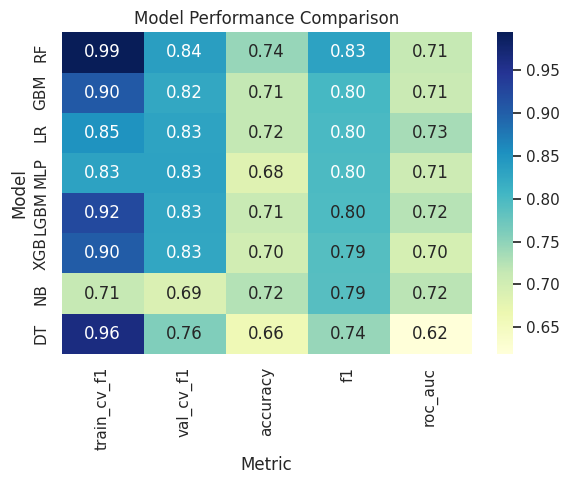

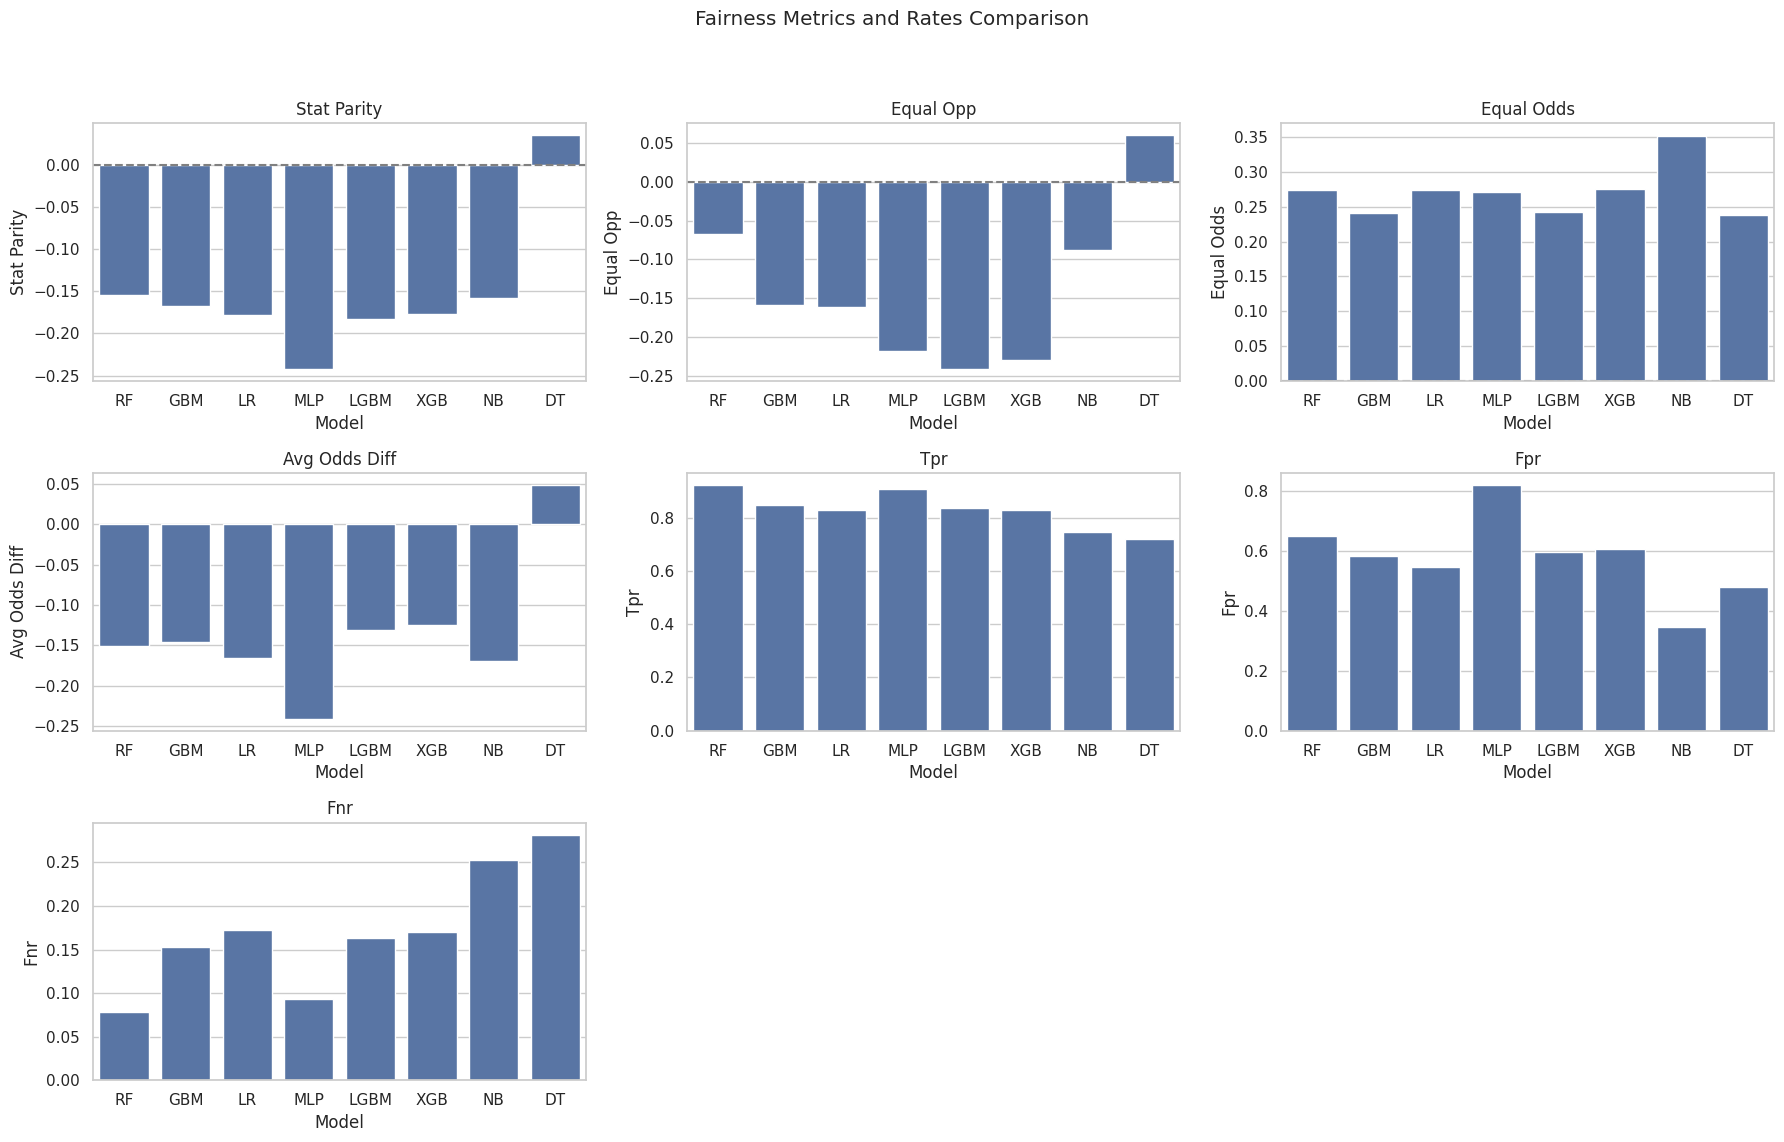

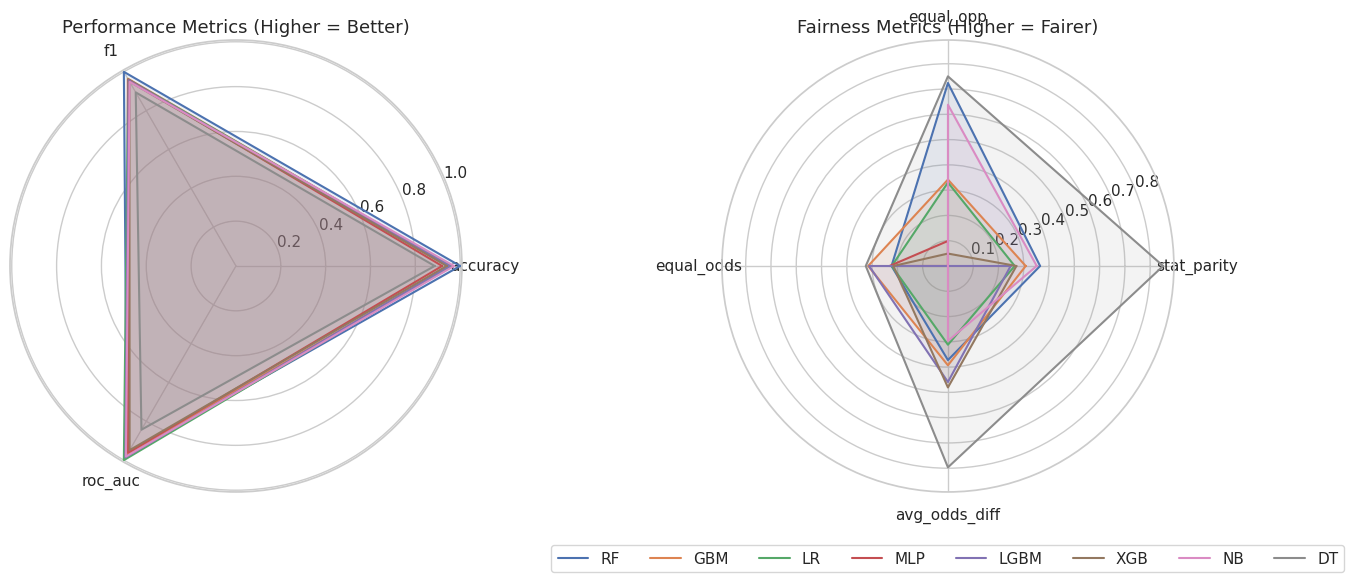

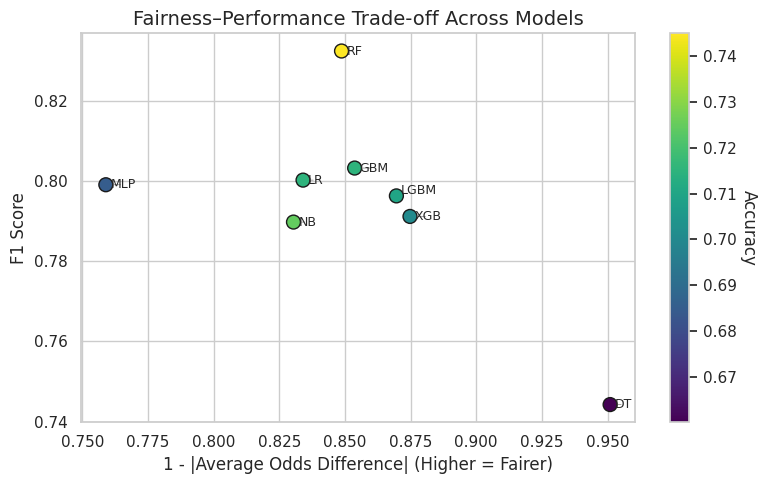

Balanced Best Model: RF
Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 57, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler 

epoch 0; iter: 0; batch classifier loss: 0.664274; batch adversarial loss: 0.726323
epoch 1; iter: 0; batch classifier loss: 0.564723; batch adversarial loss: 0.735704
epoch 2; iter: 0; batch classifier loss: 0.563239; batch adversarial loss: 0.746189
epoch 3; iter: 0; batch classifier loss: 0.409072; batch adversarial loss: 0.711732
epoch 4; iter: 0; batch classifier loss: 0.489908; batch adversarial loss: 0.717586
epoch 5; iter: 0; batch classifier loss: 0.460614; batch adversarial loss: 0.713127
epoch 6; iter: 0; batch classifier loss: 0.458930; batch adversarial loss: 0.705645
epoch 7; iter: 0; batch classifier loss: 0.431072; batch adversarial loss: 0.695169
epoch 8; iter: 0; batch classifier loss: 0.372511; batch adversarial loss: 0.693734
epoch 9; iter: 0; batch classifier loss: 0.454309; batch adversarial loss: 0.666402
epoch 0; iter: 0; batch classifier loss: 0.664274; batch adversarial loss: 0.726323
epoch 1; iter: 0; batch classifier loss: 0.564723; batch adversarial loss: 0

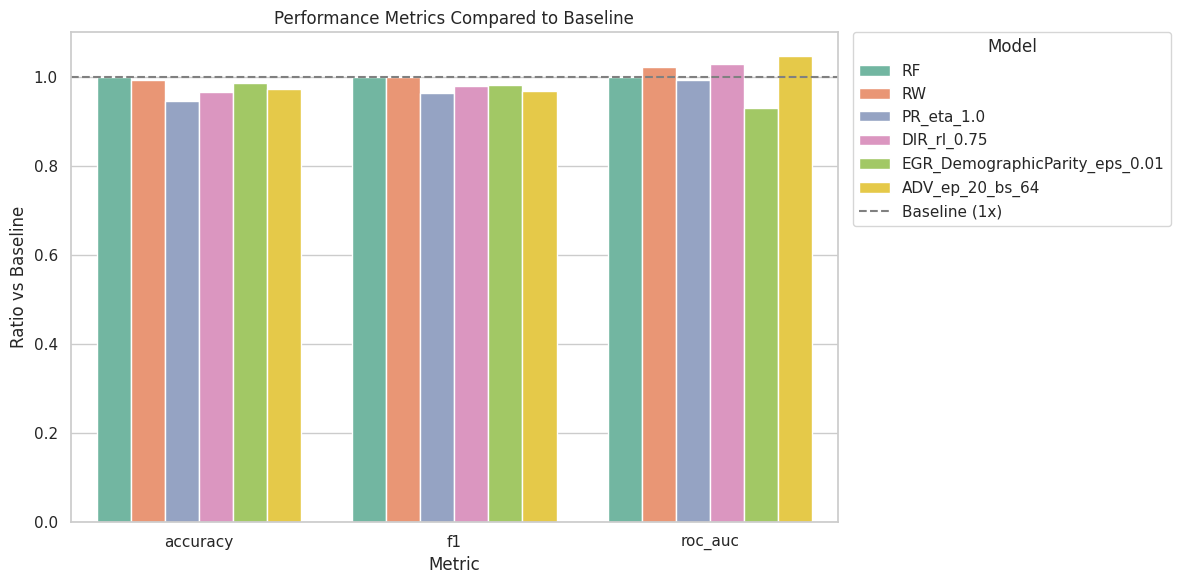

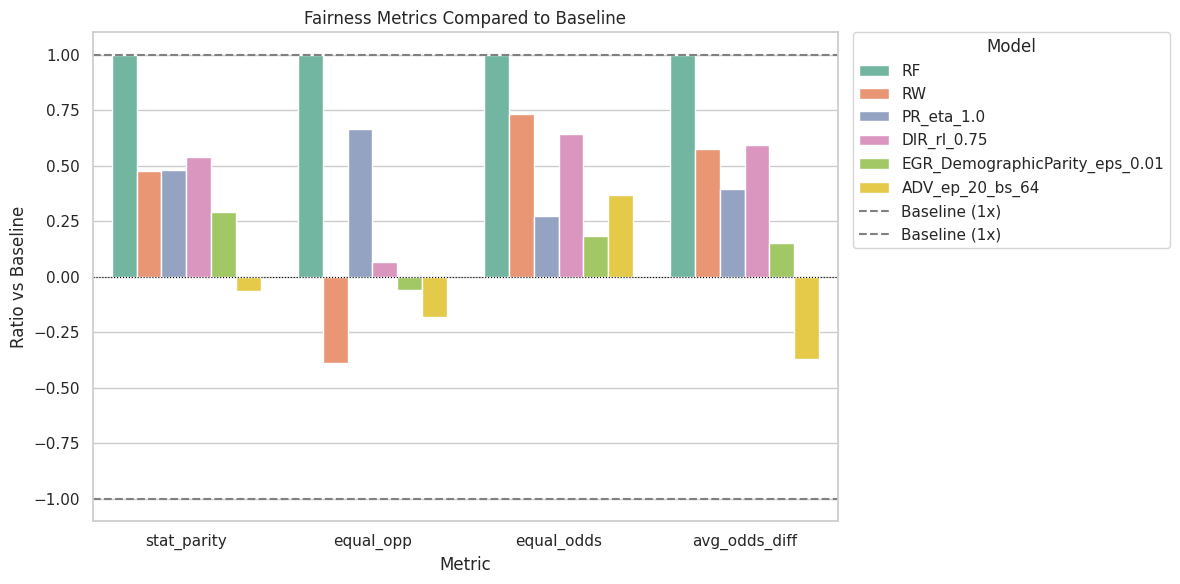

/tmp/ipython-input-2097818403.py:84: RuntimeWarning: invalid value encountered in scalar divide
  n_fav
/tmp/ipython-input-2097818403.py:89: RuntimeWarning: invalid value encountered in scalar divide
  n_unfav
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


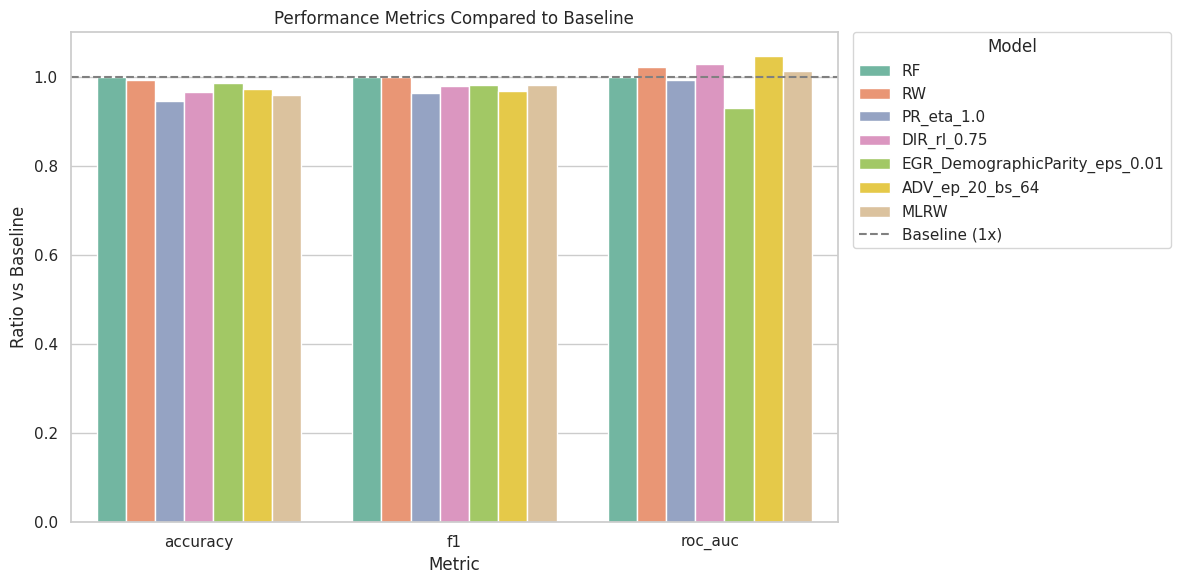

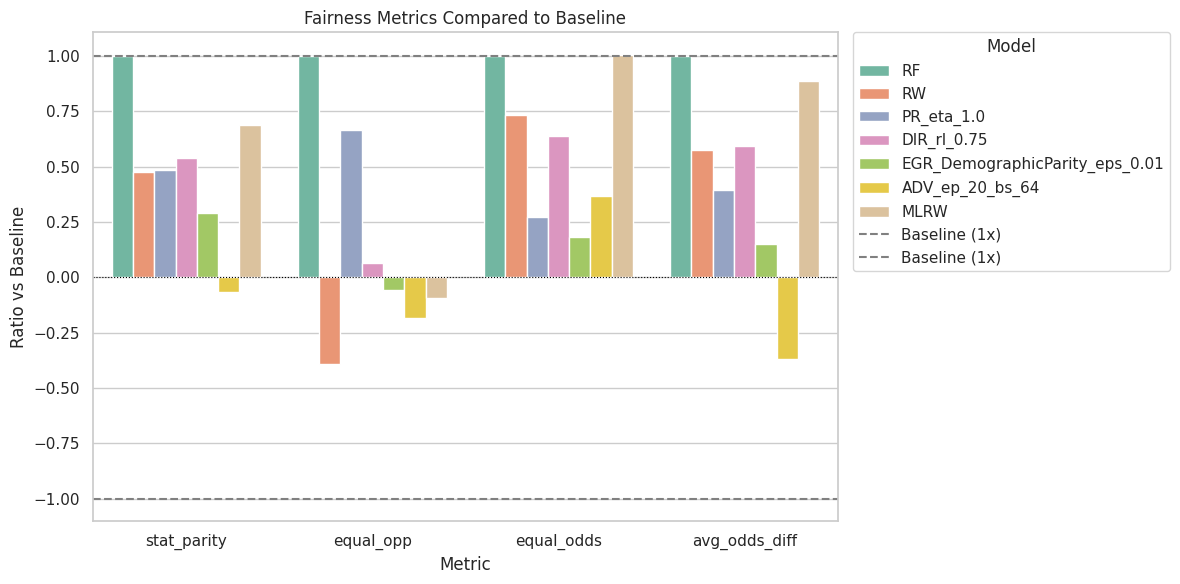

In [ ]:
combined_results, combined_final = run_fair_ml_pipeline(
    data= data,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_final.style.apply(
    highlight_max, subset=['accuracy', 'f1', 'roc_auc', 'tpr']).apply(
        highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff', 'fpr', 'fnr'])

In [ ]:
# Export the results DataFrame to a CSV file
combined_final.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/Results/German/German_Sex_original.csv')

In [ ]:
tf.compat.v1.reset_default_graph()
sess = tf.compat.v1.Session()

combined_results = run_all_fairness_methods(best_name, X_train, y_train, X_test, y_test, target, sensitive_feature, results_df, results_dict)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


epoch 0; iter: 0; batch classifier loss: 0.680588; batch adversarial loss: 0.720525
epoch 1; iter: 0; batch classifier loss: 0.637273; batch adversarial loss: 0.726106
epoch 2; iter: 0; batch classifier loss: 0.613892; batch adversarial loss: 0.724152
epoch 3; iter: 0; batch classifier loss: 0.548199; batch adversarial loss: 0.720079
epoch 4; iter: 0; batch classifier loss: 0.554646; batch adversarial loss: 0.706946
epoch 5; iter: 0; batch classifier loss: 0.513347; batch adversarial loss: 0.729775
epoch 6; iter: 0; batch classifier loss: 0.587689; batch adversarial loss: 0.708571
epoch 7; iter: 0; batch classifier loss: 0.490327; batch adversarial loss: 0.708674
epoch 8; iter: 0; batch classifier loss: 0.489244; batch adversarial loss: 0.709994
epoch 9; iter: 0; batch classifier loss: 0.547640; batch adversarial loss: 0.709781


In [ ]:
combined_results

train_cv_f1 val_cv_f1 accuracy        f1   roc_auc stat_parity equal_opp  \
DT     0.961587   0.75766  0.69501   0.77049  0.674513    0.052388  0.087049   
RW          NaN       NaN     0.71  0.794326  0.695655    0.067478  0.108768   
PR          NaN       NaN    0.695  0.794613  0.711548   -0.085997 -0.064373   
DIR         NaN       NaN     0.69  0.772059  0.675595    0.009132  0.019423   
EGR         NaN       NaN    0.745  0.827119  0.662738    -0.04693 -0.024417   
ADV         NaN       NaN      0.7  0.797297  0.719643   -0.003044  0.052164   

    equal_odds avg_odds_diff       tpr       fpr       fnr  \
DT    0.118806      0.092698  0.745782  0.441655  0.254218   
RW    0.108768      0.091884       0.8       0.5       0.2   
PR       0.075     -0.069686  0.842857      0.65  0.157143   
DIR      0.075      0.047211      0.75      0.45      0.25   
EGR   0.024417     -0.012209  0.871429      0.55  0.128571   
ADV   0.052164      0.001082  0.842857  0.633333  0.157143   

                                            best_model  
DT   (MinMaxScaler(), DecisionTreeClassifier(max_de...  
RW   (MinMaxScaler(), DecisionTreeClassifier(max_de...  
PR   <aif360.algorithms.inprocessing.prejudice_remo...  
DIR  (MinMaxScaler(), DecisionTreeClassifier(max_de...  
EGR  ExponentiatedGradient(constraints=<fairlearn.r...  
ADV  <aif360.algorithms.inprocessing.adversarial_de...

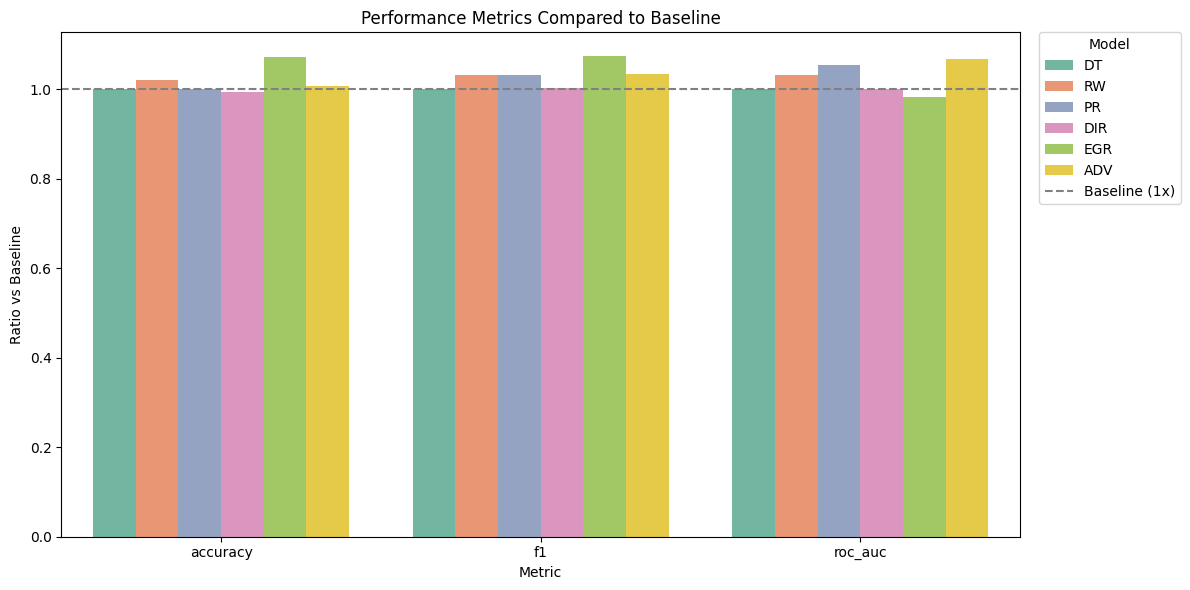

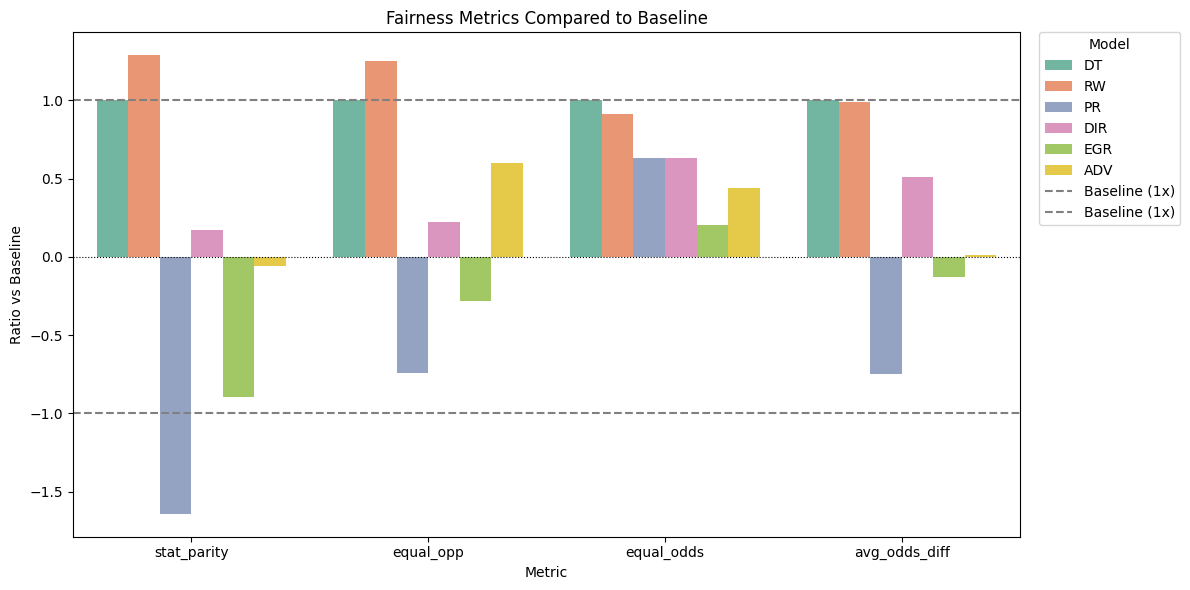

In [ ]:
plot_comparison(combined_results)

In [ ]:
mlrw_results = mlrw(best_name, X_train, y_train, X_test, y_test, results_dict)

/tmp/ipython-input-21-2097818403.py:84: RuntimeWarning: invalid value encountered in scalar divide
  n_fav
/tmp/ipython-input-21-2097818403.py:89: RuntimeWarning: invalid value encountered in scalar divide
  n_unfav
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
mlrw_results

accuracy        f1   roc_auc stat_parity equal_opp equal_odds  \
MLRW      0.7  0.791667  0.697738    0.001015  0.012209       0.05   

     avg_odds_diff       tpr       fpr       fnr  \
MLRW      0.031104  0.814286  0.566667  0.185714   

                                             best_model  
MLRW  (MinMaxScaler(), DecisionTreeClassifier(max_de...

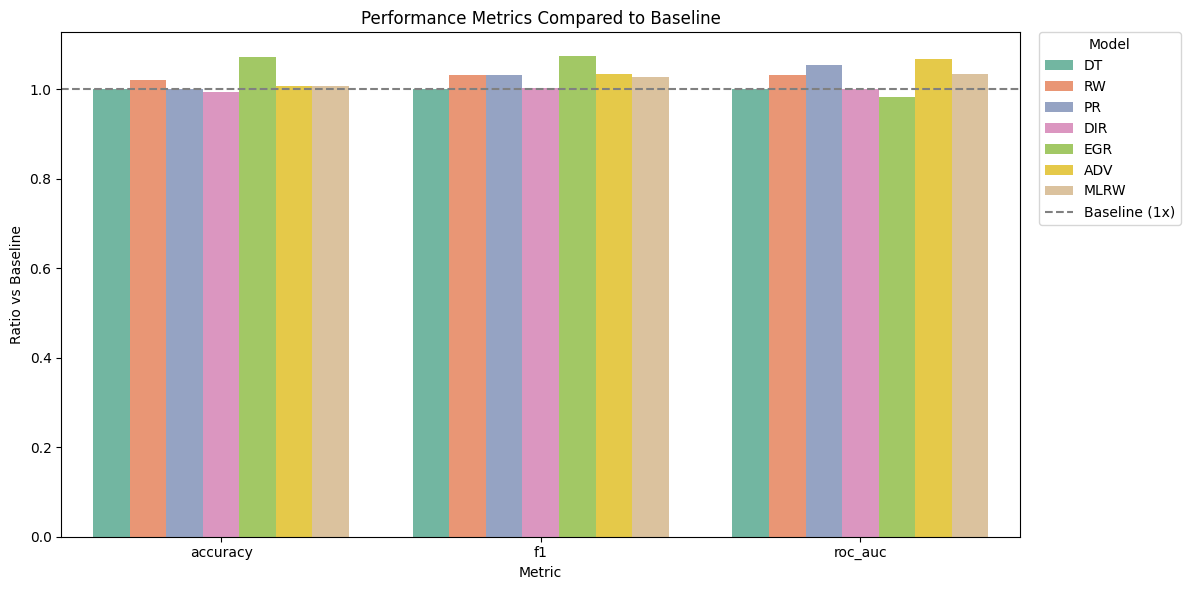

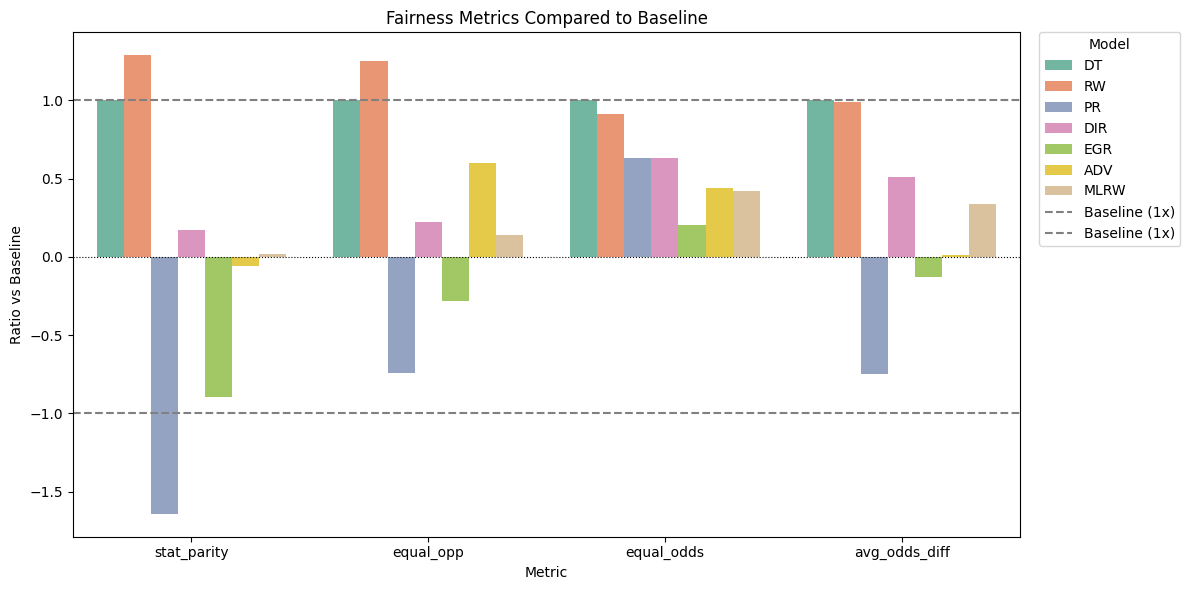

In [ ]:
combined_final = pd.concat([combined_results, mlrw_results], axis=0)
plot_comparison(combined_final)

In [ ]:
combined_final.style.apply(
    highlight_max, subset=['accuracy', 'f1', 'roc_auc', 'tpr']).apply(
        highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff', 'fpr', 'fnr'])

##Modifications to Datasets

In [ ]:
def flip_and_adjust_features(df, label_col, sensitive_col, flip_fraction):
    """
    Flip a fraction of privileged group labels and adjust selected features
    to better resemble those from the unprivileged label=0 group.
    """
    # Identify privileged group with label=1
    privileged = (df[sensitive_col] == 1) & (df[label_col] == 1)
    candidates = df[privileged].copy()

    # Randomly select subset to flip
    flip_count = int(flip_fraction * len(candidates))
    to_flip = candidates.sample(flip_count, random_state=random_seed)
    flip_indices = to_flip.index

    # Flip labels
    df.loc[flip_indices, label_col] = 0

    # Reference group for feature adjustment (same sensitive group, opposite label)
    reference_group = df[(df[sensitive_col] == 1) & (df[label_col] == 0)]

    # Define features to adjust
    features_to_adjust = ['status','savings', 'installment_rate', 'age', 'duration', 'job', 'credit_history', 'property', 'other_installment_plans']

    for feature in features_to_adjust:
        valid_values = reference_group[feature].dropna().values
        if len(valid_values) == 0:
            continue  # skip if reference has no valid data

        # Sample same number of values as number of flipped records
        sampled_values = np.random.choice(valid_values, size=flip_count, replace=True)

        # Assign values row by row to avoid shape mismatches
        for idx, val in zip(flip_indices, sampled_values):
            df.at[idx, feature] = val

    return df

In [ ]:
def flip_and_adjust_unprivileged(df, label_col, sensitive_col, flip_fraction):
    """
    Promote a fraction of underprivileged group with label=0 to label=1,
    and adjust their features to resemble label=1 examples.
    """
    # Identify underprivileged group with label=0 (e.g., Female earning <=50k)
    underprivileged = (df[sensitive_col] == 0) & (df[label_col] == 0)
    candidates = df[underprivileged].copy()

    # Determine number to flip
    flip_count = int(flip_fraction * len(candidates))
    to_flip = candidates.sample(flip_count, random_state=random_seed)
    flip_indices = to_flip.index

    # Flip labels to 1
    df.loc[flip_indices, label_col] = 1

    # Reference group for adjustment (underprivileged label=1 or privileged label=1)
    reference_group = df[((df[sensitive_col] == 0) & (df[label_col] == 1)) |
                         ((df[sensitive_col] == 1) & (df[label_col] == 1))]
    # Define features to adjust (columns present in German Credit dataset)
    features_to_adjust = ['status','savings', 'installment_rate', 'age', 'duration', 'job', 'credit_history', 'property', 'other_installment_plans']

    for feature in features_to_adjust:
        valid_values = reference_group[feature].dropna().values
        if len(valid_values) == 0:
            continue  # no reference data

        sampled_values = np.random.choice(valid_values, size=flip_count, replace=True)
        for idx, val in zip(flip_indices, sampled_values):
            df.at[idx, feature] = val

    return df

In [ ]:
def flip_near_boundary(X, y, sensitive_col, label_col, flip_fraction, boundary_width=0.2):
    """
    Flip labels for a fraction of privileged group samples near the decision boundary.

    Returns:
        X_encoded_modified: DataFrame (encoded features with flipped labels)
        y_modified: Series (flipped labels)
        flipped_indices: list (indices of flipped samples)
    """
    # --- Combine X and y ---
    data = X.copy()
    data[label_col] = y.values

    # --- One-hot encode categorical features ---
    X_encoded = pd.get_dummies(data.drop(columns=[label_col]), drop_first=True)
    y_array = data[label_col].values

    # --- Fit logistic regression model ---
    model = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
    model.fit(X_encoded, y_array)

    # --- Predict probabilities ---
    probs = model.predict_proba(X_encoded)[:, 1]

    # --- Identify privileged group with positive labels ---
    # Assuming sensitive_col is binary: 1 = privileged, 0 = unprivileged
    # --- Determine privileged group after encoding ---
    if sensitive_col in X.columns and X[sensitive_col].nunique() == 2:
        # Use raw sensitive column (not yet one-hot encoded)
        is_privileged = (X[sensitive_col] == 1)
    else:
        # Look for encoded version of sensitive column
        sensitive_encoded_cols = [col for col in X_encoded.columns if sensitive_col in col]
        if len(sensitive_encoded_cols) == 1:
            priv_col = sensitive_encoded_cols[0]
            is_privileged = (X_encoded[priv_col] == 1)
        elif any(col.endswith('_1') for col in sensitive_encoded_cols):
            priv_col = [col for col in sensitive_encoded_cols if col.endswith('_1')][0]
            is_privileged = (X_encoded[priv_col] == 1)
        else:
            raise ValueError(f"Could not resolve the encoded privileged column for '{sensitive_col}'. Found: {sensitive_encoded_cols}")

    is_positive = (y_array == 1)

    # --- Identify near-boundary privileged-positive samples ---
    boundary_mask = is_privileged & is_positive & ((probs > 0.5 - boundary_width) & (probs < 0.5 + boundary_width))
    candidates = X_encoded[boundary_mask]

    # --- Randomly select a fraction to flip ---
    n_flip = int(flip_fraction * len(candidates))
    if n_flip == 0:
        print("No samples selected for flipping. Try increasing flip_fraction or boundary_width.")
        return X_encoded, pd.Series(y_array, index=X_encoded.index), []

    flipped_indices = candidates.sample(n=n_flip, random_state=random_seed).index

    # --- Flip labels ---
    y_modified = pd.Series(y_array, index=X_encoded.index)
    y_modified.loc[flipped_indices] = 0

    print(f"Flipped {len(flipped_indices)} privileged labels near boundary from 1 to 0.")

    return X_encoded, y_modified, flipped_indices

In [ ]:
def flip_near_boundary_underprivileged(X, y, sensitive_col, label_col, flip_fraction, boundary_width=0.2):
    """
    Flip labels for a fraction of underprivileged group samples near the decision boundary,
    promoting from 0 → 1 to simulate upward mobility.

    Returns:
        X_encoded_modified: DataFrame (encoded features with flipped labels)
        y_modified: Series (flipped labels)
        flipped_indices: list (indices of flipped samples)
    """
    data = X.copy()
    data[label_col] = y.values

    # Encode categorical features
    X_encoded = pd.get_dummies(data.drop(columns=[label_col]), drop_first=True)
    y_array = data[label_col].values

    # Train classifier
    model = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
    model.fit(X_encoded, y_array)

    probs = model.predict_proba(X_encoded)[:, 1]

    # Identify underprivileged group (assumes 0 = underprivileged)
    if sensitive_col in X.columns and X[sensitive_col].nunique() == 2:
        is_underprivileged = (X[sensitive_col] == 0)
    else:
        # Check encoded sensitive col
        sensitive_encoded_cols = [col for col in X_encoded.columns if sensitive_col in col]
        if len(sensitive_encoded_cols) == 1:
            under_col = sensitive_encoded_cols[0]
            is_underprivileged = (X_encoded[under_col] == 1)
        elif any(col.endswith('_0') for col in sensitive_encoded_cols):
            under_col = [col for col in sensitive_encoded_cols if col.endswith('_0')][0]
            is_underprivileged = (X_encoded[under_col] == 1)
        else:
            raise ValueError(f"Could not resolve encoded underprivileged group for '{sensitive_col}'. Found: {sensitive_encoded_cols}")

    is_negative = (y_array == 0)

    # Candidates: underprivileged group with label=0 near boundary
    boundary_mask = is_underprivileged & is_negative & ((probs > 0.5 - boundary_width) & (probs < 0.5 + boundary_width))
    candidates = X_encoded[boundary_mask]

    n_flip = int(flip_fraction * len(candidates))
    if n_flip == 0:
        print("No samples selected for flipping. Try increasing flip_fraction or boundary_width.")
        return X_encoded, pd.Series(y_array, index=X_encoded.index), []

    flipped_indices = candidates.sample(n=n_flip, random_state=random_seed).index

    y_modified = pd.Series(y_array, index=X_encoded.index)
    y_modified.loc[flipped_indices] = 1  # promote: 0 → 1

    print(f"Flipped {len(flipped_indices)} underprivileged labels near boundary from 0 to 1.")

    return X_encoded, y_modified, flipped_indices

In [ ]:
def compare_multiple_feature_distributions(original_df, flipped_df, features, figsize=(15, 10), ncols=3):
    """
    Compare KDE distributions of multiple features between original and flipped datasets in a grid of subplots,
    and annotate each plot with the KS-test p-value.

    Args:
        original_df (pd.DataFrame): Original dataset.
        flipped_df (pd.DataFrame): Flipped/modified dataset.
        features (list): List of features to compare.
        figsize (tuple): Size of the overall figure.
        ncols (int): Number of columns in the subplot grid.
    """
    n_features = len(features)
    nrows = (n_features + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        ax = axes[idx]

        # Plot KDE
        sns.kdeplot(original_df[feature], fill=True, label='Original', color='blue', ax=ax)
        sns.kdeplot(flipped_df[feature], fill=True, label='Flipped', color='orange', ax=ax)

        # Perform KS test
        ks_stat, p_value = ks_2samp(original_df[feature].dropna(), flipped_df[feature].dropna())

        # Annotate with p-value
        ax.set_title(f"{feature}\nKS D={ks_stat:.3f}, p={p_value:.4f}")
        ax.legend()

    # Remove empty subplots
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_biased_data_comparison(datasets, sensitive_feature, label_col):
    """
    Compare class distributions across multiple datasets grouped by a sensitive feature.

    Args:
        datasets (list of tuples): [(DataFrame, "Label"), ...]
        sensitive_feature (str): Column name of the sensitive feature (e.g., 'sex')
        label_col (str): Target label column name (e.g., 'income')
    """
    # Preserve the source order from the input
    source_order = [label for _, label in datasets]

    # Tag and combine
    combined_list = []
    for df, source_name in datasets:
        df_copy = df.copy()
        df_copy['Source'] = source_name
        combined_list.append(df_copy)

    combined_df = pd.concat(combined_list, axis=0)

    # Compute proportions
    grouped = (
        combined_df
        .groupby(['Source', sensitive_feature])[label_col]
        .value_counts(normalize=True)
        .rename("Proportion")
        .reset_index()
    )

    # Ensure Source has a defined order
    grouped['Source'] = pd.Categorical(grouped['Source'], categories=source_order, ordered=True)

    # Create a new x-label combining group and source in a consistent order
    grouped['Group'] = grouped[sensitive_feature].astype(str) + " (" + grouped['Source'].astype(str) + ")"

    # Sort by Source and then Group to ensure correct plotting order
    grouped = grouped.sort_values(by=['Source', 'Group'])

    # Plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=grouped, x='Group', y='Proportion', hue=label_col, palette='Set2')

    # Add percentage text on each bar
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{p.get_height()*100:.1f}%' for p in container],
                     label_type='edge', padding=3, fontsize=8)

    plt.title(f'Class Distribution by {sensitive_feature.title()} Across Datasets')
    plt.ylabel("Proportion")
    plt.xlabel(f"{sensitive_feature.title()} Group (by Dataset)")
    plt.xticks(rotation=90)
    plt.legend(
        title=label_col,
        bbox_to_anchor=(1.01, 1),
        loc='upper left',
        borderaxespad=0)
    plt.tight_layout()
    plt.show()

**Statistical Interpretaion:**

* KS Stat near 0: little or no shift.
* Higher KS Stat: stronger difference in distributions.
* Low p-values (< 0.05) suggest that the distributions are significantly different.

In [ ]:
from scipy.stats import ks_2samp

def ks_feature_shift(original_df, flipped_df, features):
    for f in features:
        stat, p = ks_2samp(original_df[f], flipped_df[f])
        print(f"Feature: {f} | KS Stat: {stat:.4f} | p-value: {p:.4f}")

In [ ]:
def ks_feature_shift_table(original_df, modified_datasets, features, alpha=0.05):
    rows = []
    for modified_df, label in modified_datasets:
        for f in features:
            try:
                stat, p = ks_2samp(original_df[f].dropna(), modified_df[f].dropna())
                rows.append({
                    'Dataset': label,
                    'Feature': f,
                    'KS Stat': stat,
                    'p-value': p,
                    f'Significant (p < {alpha:.2g})': p < alpha
                })
            except Exception as e:
                rows.append({
                    'Dataset': label,
                    'Feature': f,
                    'KS Stat': None,
                    'p-value': None,
                    f'Significant (p < {alpha:.2g})': False
                })

    return pd.DataFrame(rows)

### Dataset Modification - Increase Bias on underprivileged group

Flip Labels - Ratio: 0.3 reduce Priv (biased_df_flip)

In [ ]:
# Flipping the income labels for a fraction of the Privileged group with feature adjustment
# Frac = 0.3
bias_adjust_flip_1 = flip_and_adjust_features(data.copy(), label_col=target, sensitive_col=sensitive_feature, flip_fraction=0.3)

In [ ]:
# save bias_adust_flip_1 to drive
bias_adjust_flip_1.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/datasets/German/Raw/German_bias1.csv')

In [ ]:
# Flipping the income labels for a fraction of the Privileged group with feature adjustment
# Frac = 0.3
bias_adjust_flip_2 = flip_and_adjust_features(data.copy(), label_col=target, sensitive_col=sensitive_feature, flip_fraction=0.5)

In [ ]:
# save bias_adust_flip_1 to drive
bias_adjust_flip_2.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/datasets/German/Raw/German_bias2.csv')

In [ ]:
# Flipping the income labels for a fraction of the Privileged Group at boundary cases
# Frac = 0.5, boundary_width=0.2 (fixed in flip_near_boundary function)
X_flipped, y_flipped, flipped_idx = flip_near_boundary(
    X=data.drop(columns=target),
    y=data[target],
    sensitive_col=sensitive_feature,
    label_col=target,
    flip_fraction=0.5
)

Flipped 56 privileged labels near boundary from 1 to 0.


In [ ]:
# Ratio of flipped_indices (boundary cases) against the privileged, high income population
print("Percentage of boundary cases flipped upon Privileged group population:")
print(f"{len(flipped_idx) / len(X_flipped[X_flipped[sensitive_feature] == 1])*100:.2f}%")

Percentage of boundary cases flipped upon Privileged group population:
8.12%


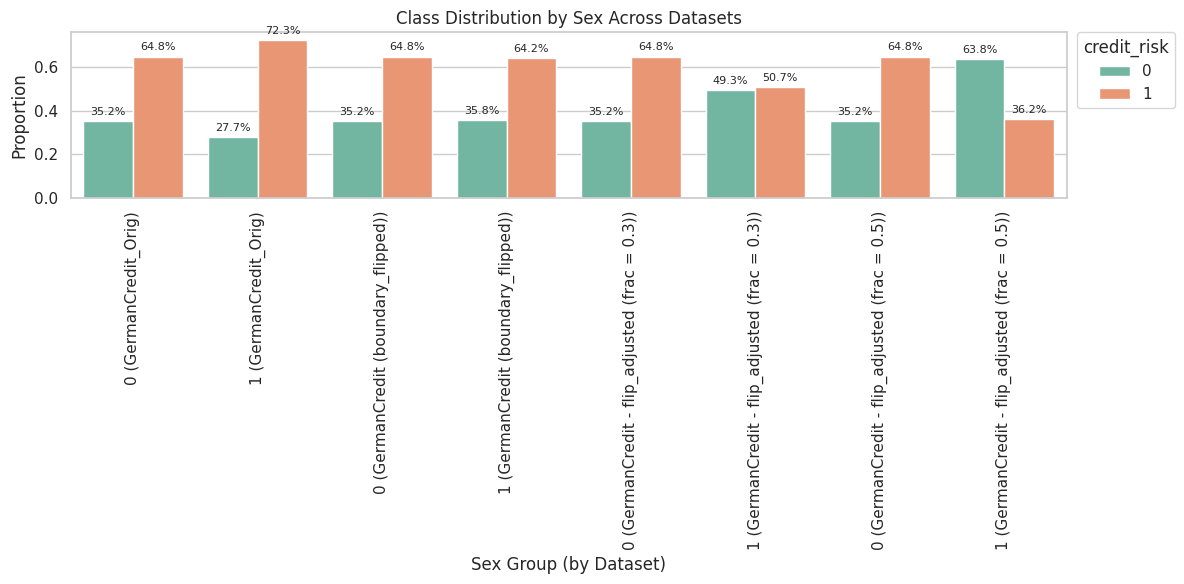

In [ ]:
# Transform X_flipped to be used in plot_biased_data_comparison, including y_flipped
X_flipped.insert(0, target, y_flipped)

# Show comparison of datasets (income labels for privileged and underprivileged groups)
plot_biased_data_comparison(
    datasets=[
        (data, "GermanCredit_Orig"),
        (X_flipped, "GermanCredit (boundary_flipped)"),
        (bias_adjust_flip_1, "GermanCredit - flip_adjusted (frac = 0.3)"),
        (bias_adjust_flip_2, "GermanCredit - flip_adjusted (frac = 0.5)"),
    ],
    sensitive_feature=sensitive_feature,
    label_col=target
)

In [ ]:
datasets = [
    (X_flipped, "GermanCredit (boundary_flipped)"),
    (bias_adjust_flip_1, "GermanCredit - flip_adjusted (frac = 0.3)"),
    (bias_adjust_flip_2, "GermanCredit - flip_adjusted (frac = 0.5)"),
]

features_to_compare = ['status','savings', 'installment_rate',
                       'age', 'duration', 'job', 'credit_history',
                       'property', 'other_installment_plans']


# Generate table
ks_table = ks_feature_shift_table(data, datasets, features_to_compare)

# Define column name for significance
signif_col = [col for col in ks_table.columns if col.startswith("Significant")][0]

# Define highlighter
def highlight_significant(row):
    if pd.isnull(row['KS Stat']) or pd.isnull(row['p-value']):
        return [''] * len(row)
    color = 'background-color: lightgreen' if row[signif_col] and row['KS Stat'] > 0.01 else ''
    return [color if col in ['KS Stat', 'p-value'] else '' for col in ks_table.columns]

# Apply styling
ks_table_sorted = ks_table.sort_values(by=['Feature', 'Dataset'])
ks_table_sorted.style \
    .apply(highlight_significant, axis=1) \
    .format({
        "KS Stat": "{:.3f}",
        "p-value": "{:.4f}"
    })

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
features_to_compare = ['status','savings', 'installment_rate', 'age', 'duration', 'job', 'credit_history', 'property', 'other_installment_plans']
compare_multiple_feature_distributions(data, bias_adjust_flip_2, features_to_compare)

### Flip Label frac=0.3/0.5 improve UnderPriv (bias_adjust_flip_3, bias_adjust_flip_4)

**Flip labels**

Increasing favourable outcomes for UnderPrivileged Group
Randomly flip income <=50K labels to >50K in the underprivileged group (e.g. sex = Female or race = non-white).

In [ ]:
# Flipping the income labels for a fraction of the Under-Privileged group with feature adjustment
# Frac = 0.3
bias_adjust_flip_3 = flip_and_adjust_unprivileged(data.copy(), label_col=target, sensitive_col=sensitive_feature, flip_fraction=0.3)

In [ ]:
# save bias_adust_flip_3 to drive
bias_adjust_flip_3.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/datasets/German/Raw/German_bias3.csv')

In [ ]:
# Flipping the income labels for a fraction of the Under-Privileged group with feature adjustment
# Frac = 0.5
bias_adjust_flip_4 = flip_and_adjust_unprivileged(data.copy(), label_col=target, sensitive_col=sensitive_feature, flip_fraction=0.5)

In [ ]:
# save bias_adust_flip_4 to drive
bias_adjust_flip_4.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/datasets/German/Raw/German_bias4.csv')

In [ ]:
# Flipping the income labels for a fraction of the Under-Privileged Group at boundary cases
# Frac = 0.5, boundary_width=0.2 (fixed in flip_near_boundary function)
X_flipped_UP, y_flipped_UP, flipped_idx_UP = flip_near_boundary_underprivileged(
    X=data.drop(columns=target),
    y=data[target],
    sensitive_col=sensitive_feature,
    label_col=target,
    flip_fraction=0.5
)

Flipped 30 underprivileged labels near boundary from 0 to 1.


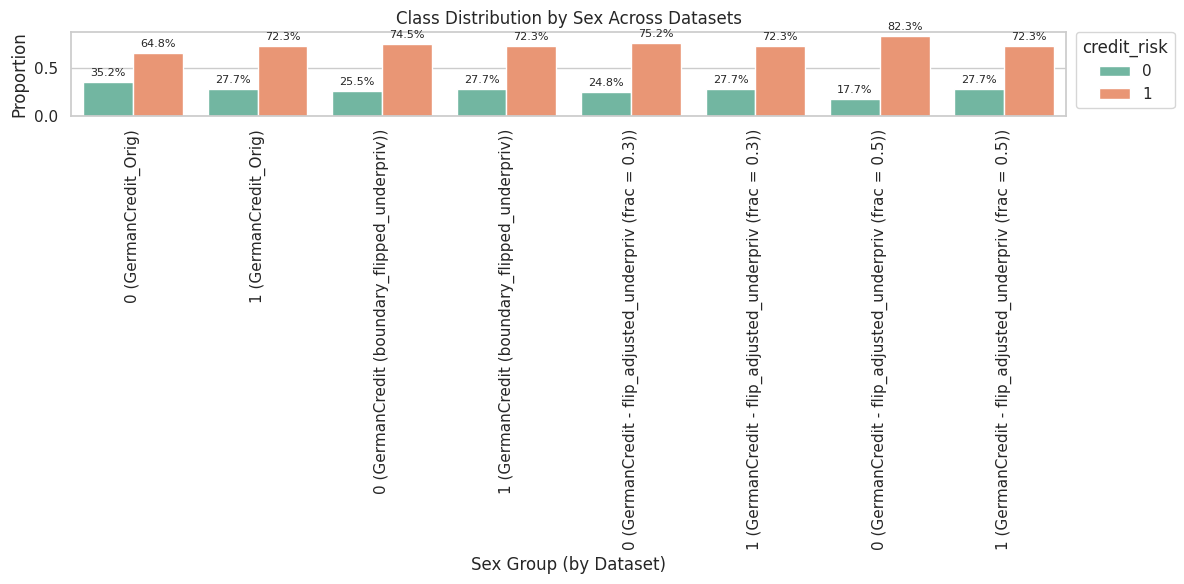

In [ ]:
# Transform X_flipped to be used in plot_biased_data_comparison, including y_flipped
X_flipped_UP.insert(0, target, y_flipped_UP)

# Show comparison of datasets (income labels for privileged and underprivileged groups)
plot_biased_data_comparison(
    datasets=[
        (data, "GermanCredit_Orig"),
        (X_flipped_UP, "GermanCredit (boundary_flipped_underpriv)"),
        (bias_adjust_flip_3, "GermanCredit - flip_adjusted_underpriv (frac = 0.3)"),
        (bias_adjust_flip_4, "GermanCredit - flip_adjusted_underpriv (frac = 0.5)")
    ],
    sensitive_feature=sensitive_feature,
    label_col=target
)

In [ ]:
datasets=[
        (data, "GermanCredit_Orig"),
        (X_flipped_UP, "GermanCredit (boundary_flipped_underpriv)"),
        (bias_adjust_flip_3, "GermanCredit - flip_adjusted_underpriv (frac = 0.3)"),
        (bias_adjust_flip_4, "GermanCredit - flip_adjusted_underpriv (frac = 0.5)")
    ]

features_to_compare = ['status','savings', 'installment_rate', 'age', 'duration', 'job', 'credit_history', 'property', 'other_installment_plans']

# Generate table
ks_table = ks_feature_shift_table(data, datasets, features_to_compare)

# Define column name for significance
signif_col = [col for col in ks_table.columns if col.startswith("Significant")][0]

# Define highlighter
def highlight_significant(row):
    if pd.isnull(row['KS Stat']) or pd.isnull(row['p-value']):
        return [''] * len(row)
    color = 'background-color: lightgreen' if row[signif_col] and row['KS Stat'] > 0.01 else ''
    return [color if col in ['KS Stat', 'p-value'] else '' for col in ks_table.columns]

# Apply styling
ks_table_sorted = ks_table.sort_values(by=['Feature', 'Dataset'])
ks_table_sorted.style \
    .apply(highlight_significant, axis=1) \
    .format({
        "KS Stat": "{:.3f}",
        "p-value": "{:.4f}"
    })

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


### Genetic Algorithm Modification

In [ ]:
df_unfair = pd.read_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/datasets/German/Raw/German_GenAlgo_sex.csv')

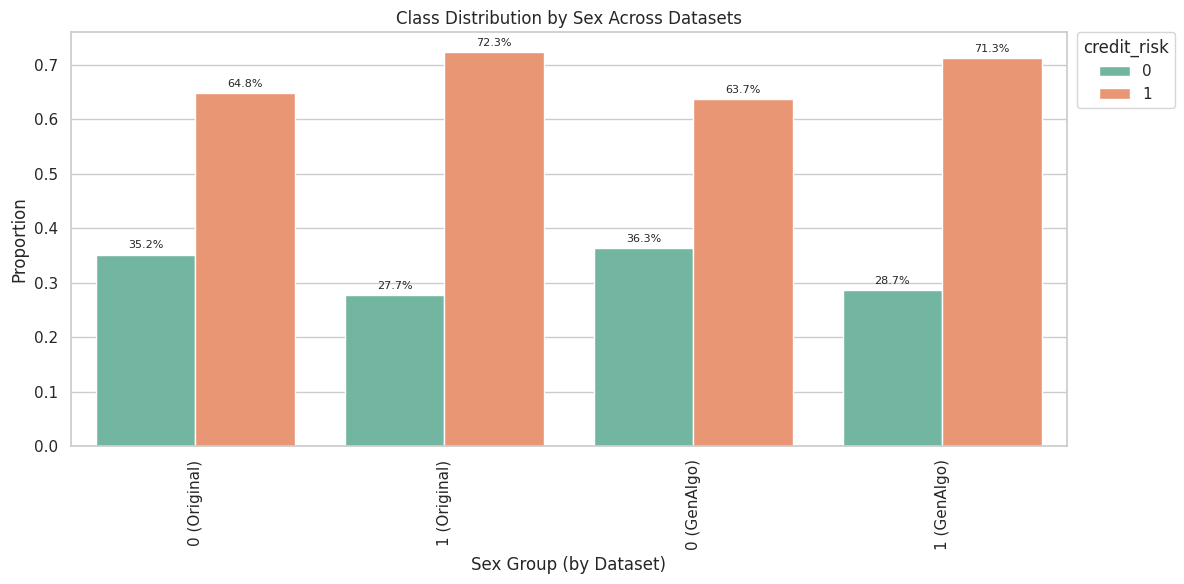

In [ ]:
plot_biased_data_comparison(
    datasets=[
        (data, "Original"),
        (df_unfair, "GenAlgo")
    ],
    sensitive_feature=sensitive_feature,
    label_col=target
)

### Compare all modifications for Adult

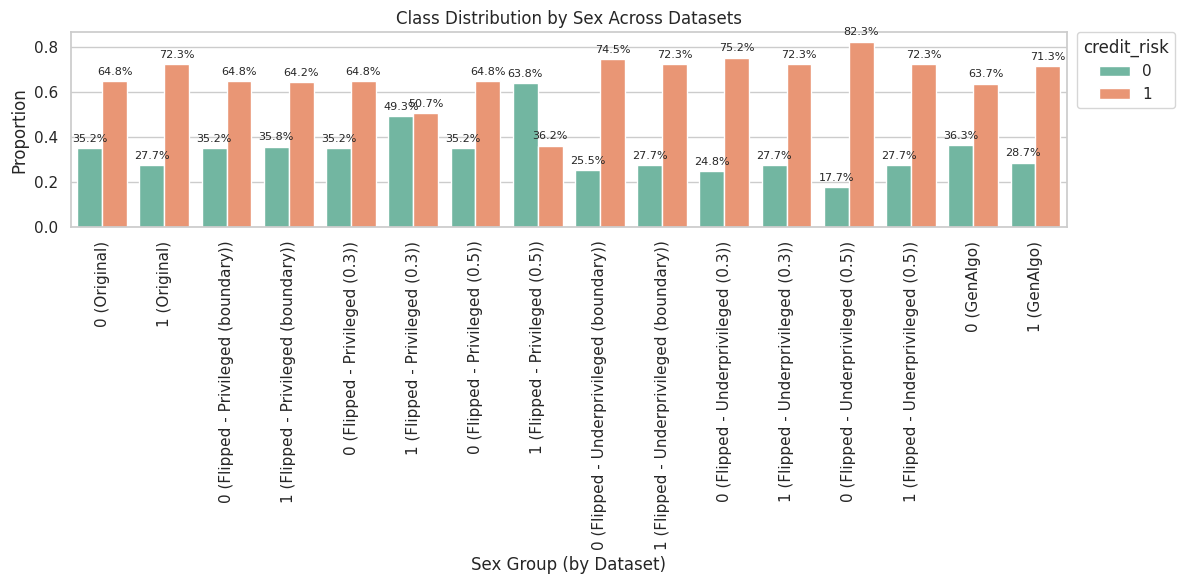

In [ ]:
plot_biased_data_comparison(
    datasets=[
        (data, "Original"),
        (X_flipped, "Flipped - Privileged (boundary)"),
        (bias_adjust_flip_1, "Flipped - Privileged (0.3)"),
        (bias_adjust_flip_2, "Flipped - Privileged (0.5)"),
        (X_flipped_UP, "Flipped - Underprivileged (boundary)"),
        (bias_adjust_flip_3, "Flipped - Underprivileged (0.3)"),
        (bias_adjust_flip_4, "Flipped - Underprivileged (0.5)"),
        (df_unfair, "GenAlgo")
    ],
    sensitive_feature=sensitive_feature,
    label_col=target
)

## Final Runs for all biased_df (individual model selection)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:17:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 441, number of negative: 359
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.551250 -> initscore=0.205722
[LightGBM] [Info] Start training from score 0.205722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

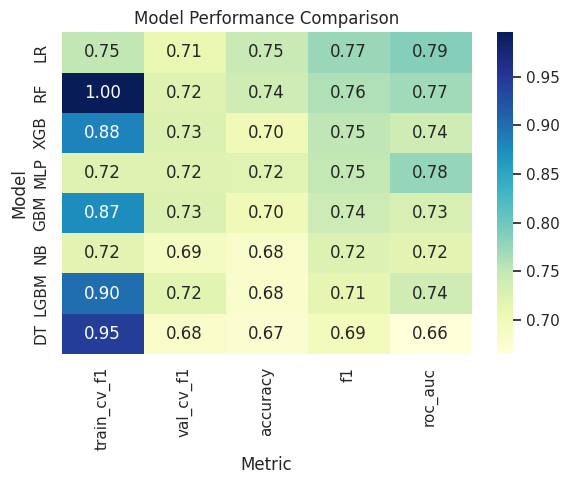

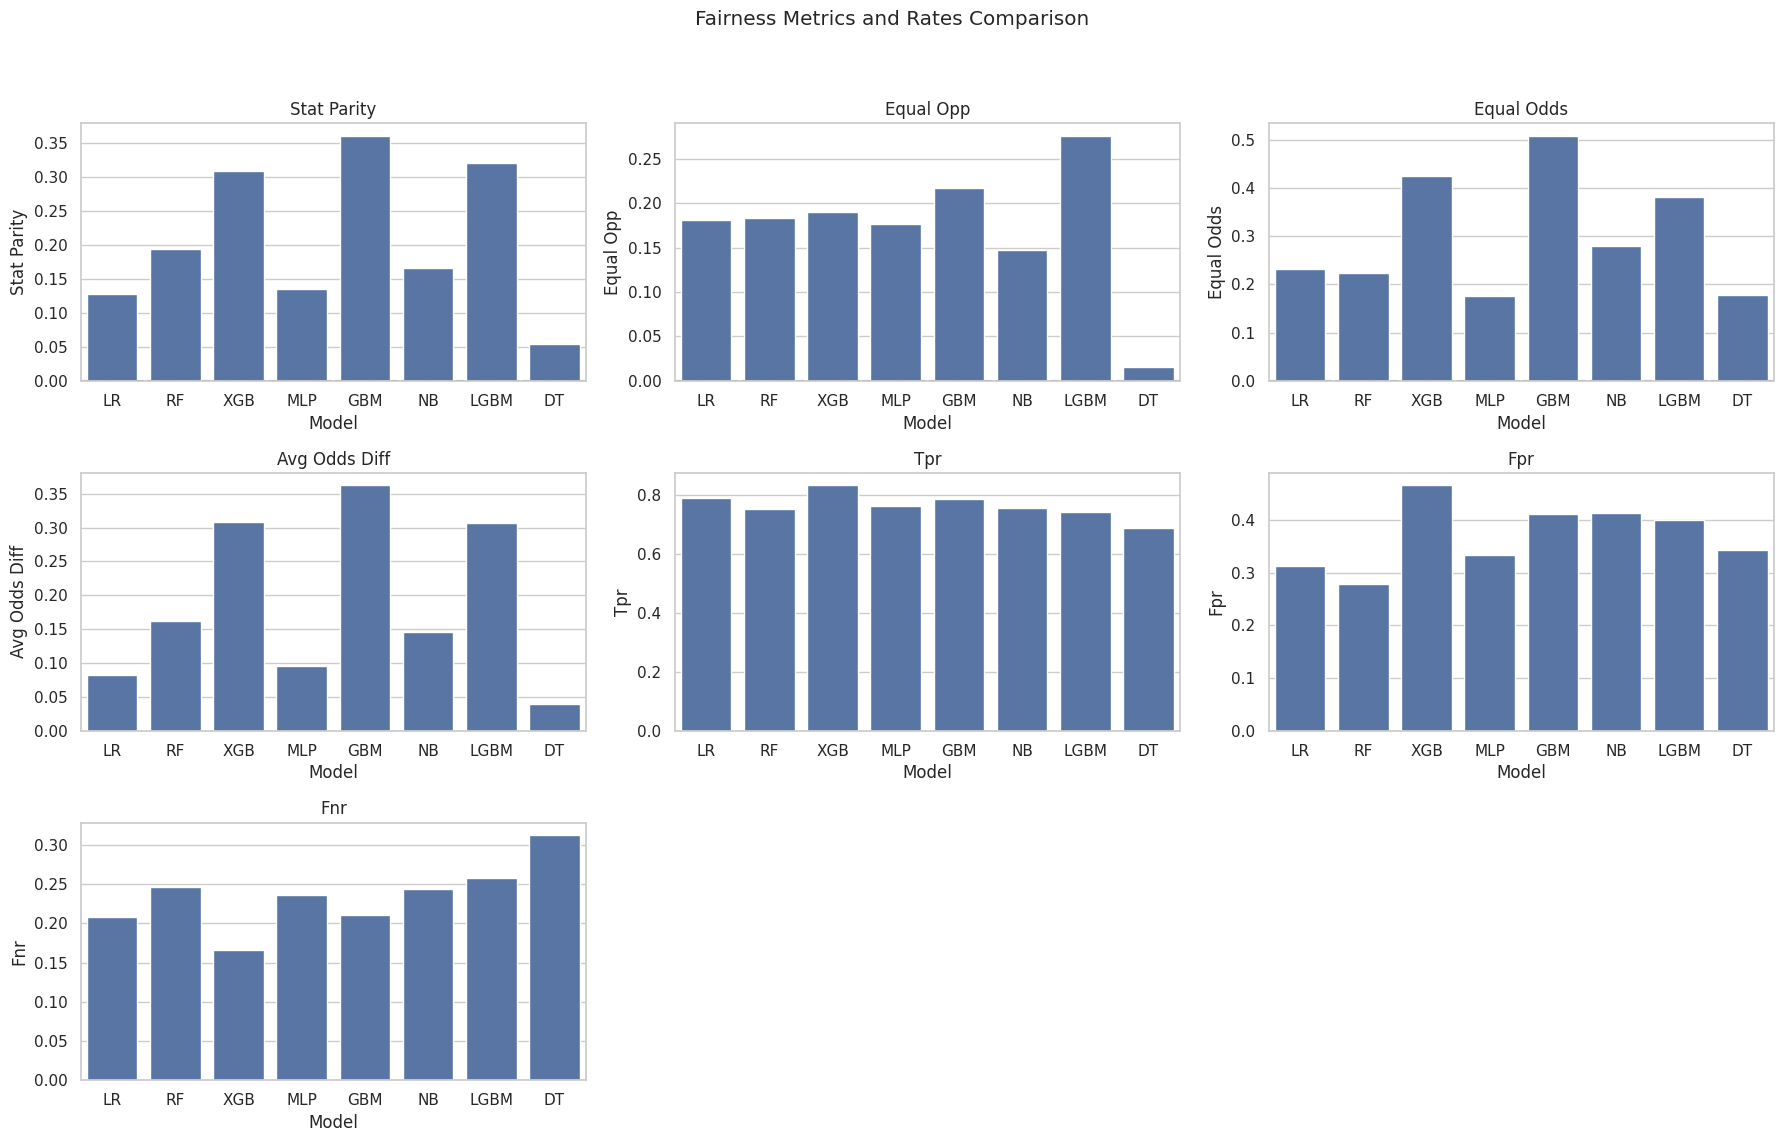

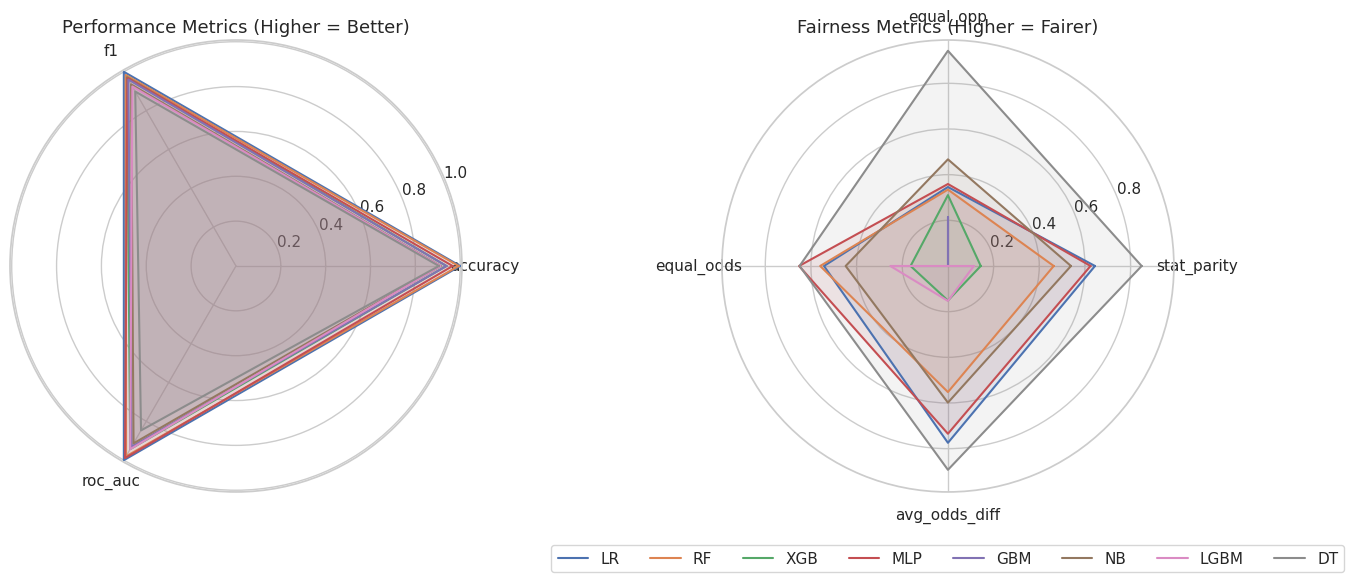

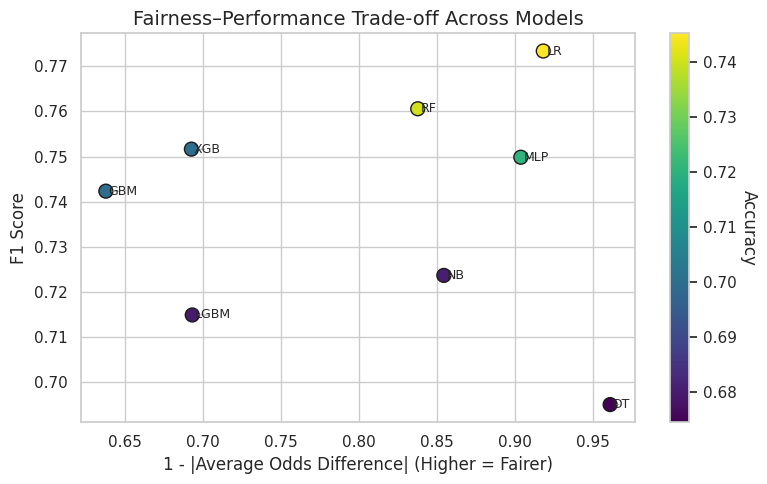

Balanced Best Model: DT
Model parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 57, 'splitter': 'best'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler 

epoch 0; iter: 0; batch classifier loss: 0.695661; batch adversarial loss: 0.741002
epoch 1; iter: 0; batch classifier loss: 0.633496; batch adversarial loss: 0.748972
epoch 2; iter: 0; batch classifier loss: 0.573606; batch adversarial loss: 0.710577
epoch 3; iter: 0; batch classifier loss: 0.563969; batch adversarial loss: 0.711393
epoch 4; iter: 0; batch classifier loss: 0.490512; batch adversarial loss: 0.661411
epoch 5; iter: 0; batch classifier loss: 0.663784; batch adversarial loss: 0.680332
epoch 6; iter: 0; batch classifier loss: 0.533492; batch adversarial loss: 0.690782
epoch 7; iter: 0; batch classifier loss: 0.610015; batch adversarial loss: 0.672726
epoch 8; iter: 0; batch classifier loss: 0.436051; batch adversarial loss: 0.656085
epoch 9; iter: 0; batch classifier loss: 0.636785; batch adversarial loss: 0.682195
epoch 0; iter: 0; batch classifier loss: 0.695661; batch adversarial loss: 0.741002
epoch 1; iter: 0; batch classifier loss: 0.633496; batch adversarial loss: 0

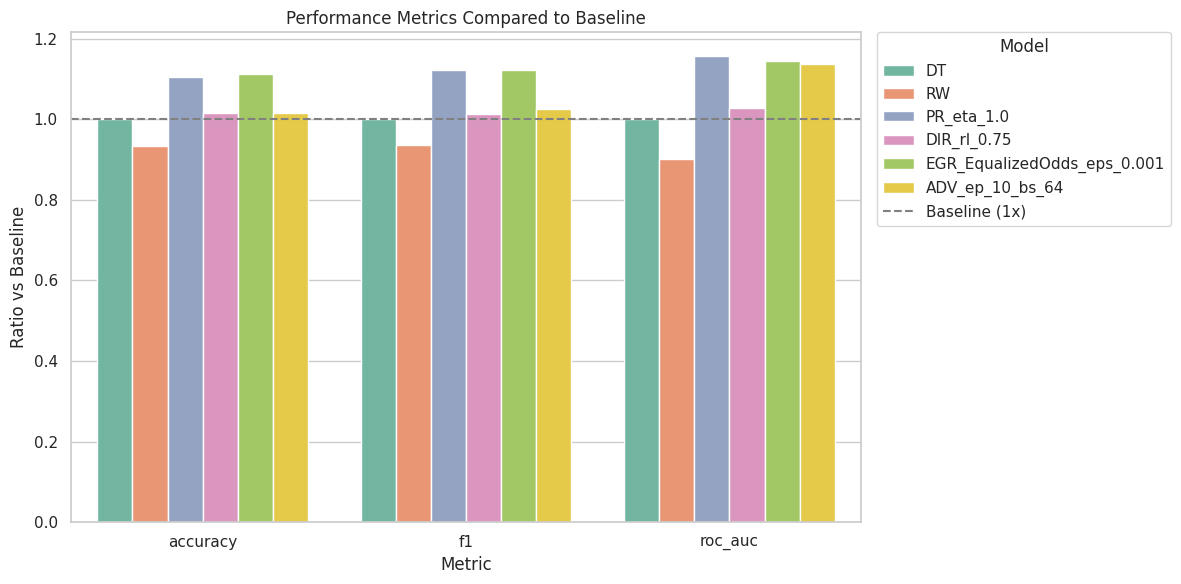

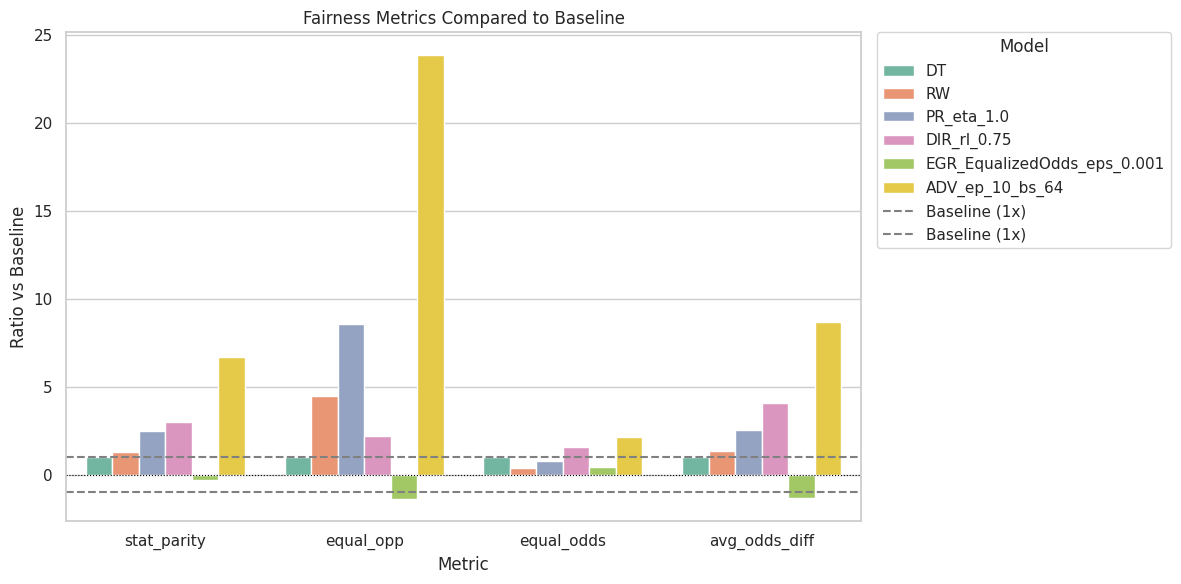

/tmp/ipython-input-2097818403.py:84: RuntimeWarning: invalid value encountered in scalar divide
  n_fav
/tmp/ipython-input-2097818403.py:89: RuntimeWarning: invalid value encountered in scalar divide
  n_unfav
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


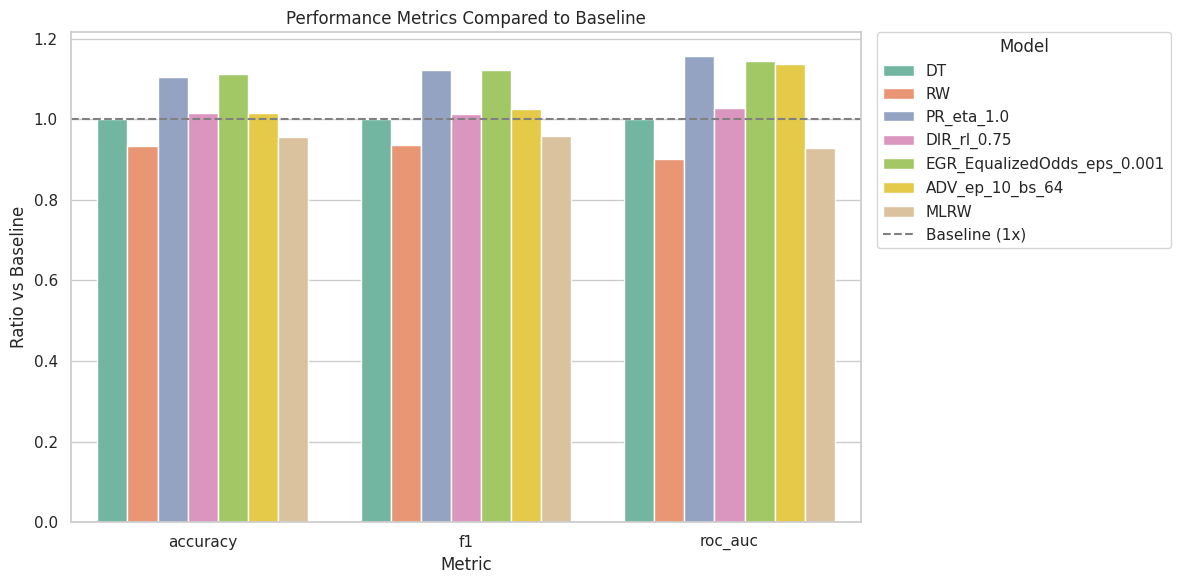

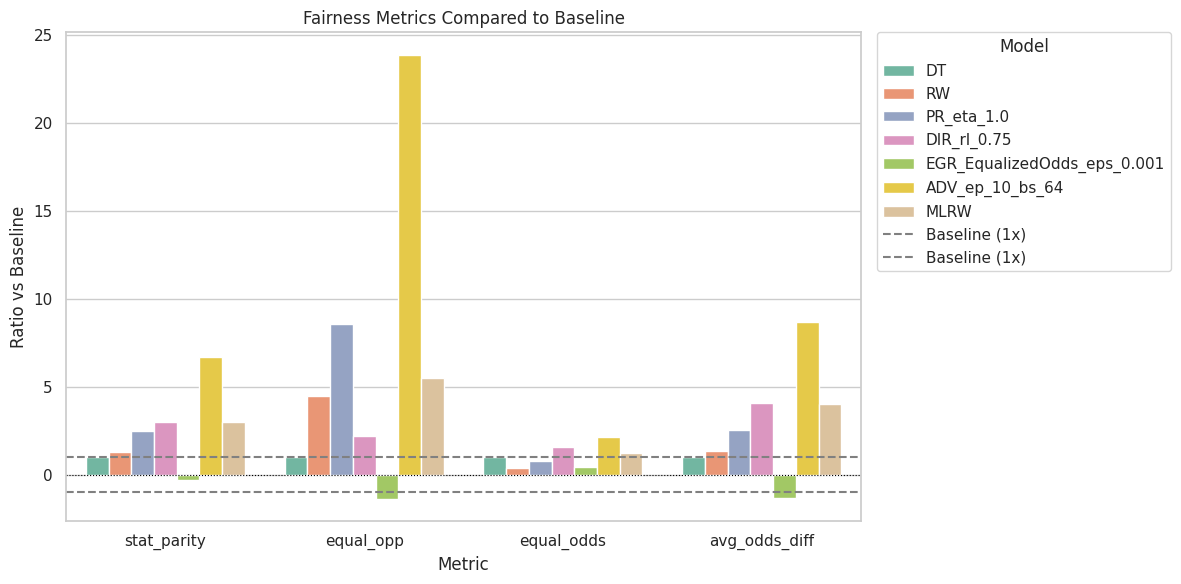

In [ ]:
combined_results_flip_1, combined_final_flip_1 = run_fair_ml_pipeline(
    data=bias_adjust_flip_1,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_final_flip_1.style.apply(
    highlight_max, subset=['accuracy', 'f1', 'roc_auc', 'tpr']).apply(
        highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff', 'fpr', 'fnr'])

In [ ]:
# Export the results DataFrame to a CSV file
combined_final_flip_1.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/Results/German/German_Sex_Flip1.csv')

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:21:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 361, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.451250 -> initscore=-0.195621
[LightGBM] [Info] Start training from score -0.195621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

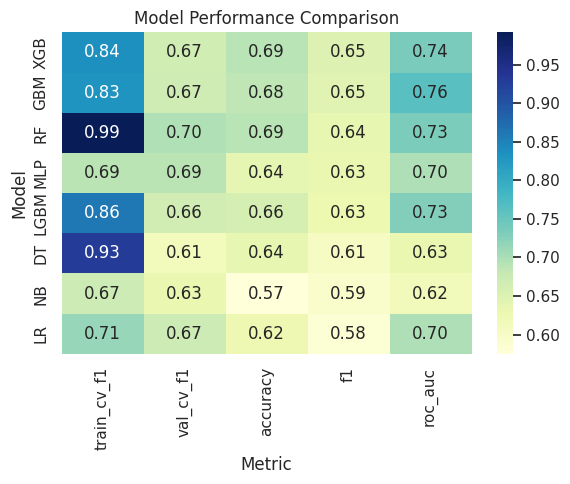

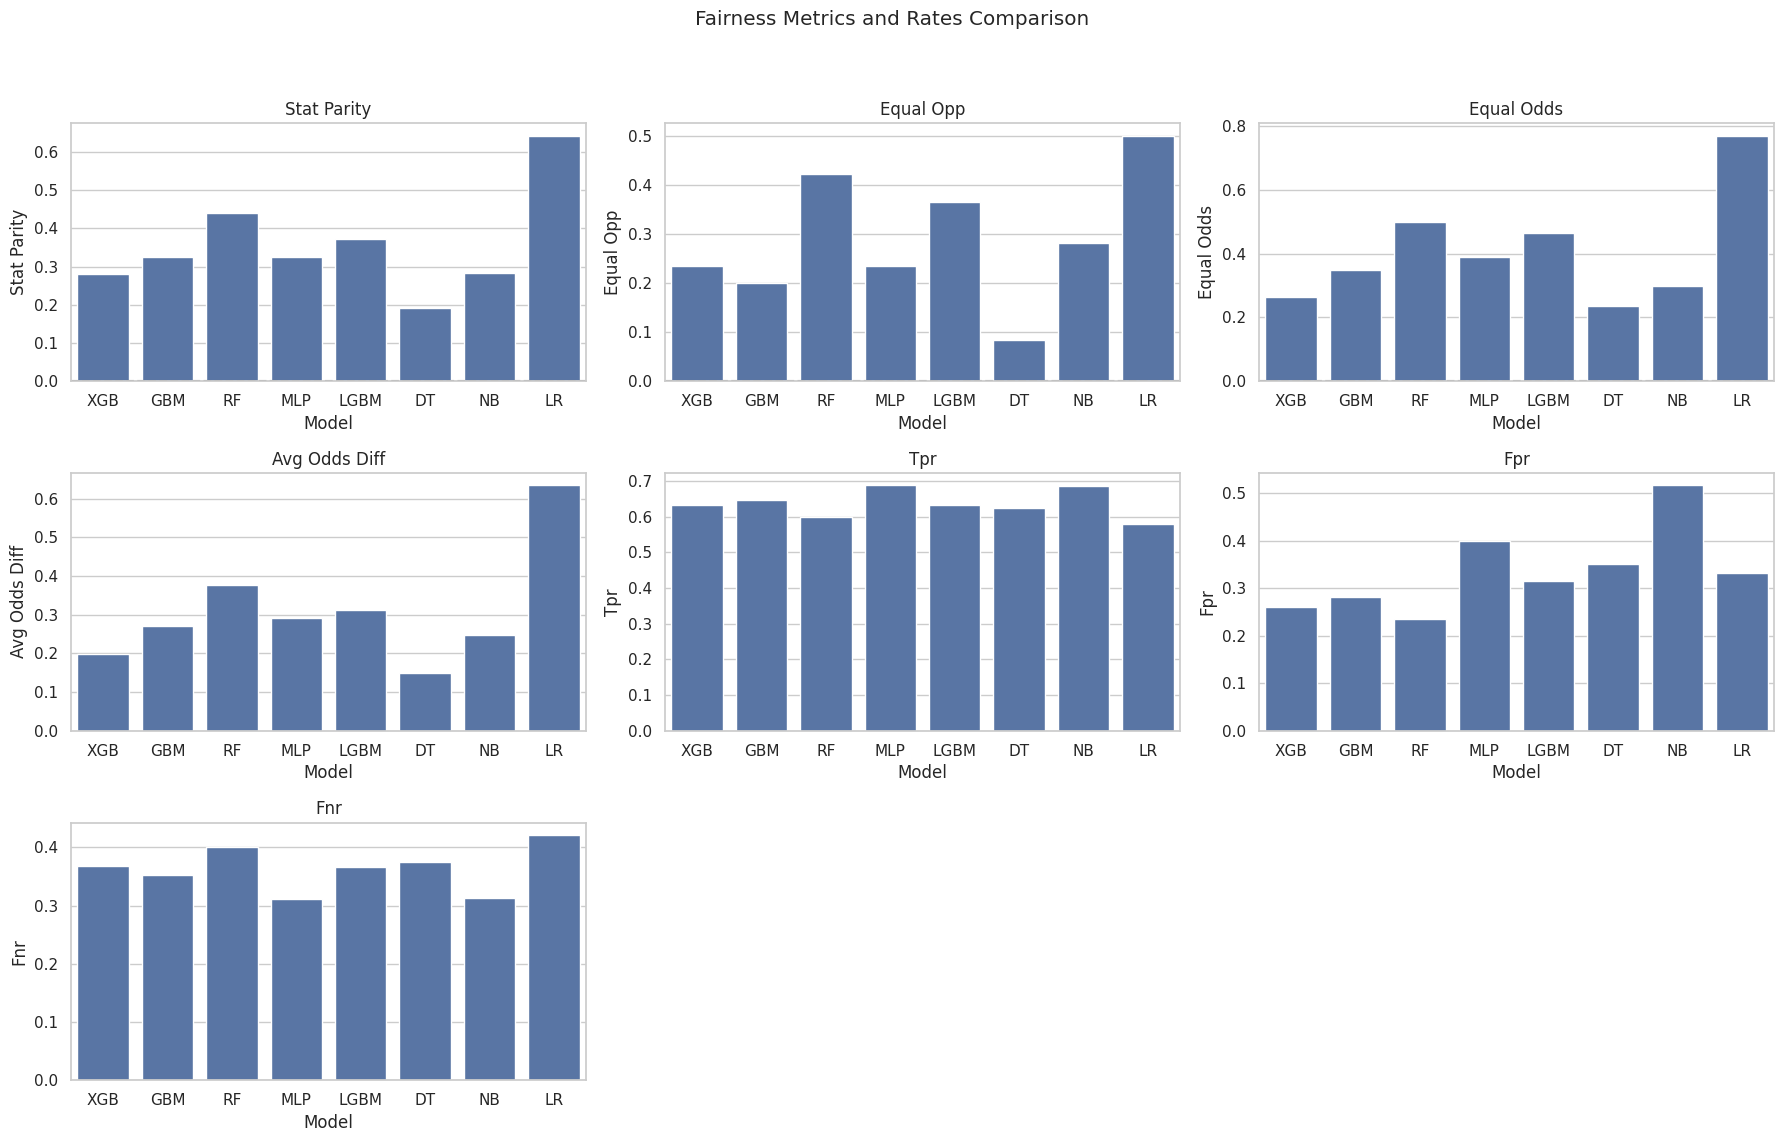

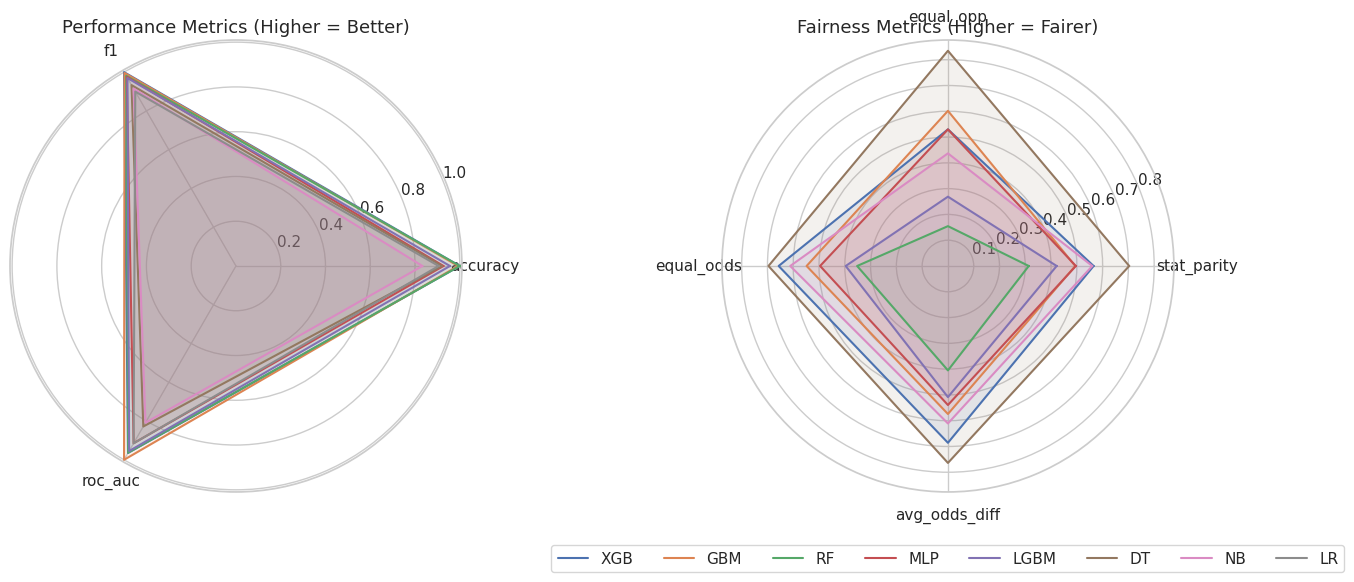

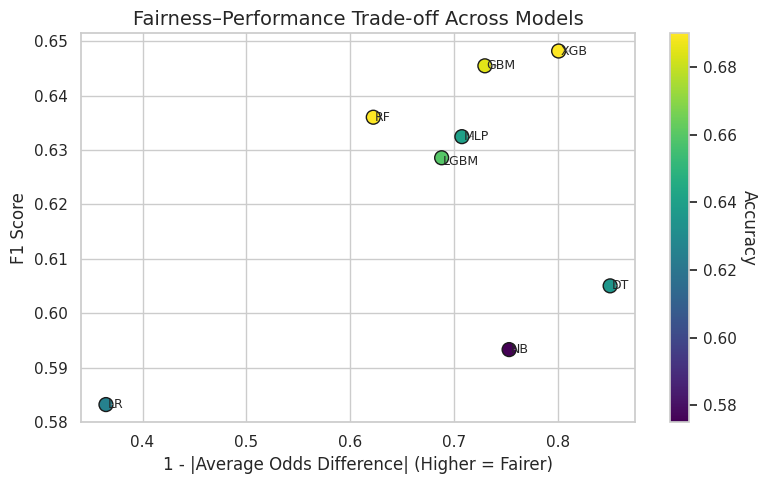

Balanced Best Model: DT
Model parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 57, 'splitter': 'best'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler 

epoch 0; iter: 0; batch classifier loss: 0.717366; batch adversarial loss: 0.712144
epoch 1; iter: 0; batch classifier loss: 0.601640; batch adversarial loss: 0.726470
epoch 2; iter: 0; batch classifier loss: 0.613354; batch adversarial loss: 0.711348
epoch 3; iter: 0; batch classifier loss: 0.573105; batch adversarial loss: 0.678836
epoch 4; iter: 0; batch classifier loss: 0.591928; batch adversarial loss: 0.682776
epoch 5; iter: 0; batch classifier loss: 0.586522; batch adversarial loss: 0.663274
epoch 6; iter: 0; batch classifier loss: 0.430183; batch adversarial loss: 0.644043
epoch 7; iter: 0; batch classifier loss: 0.558703; batch adversarial loss: 0.661983
epoch 8; iter: 0; batch classifier loss: 0.473314; batch adversarial loss: 0.647972
epoch 9; iter: 0; batch classifier loss: 0.591643; batch adversarial loss: 0.630896
epoch 0; iter: 0; batch classifier loss: 0.717366; batch adversarial loss: 0.712144
epoch 1; iter: 0; batch classifier loss: 0.601640; batch adversarial loss: 0

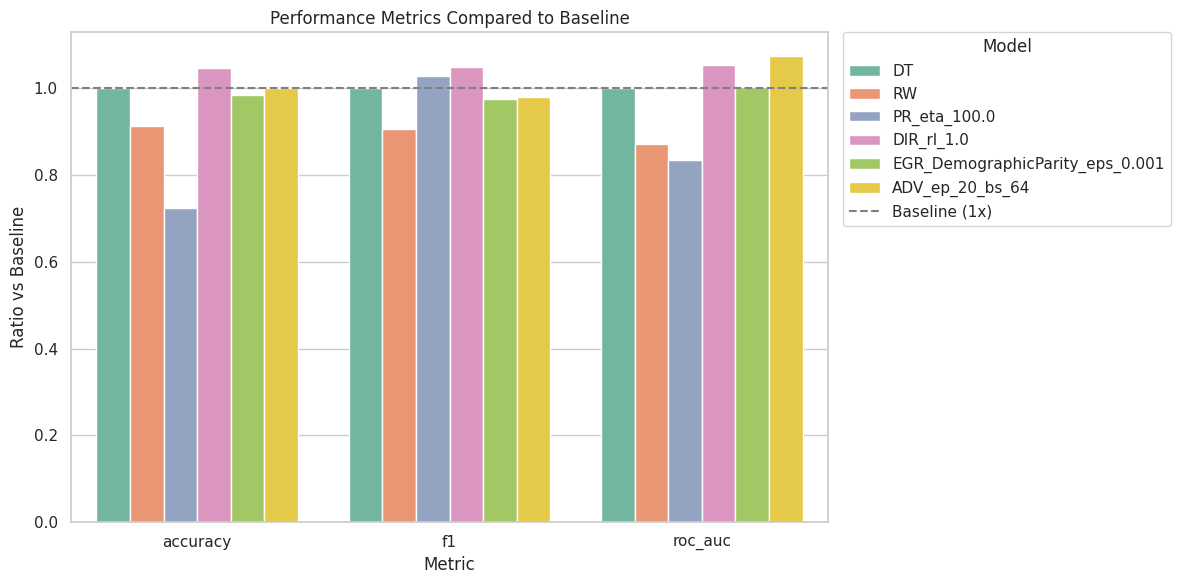

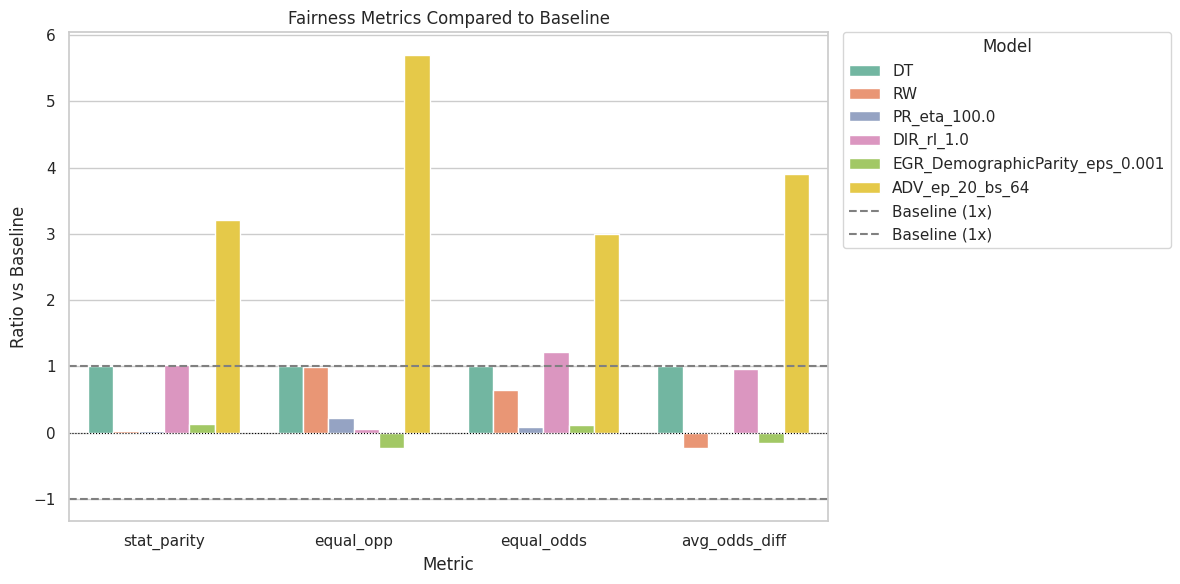

/tmp/ipython-input-2097818403.py:84: RuntimeWarning: invalid value encountered in scalar divide
  n_fav
/tmp/ipython-input-2097818403.py:89: RuntimeWarning: invalid value encountered in scalar divide
  n_unfav
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


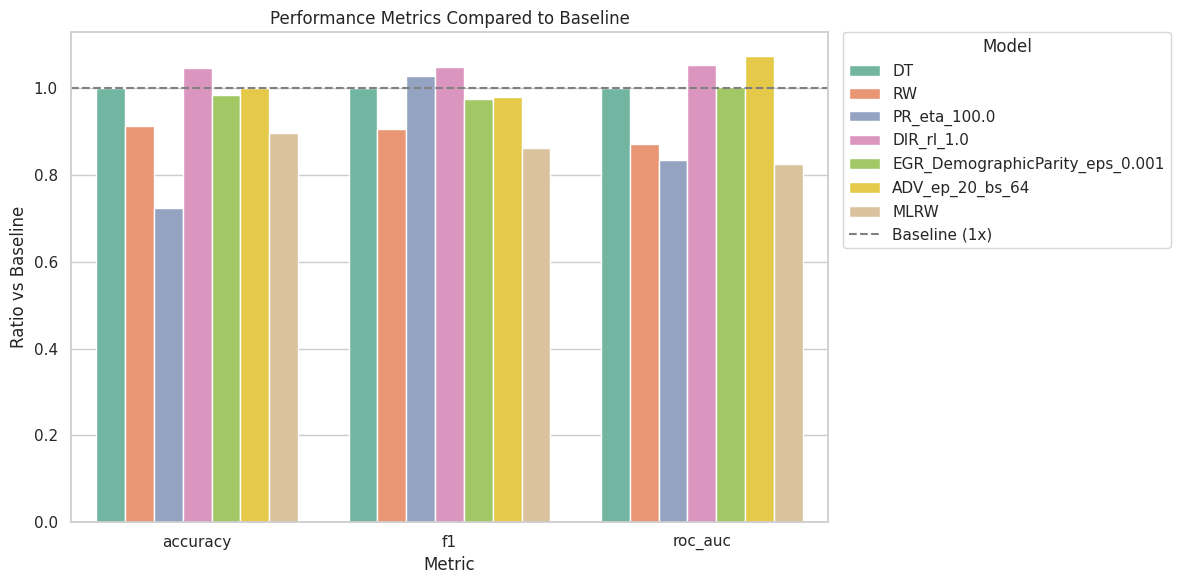

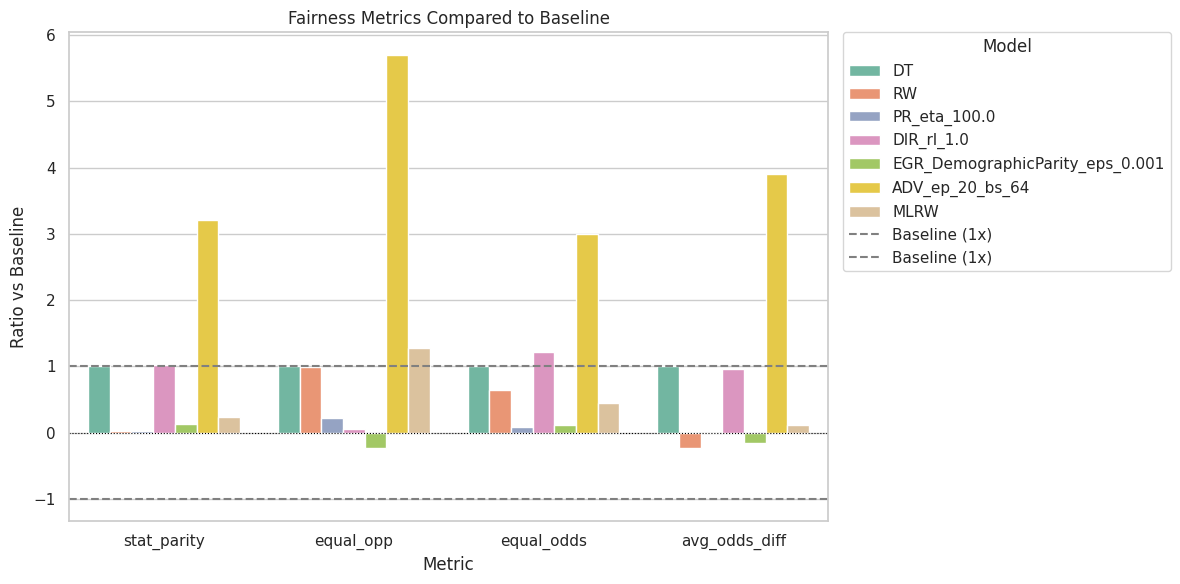

In [ ]:
combined_results_flip_2, combined_final_flip_2 = run_fair_ml_pipeline(
    data=bias_adjust_flip_2,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_final_flip_2.style.apply(
    highlight_max, subset=['accuracy', 'f1', 'roc_auc', 'tpr']).apply(
        highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff', 'fpr', 'fnr'])

In [ ]:
# Export the results DataFrame to a CSV file
combined_final_flip_2.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/Results/German/German_Sex_Flip2.csv')

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:23:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 586, number of negative: 214
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.732500 -> initscore=1.007344
[LightGBM] [Info] Start training from score 1.007344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

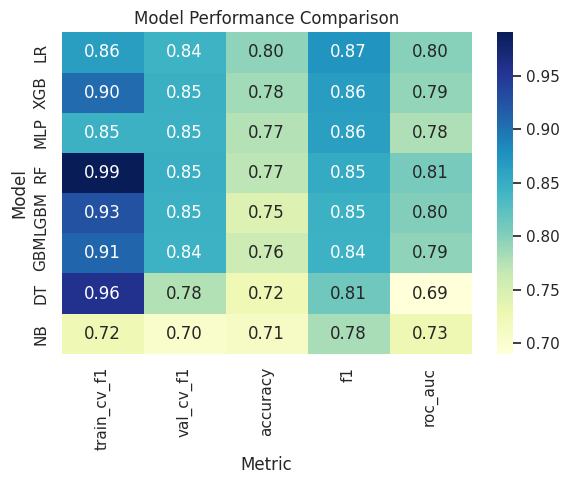

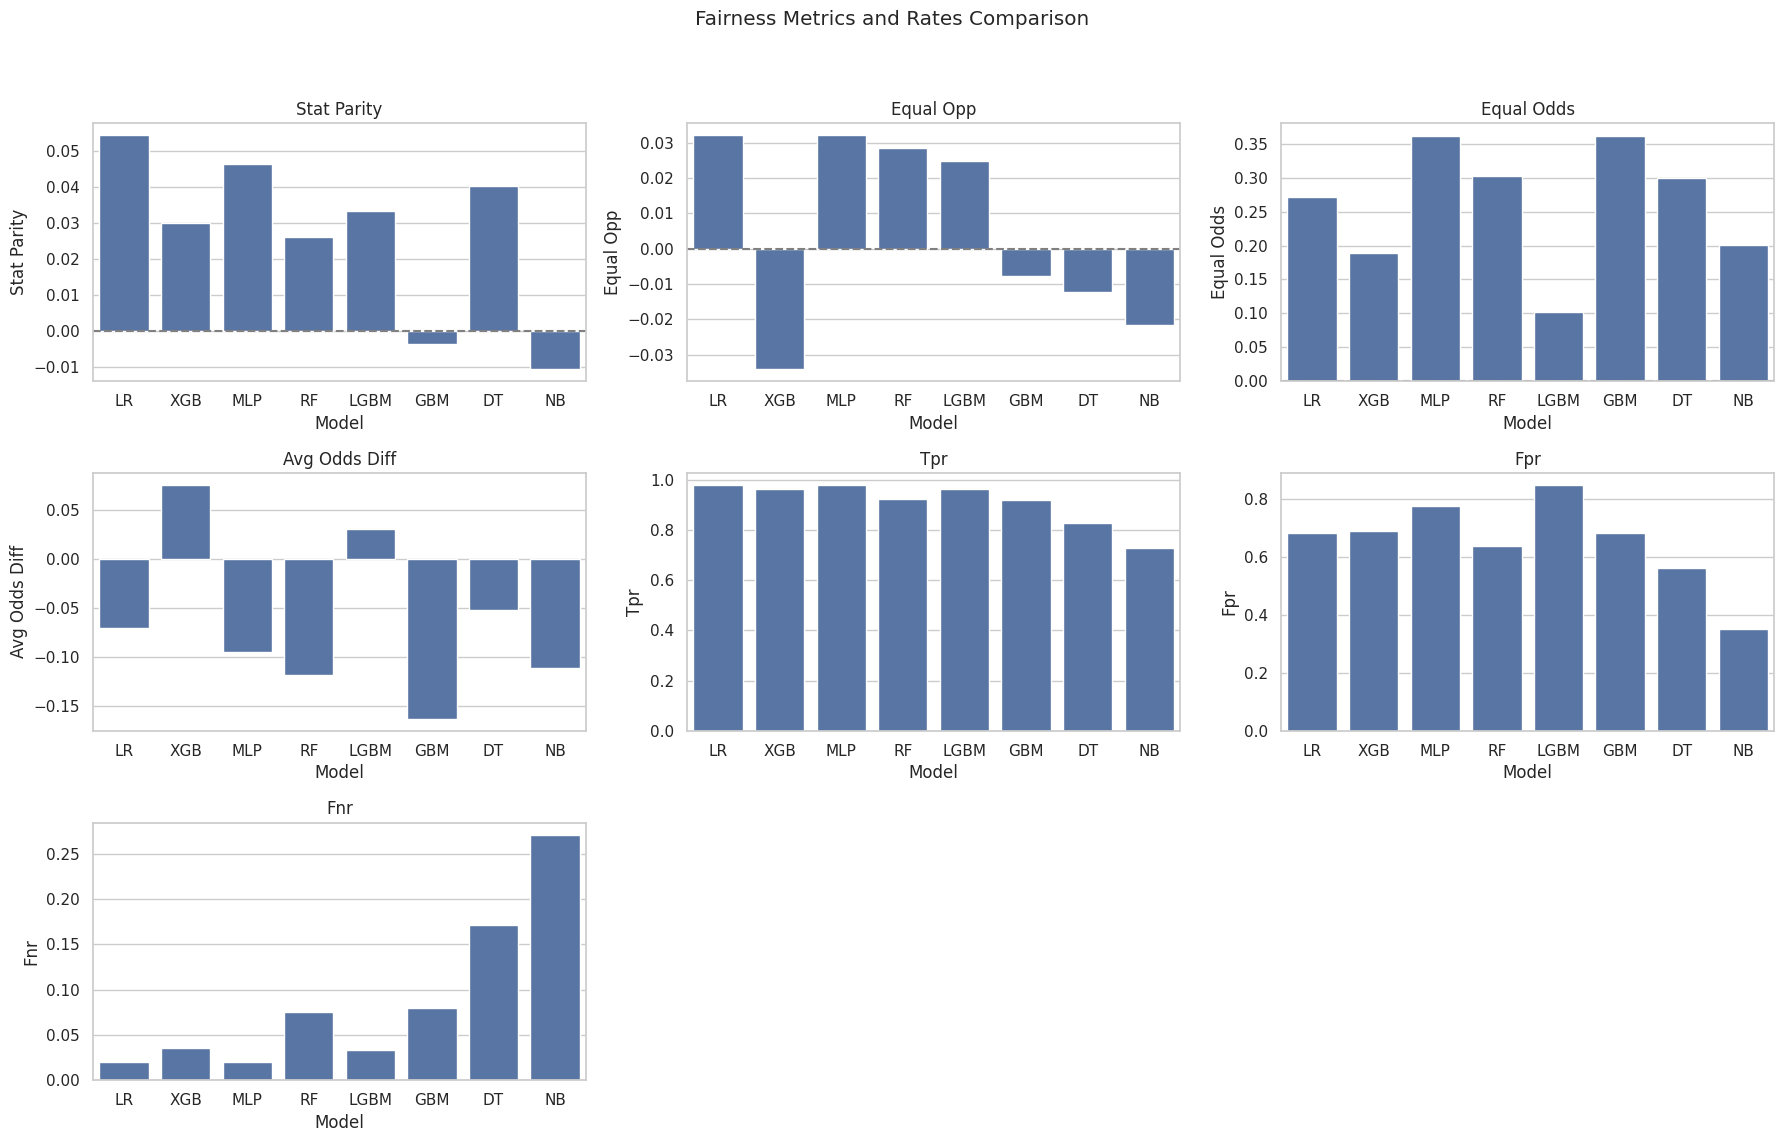

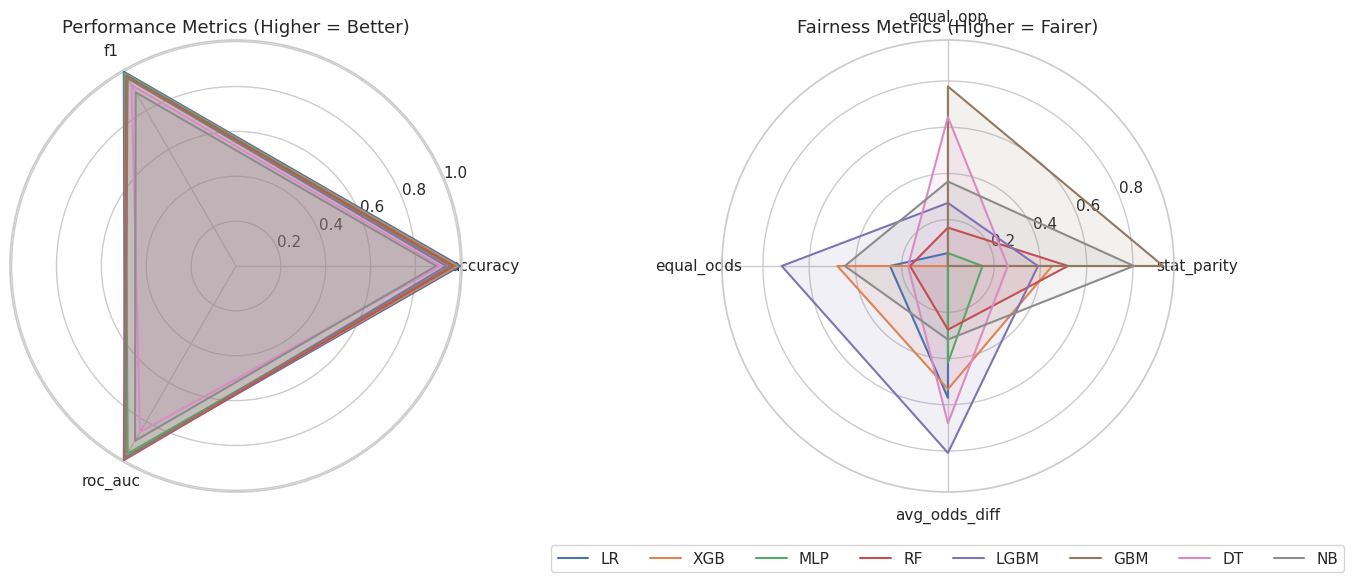

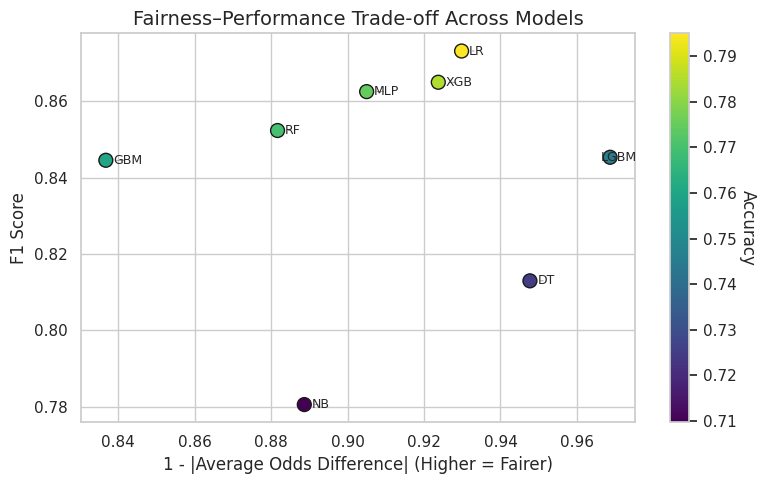

Balanced Best Model: LGBM
Model parameters:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.01, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 57, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
[LightGBM] [Info] Number of positive: 586, number of negative: 214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.732500 -> initscore=1.007344
[LightGBM] [Info] Start training from score 1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 586, number of negative: 214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.732500 -> initscore=1.007344
[LightGBM] [Info] Start training from score 1.007344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does n

[LightGBM] [Info] Number of positive: 586, number of negative: 214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.732500 -> initscore=1.007344
[LightGBM] [Info] Start training from score 1.007344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does n

[LightGBM] [Info] Number of positive: 586, number of negative: 214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.732500 -> initscore=1.007344
[LightGBM] [Info] Start training from score 1.007344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


epoch 0; iter: 0; batch classifier loss: 0.634443; batch adversarial loss: 0.754065
epoch 1; iter: 0; batch classifier loss: 0.542027; batch adversarial loss: 0.774638
epoch 2; iter: 0; batch classifier loss: 0.681859; batch adversarial loss: 0.723316
epoch 3; iter: 0; batch classifier loss: 0.465123; batch adversarial loss: 0.721861
epoch 4; iter: 0; batch classifier loss: 0.509083; batch adversarial loss: 0.698163
epoch 5; iter: 0; batch classifier loss: 0.551173; batch adversarial loss: 0.711146
epoch 6; iter: 0; batch classifier loss: 0.409714; batch adversarial loss: 0.696018
epoch 7; iter: 0; batch classifier loss: 0.555407; batch adversarial loss: 0.673130
epoch 8; iter: 0; batch classifier loss: 0.455090; batch adversarial loss: 0.685644
epoch 9; iter: 0; batch classifier loss: 0.500543; batch adversarial loss: 0.693841
epoch 0; iter: 0; batch classifier loss: 0.634443; batch adversarial loss: 0.754065
epoch 1; iter: 0; batch classifier loss: 0.542027; batch adversarial loss: 0

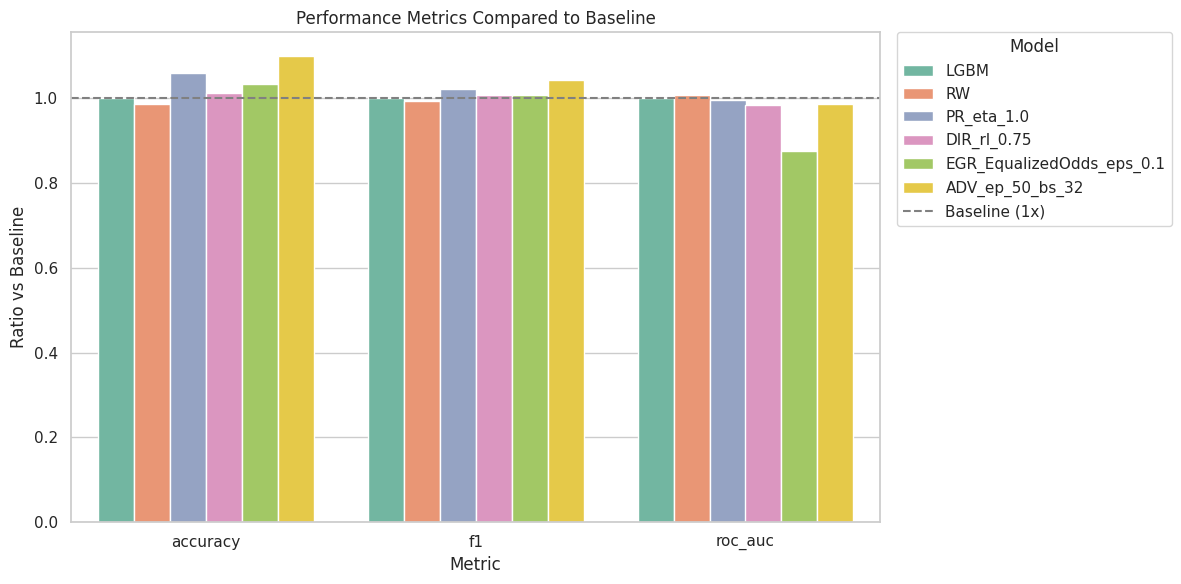

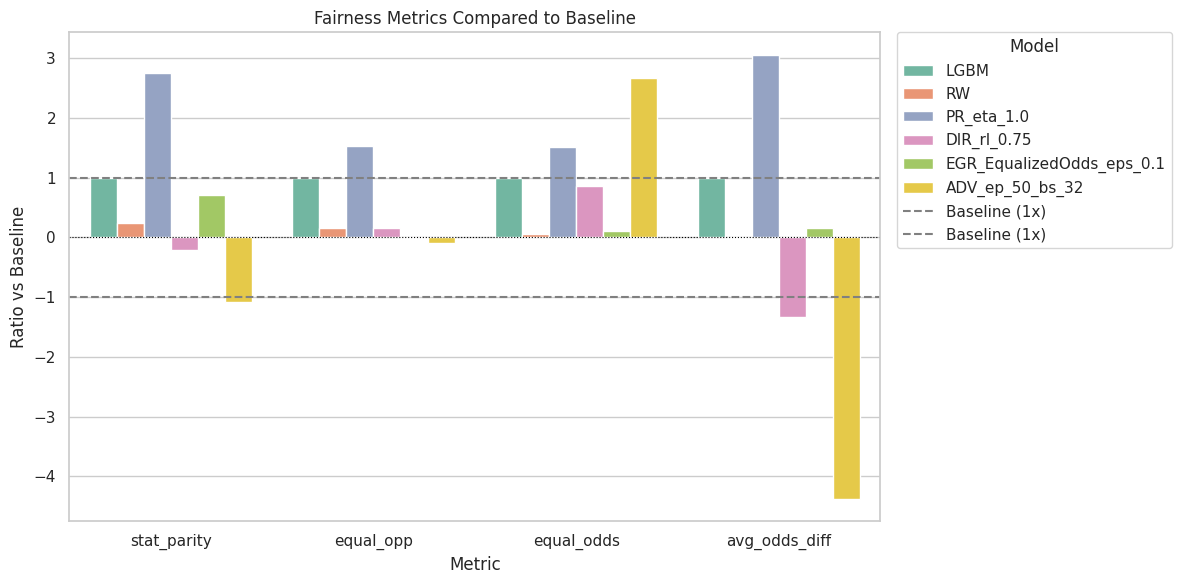

/tmp/ipython-input-2097818403.py:84: RuntimeWarning: invalid value encountered in scalar divide
  n_fav
/tmp/ipython-input-2097818403.py:89: RuntimeWarning: invalid value encountered in scalar divide
  n_unfav
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 586, number of negative: 214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.732500 -> initscore=1.007344
[LightGBM] [Info] Start training from score 1.007344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

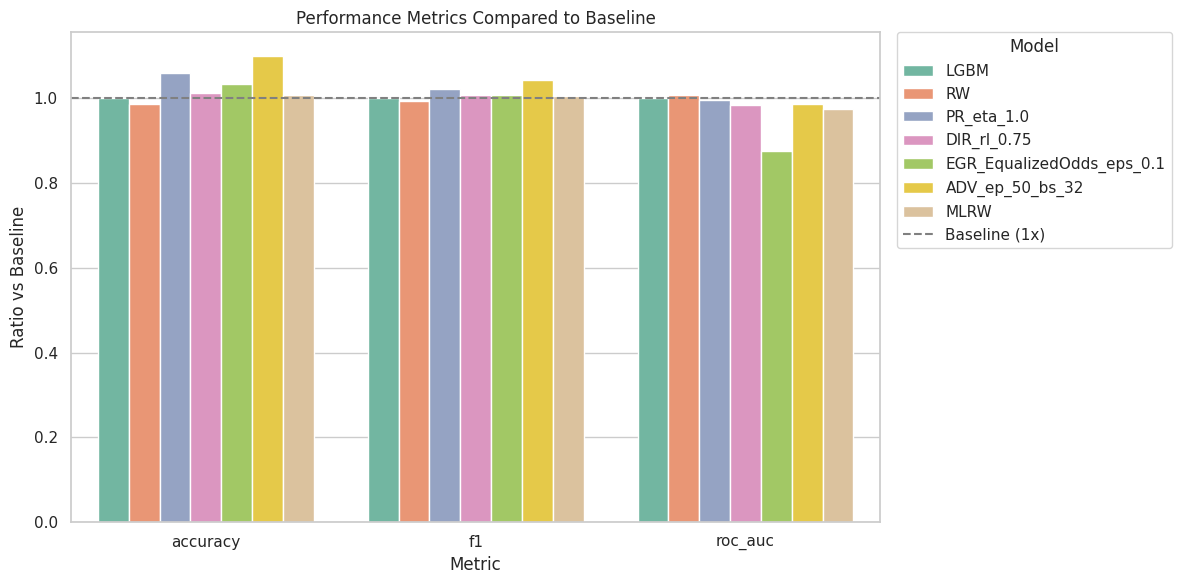

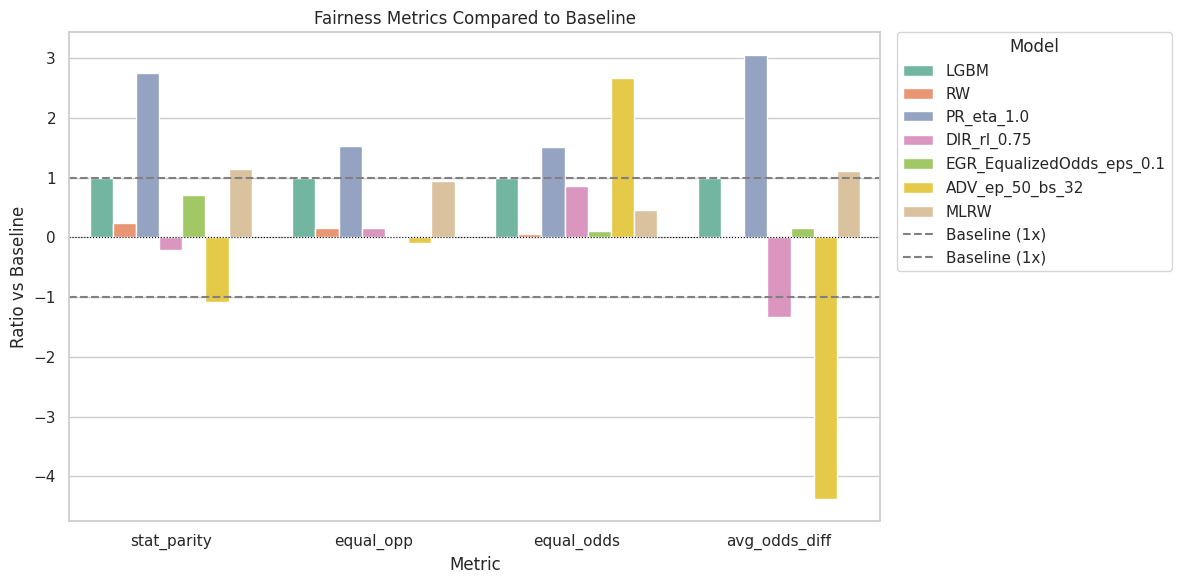

In [ ]:
combined_results_flip_3, combined_final_flip_3 = run_fair_ml_pipeline(
    data=bias_adjust_flip_3,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_final_flip_3.style.apply(
    highlight_max, subset=['accuracy', 'f1', 'roc_auc', 'tpr']).apply(
        highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff', 'fpr', 'fnr'])

In [ ]:
# Export the results DataFrame to a CSV file
combined_final_flip_3.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/Results/German/German_Sex_Flip3.csv')

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:26:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 603, number of negative: 197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.753750 -> initscore=1.118713
[LightGBM] [Info] Start training from score 1.118713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

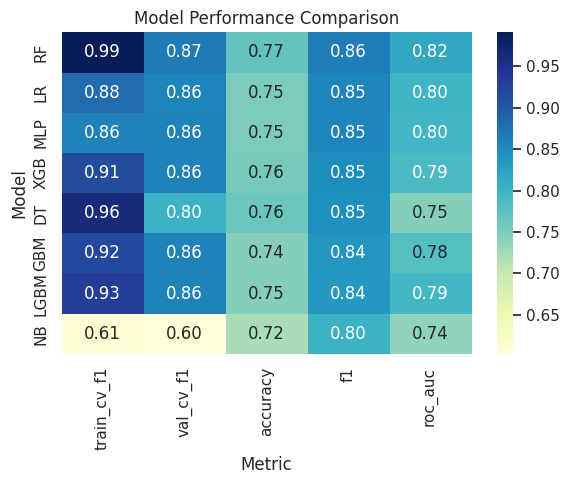

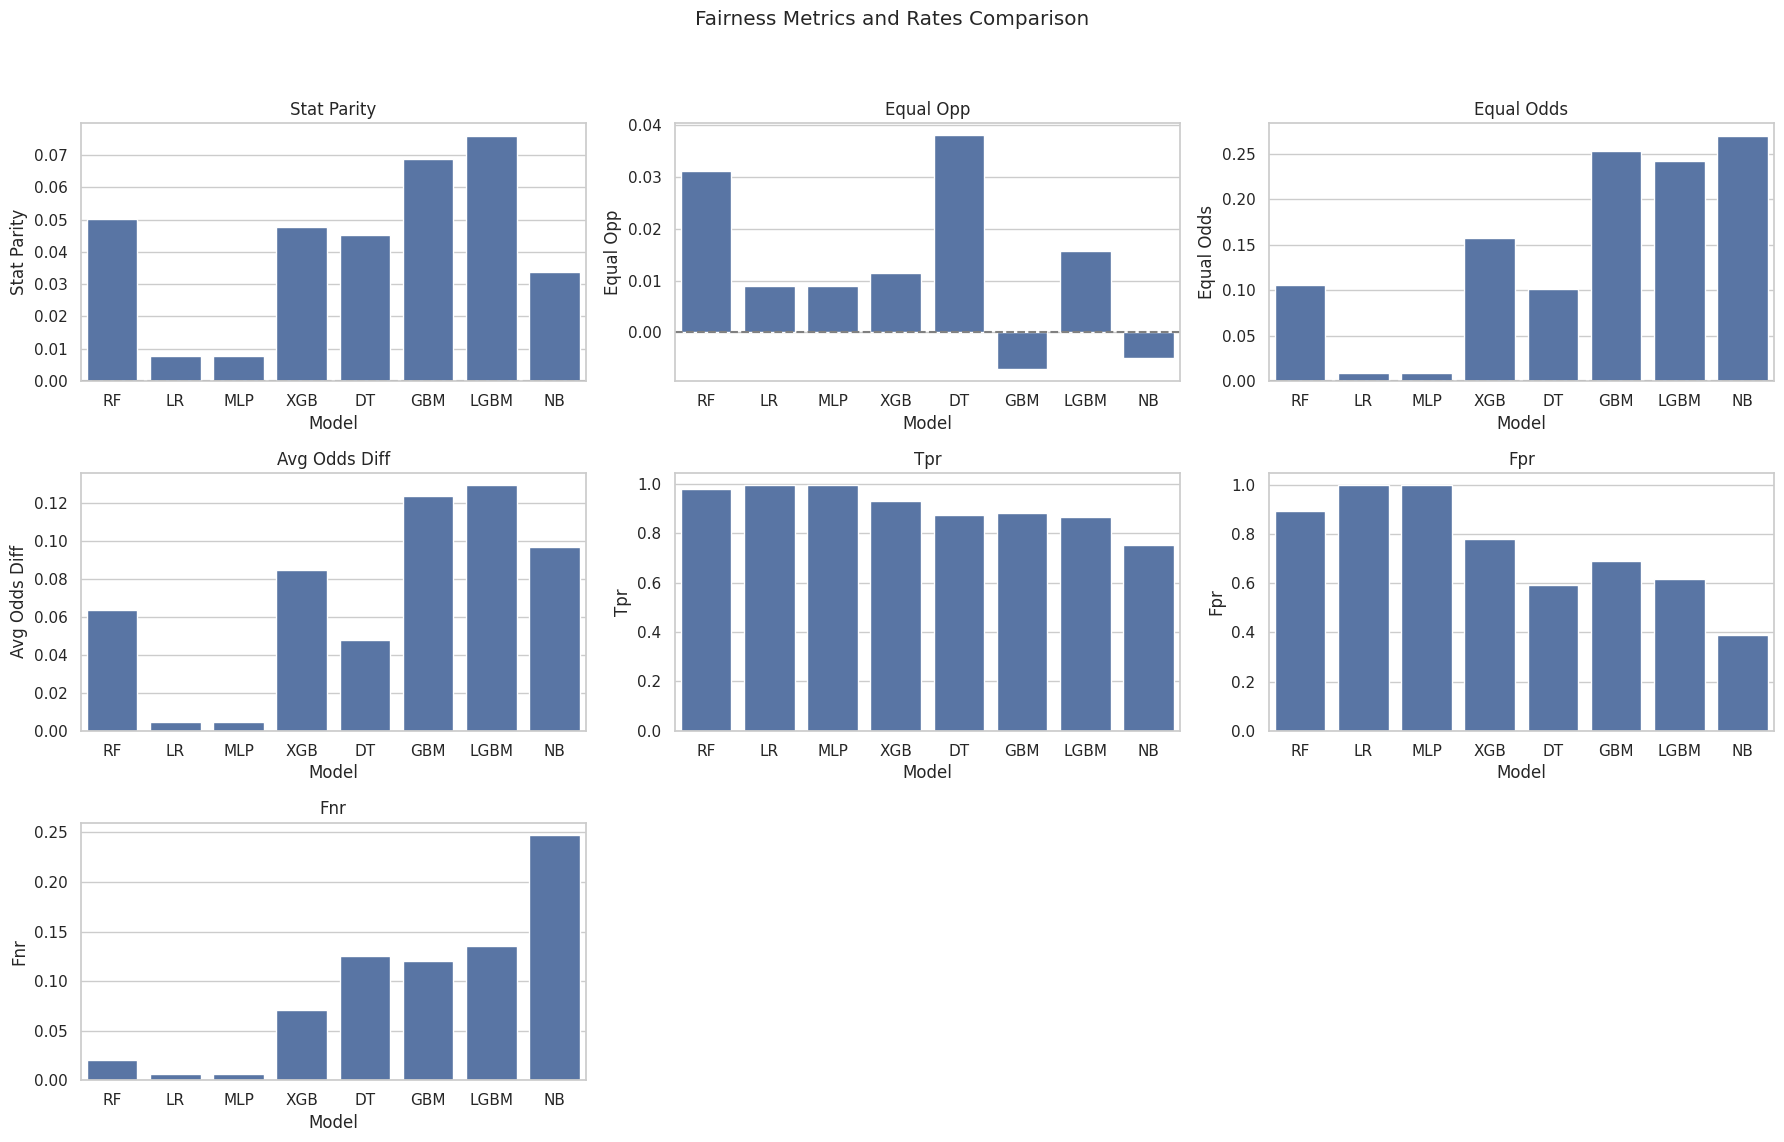

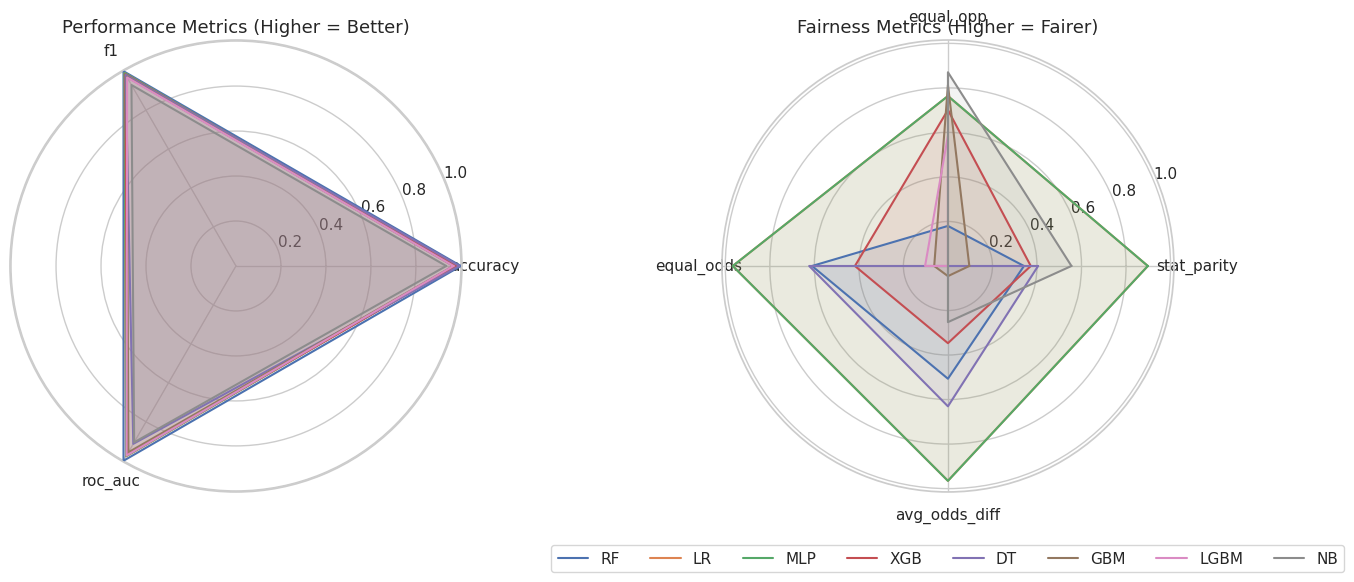

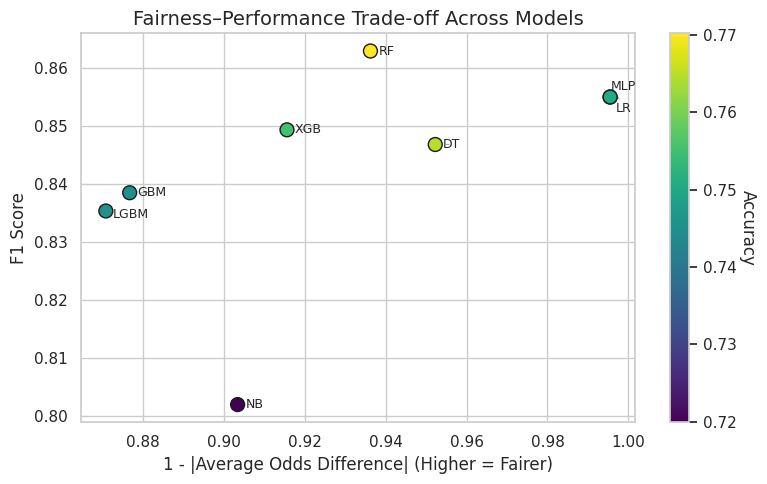

Balanced Best Model: LR
Model parameters:
{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 2000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': 57, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler 

epoch 0; iter: 0; batch classifier loss: 0.659547; batch adversarial loss: 0.777175
epoch 1; iter: 0; batch classifier loss: 0.496037; batch adversarial loss: 0.776340
epoch 2; iter: 0; batch classifier loss: 0.575552; batch adversarial loss: 0.744434
epoch 3; iter: 0; batch classifier loss: 0.485182; batch adversarial loss: 0.732830
epoch 4; iter: 0; batch classifier loss: 0.552359; batch adversarial loss: 0.715816
epoch 5; iter: 0; batch classifier loss: 0.416741; batch adversarial loss: 0.689340
epoch 6; iter: 0; batch classifier loss: 0.446639; batch adversarial loss: 0.688746
epoch 7; iter: 0; batch classifier loss: 0.470734; batch adversarial loss: 0.683365
epoch 8; iter: 0; batch classifier loss: 0.276408; batch adversarial loss: 0.672885
epoch 9; iter: 0; batch classifier loss: 0.511361; batch adversarial loss: 0.655089
epoch 0; iter: 0; batch classifier loss: 0.659547; batch adversarial loss: 0.777175
epoch 1; iter: 0; batch classifier loss: 0.496037; batch adversarial loss: 0

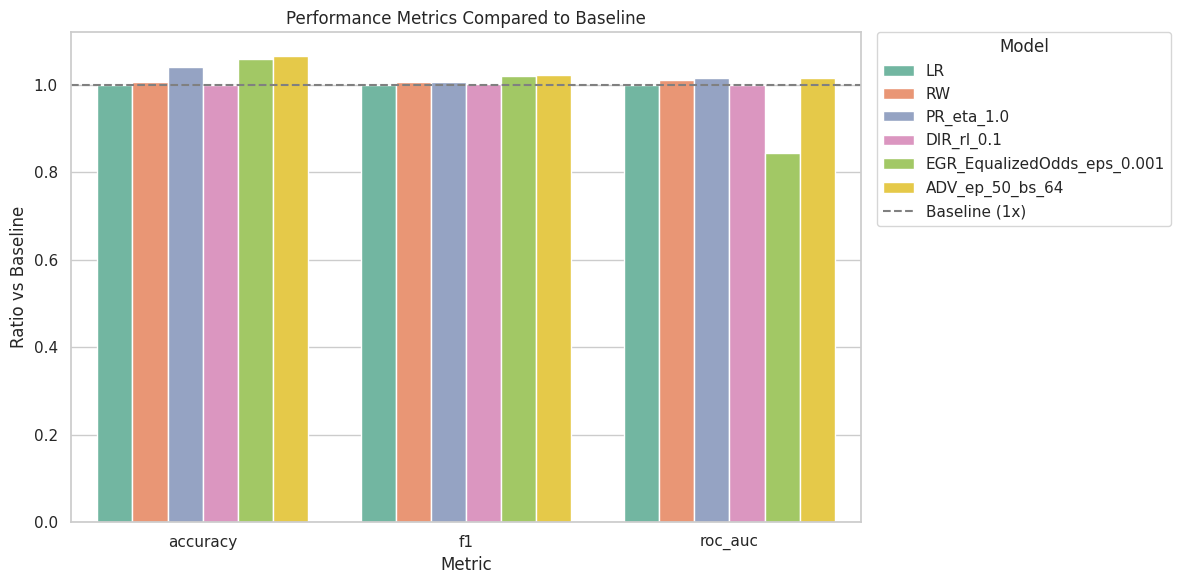

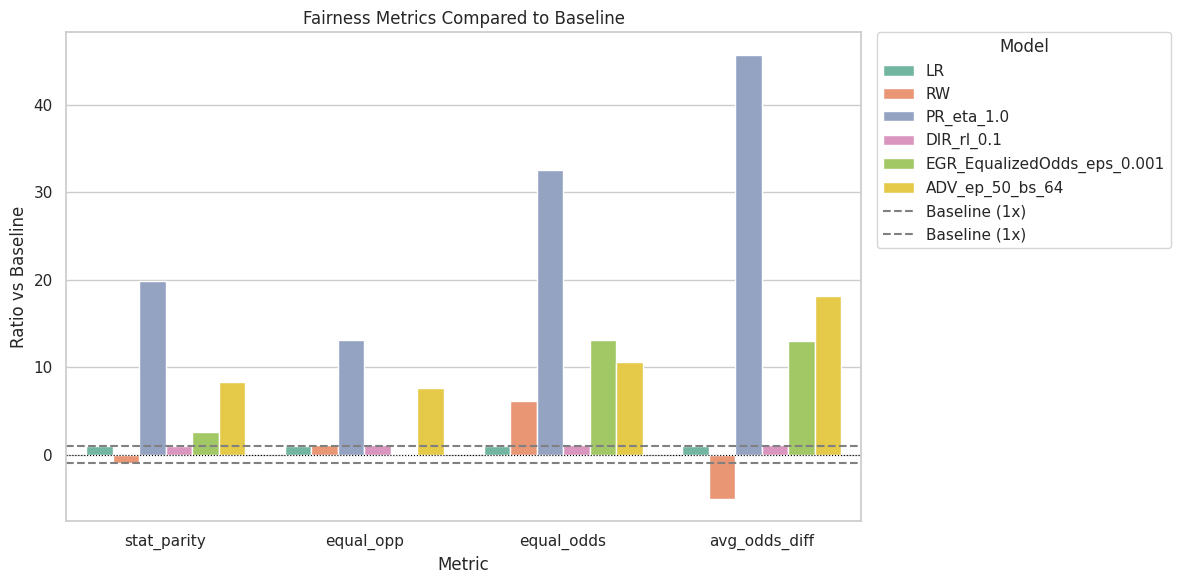

/tmp/ipython-input-2097818403.py:84: RuntimeWarning: invalid value encountered in scalar divide
  n_fav
/tmp/ipython-input-2097818403.py:89: RuntimeWarning: invalid value encountered in scalar divide
  n_unfav
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


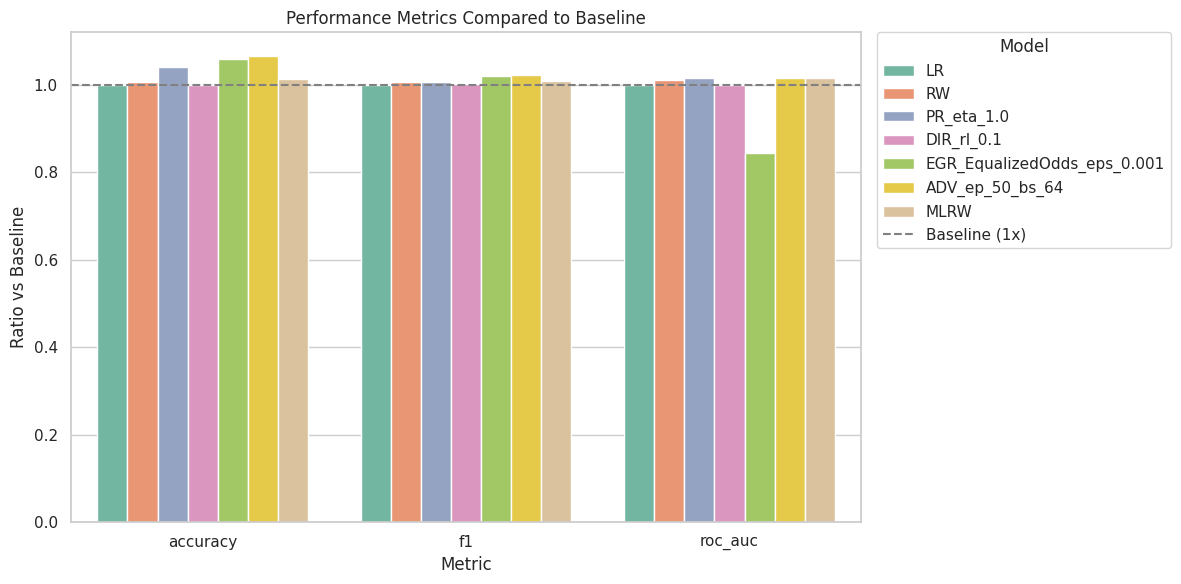

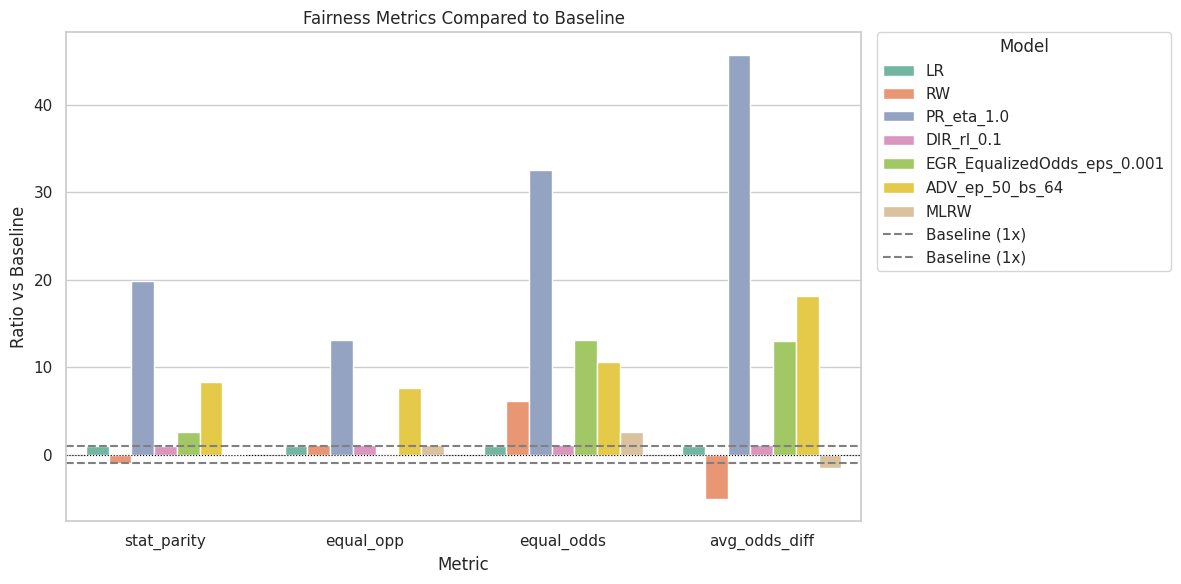

In [ ]:
combined_results_flip_4, combined_final_flip_4 = run_fair_ml_pipeline(
    data=bias_adjust_flip_4,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_final_flip_4.style.apply(
    highlight_max, subset=['accuracy', 'f1', 'roc_auc', 'tpr']).apply(
        highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff', 'fpr', 'fnr'])

In [ ]:
# Export the results DataFrame to a CSV file
combined_final_flip_4.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/Results/German/German_Sex_Flip4.csv')

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:28:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 552, number of negative: 248
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.690000 -> initscore=0.800119
[LightGBM] [Info] Start training from score 0.800119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

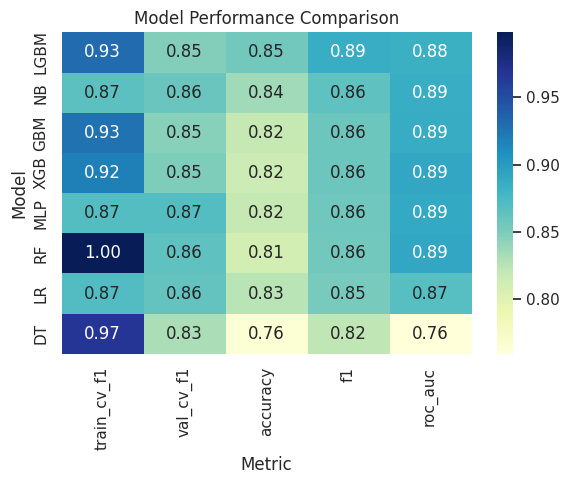

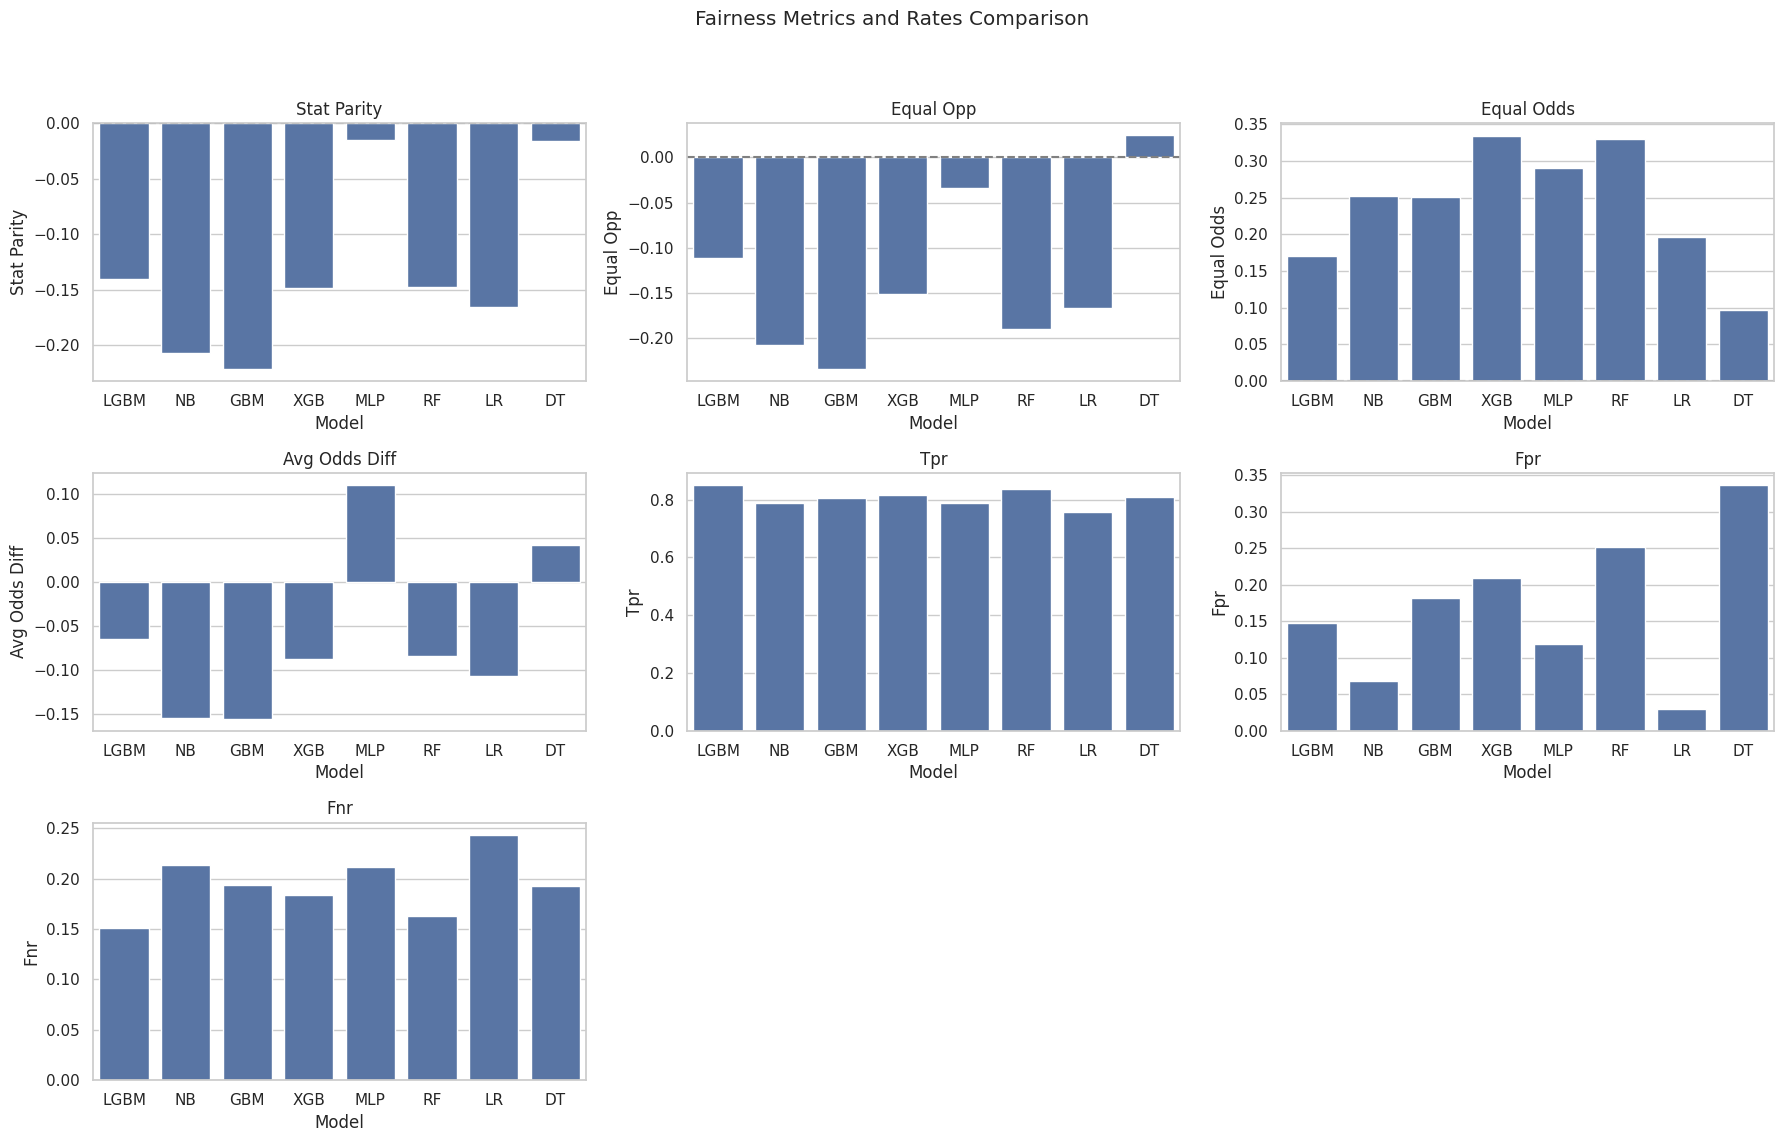

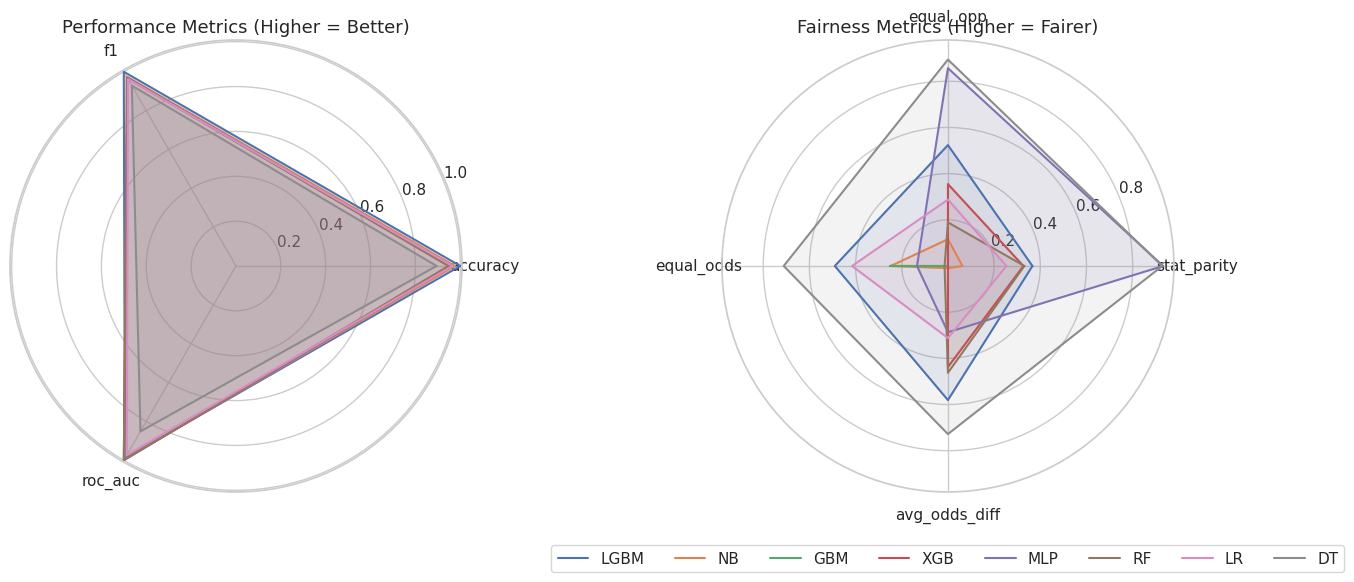

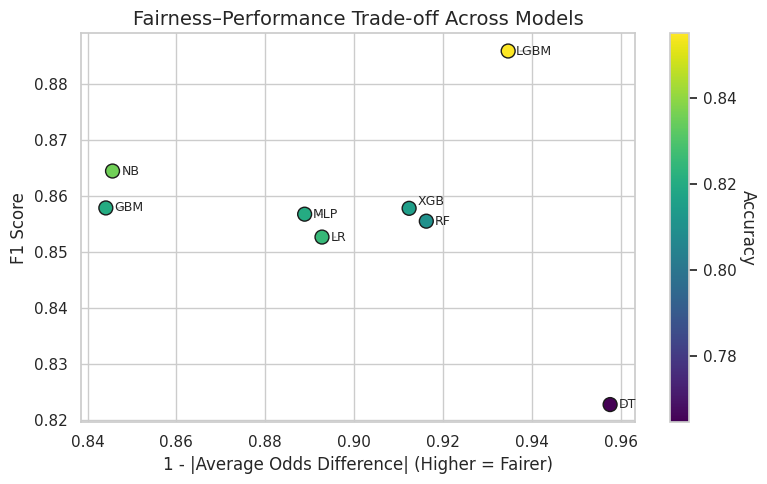

Balanced Best Model: DT
Model parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 57, 'splitter': 'best'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler 

epoch 0; iter: 0; batch classifier loss: 0.690202; batch adversarial loss: 0.756497
epoch 1; iter: 0; batch classifier loss: 0.599487; batch adversarial loss: 0.764507
epoch 2; iter: 0; batch classifier loss: 0.541183; batch adversarial loss: 0.736857
epoch 3; iter: 0; batch classifier loss: 0.474118; batch adversarial loss: 0.752169
epoch 4; iter: 0; batch classifier loss: 0.380506; batch adversarial loss: 0.714574
epoch 5; iter: 0; batch classifier loss: 0.243198; batch adversarial loss: 0.745858
epoch 6; iter: 0; batch classifier loss: 0.336548; batch adversarial loss: 0.701528
epoch 7; iter: 0; batch classifier loss: 0.293407; batch adversarial loss: 0.714785
epoch 8; iter: 0; batch classifier loss: 0.319465; batch adversarial loss: 0.688785
epoch 9; iter: 0; batch classifier loss: 0.442082; batch adversarial loss: 0.662402
epoch 0; iter: 0; batch classifier loss: 0.690202; batch adversarial loss: 0.756497
epoch 1; iter: 0; batch classifier loss: 0.599487; batch adversarial loss: 0

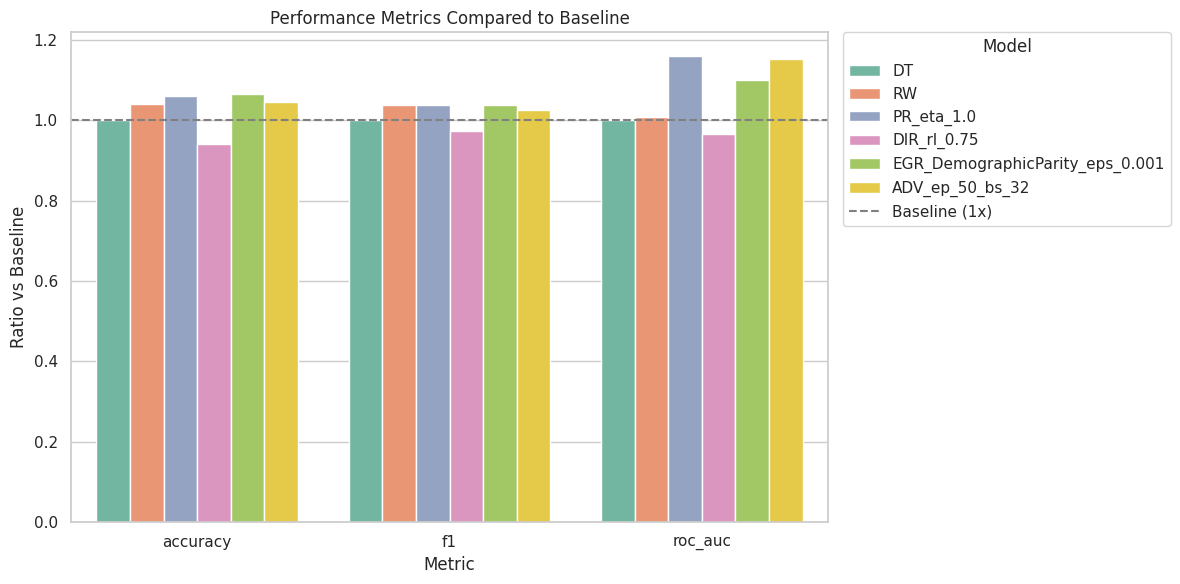

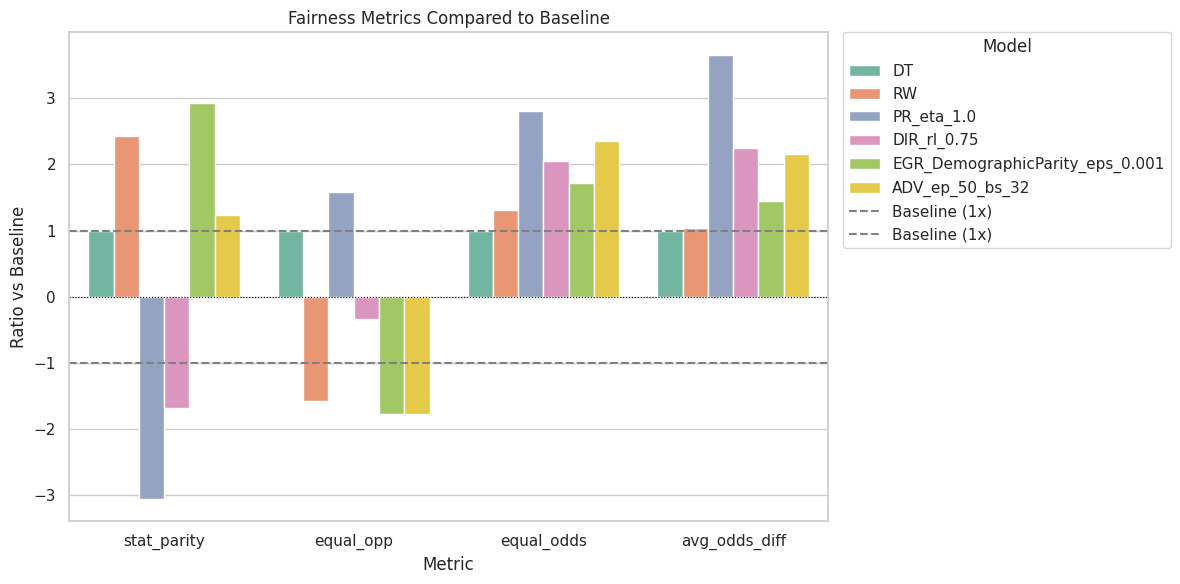

/tmp/ipython-input-2097818403.py:84: RuntimeWarning: invalid value encountered in scalar divide
  n_fav
/tmp/ipython-input-2097818403.py:89: RuntimeWarning: invalid value encountered in scalar divide
  n_unfav
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/aif360/metrics/classification_metric.py:673: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_pred_positives(privileged=privileged)
/usr/local/lib/python3.11/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.11/dist-packages/aif36

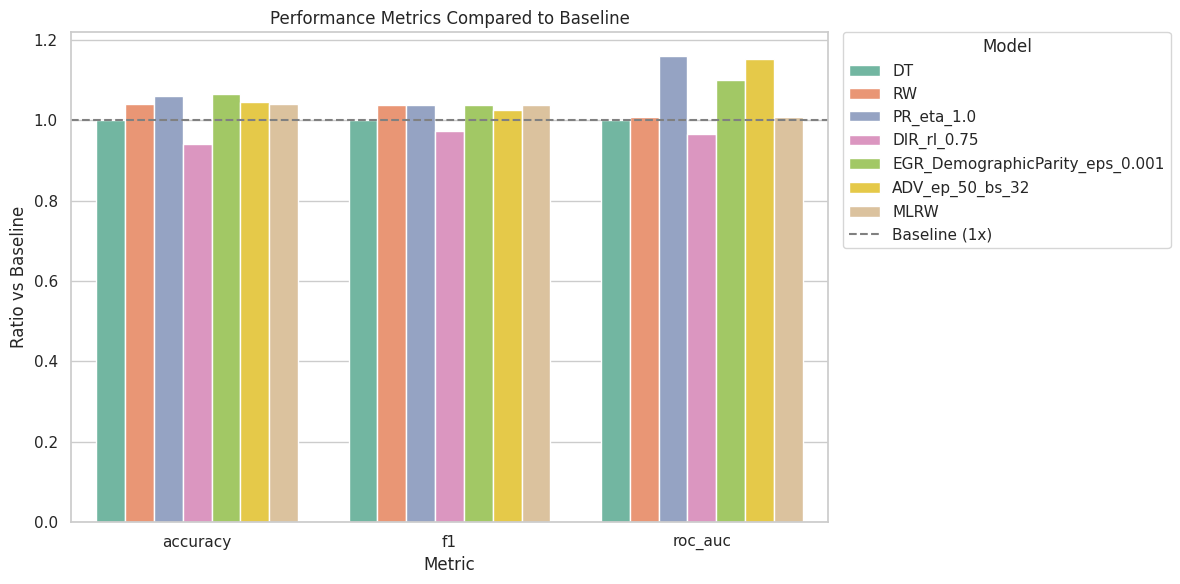

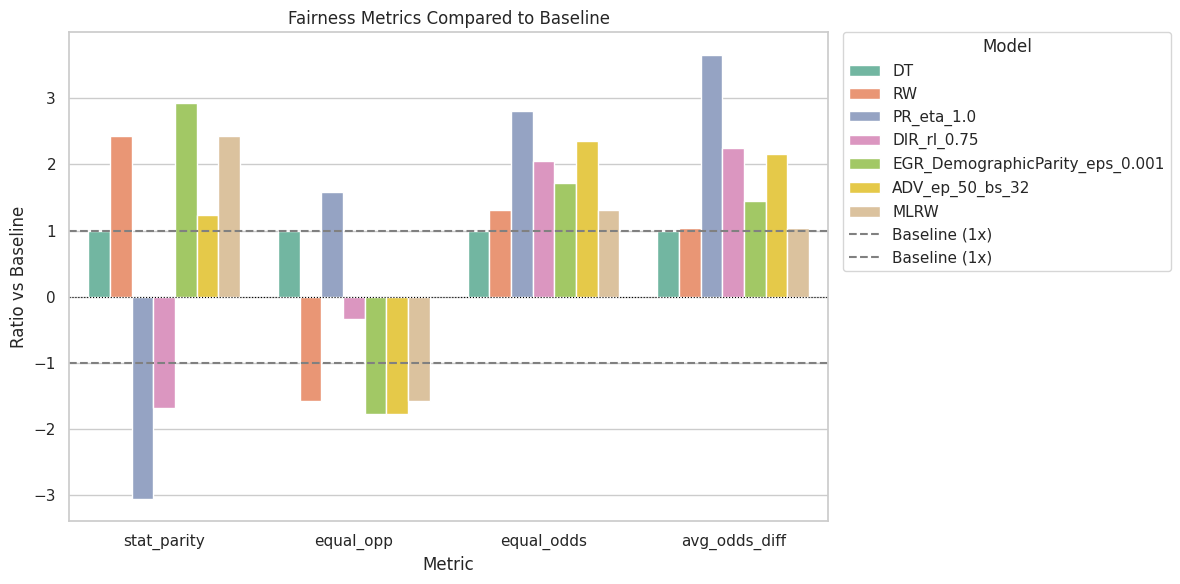

In [ ]:
combined_results_genalgo, combined_final_genalgo = run_fair_ml_pipeline(
    data=df_unfair,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_final_genalgo.style.apply(
    highlight_max, subset=['accuracy', 'f1', 'roc_auc', 'tpr']).apply(
        highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff', 'fpr', 'fnr'])

In [ ]:
# Export the results DataFrame to a CSV file
combined_final_genalgo.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/Results/German/German_Sex_GenAlgo.csv')

## Run the Boundary Flip Datasets

In [ ]:
X_train_flipped, X_test_flipped, y_train_flipped, y_test_flipped = train_test_split(X_flipped, y_flipped, test_size=0.2, random_state=random_seed, stratify=y_flipped)

In [ ]:
boundary_data = pd.concat([X_train_flipped, y_train_flipped], axis=1)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:32:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 515, number of negative: 285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.643750 -> initscore=0.591678
[LightGBM] [Info] Start training from score 0.591678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

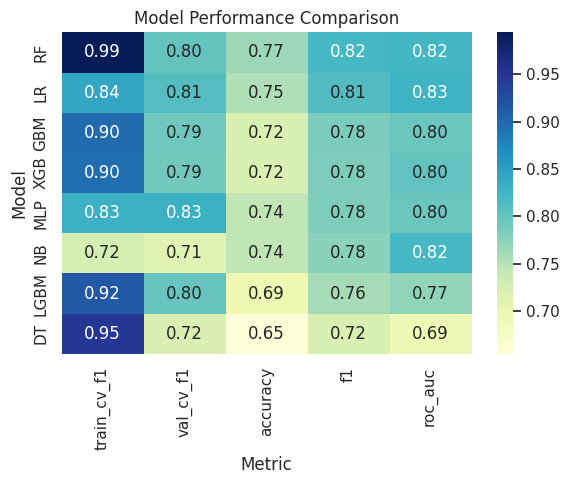

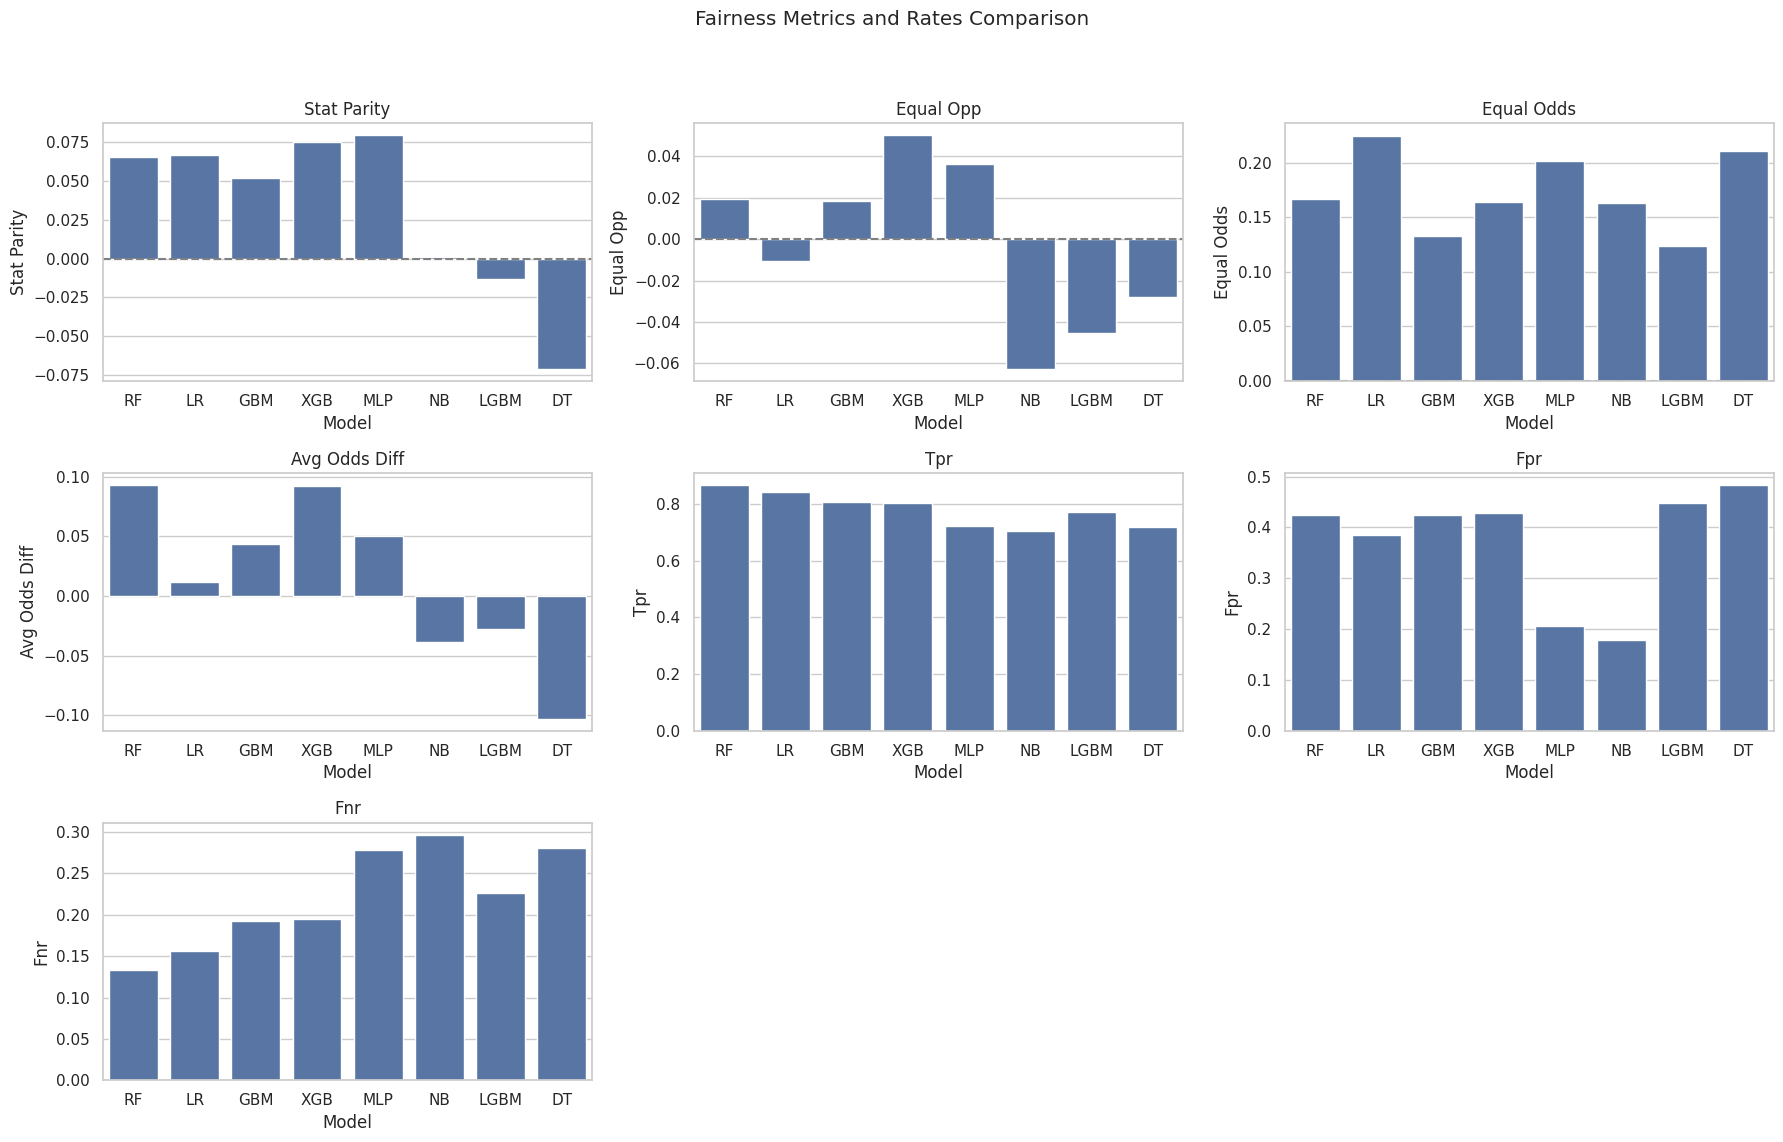

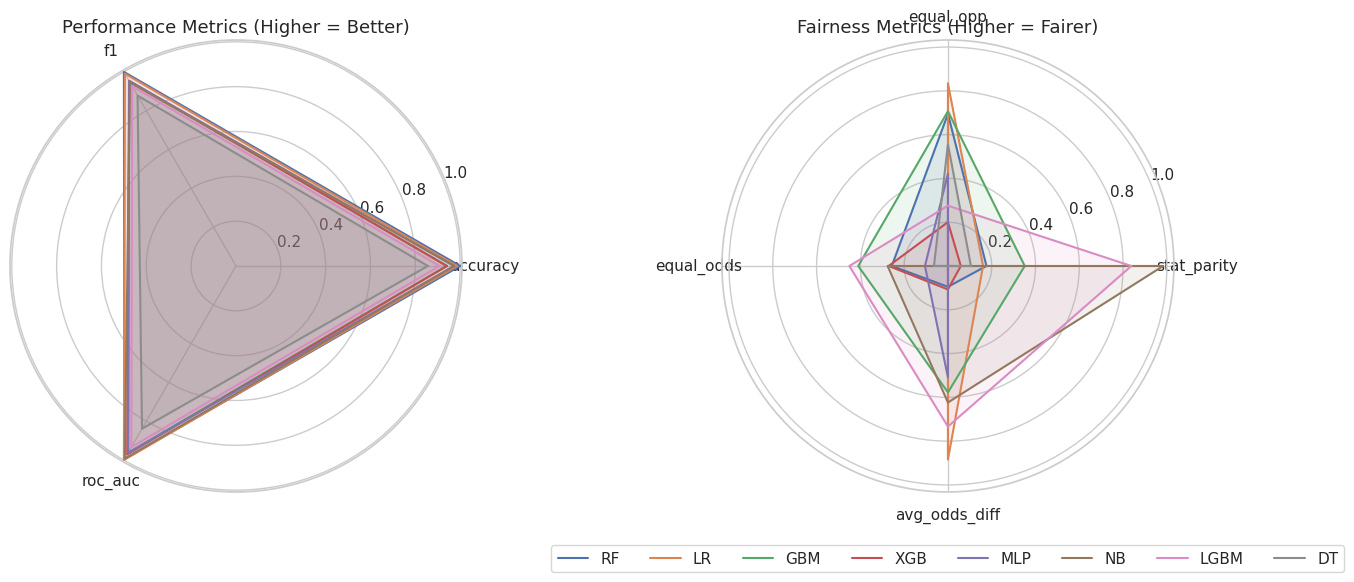

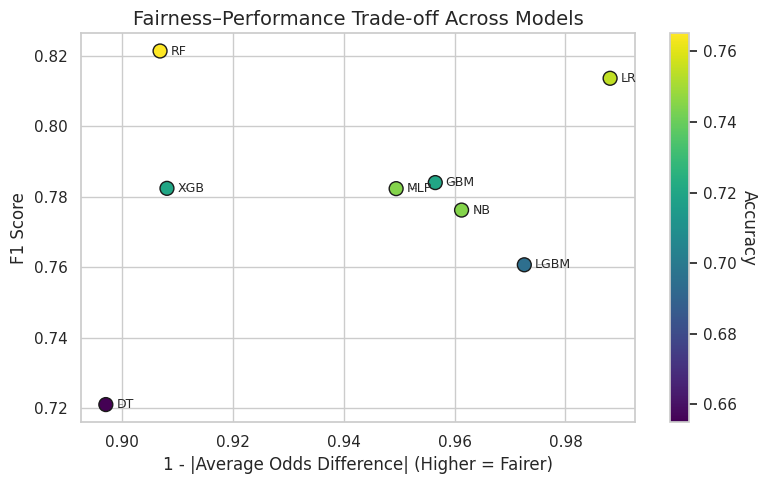

Balanced Best Model: LR
Model parameters:
{'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 2000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 57, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler 

epoch 0; iter: 0; batch classifier loss: 0.662753; batch adversarial loss: 0.753907
epoch 1; iter: 0; batch classifier loss: 0.595943; batch adversarial loss: 0.702200
epoch 2; iter: 0; batch classifier loss: 0.634948; batch adversarial loss: 0.702173
epoch 3; iter: 0; batch classifier loss: 0.498916; batch adversarial loss: 0.727257
epoch 4; iter: 0; batch classifier loss: 0.630089; batch adversarial loss: 0.706210
epoch 5; iter: 0; batch classifier loss: 0.472107; batch adversarial loss: 0.719894
epoch 6; iter: 0; batch classifier loss: 0.558447; batch adversarial loss: 0.702080
epoch 7; iter: 0; batch classifier loss: 0.488436; batch adversarial loss: 0.656348
epoch 8; iter: 0; batch classifier loss: 0.417171; batch adversarial loss: 0.685112
epoch 9; iter: 0; batch classifier loss: 0.415925; batch adversarial loss: 0.675390
epoch 0; iter: 0; batch classifier loss: 0.662753; batch adversarial loss: 0.753907
epoch 1; iter: 0; batch classifier loss: 0.595943; batch adversarial loss: 0

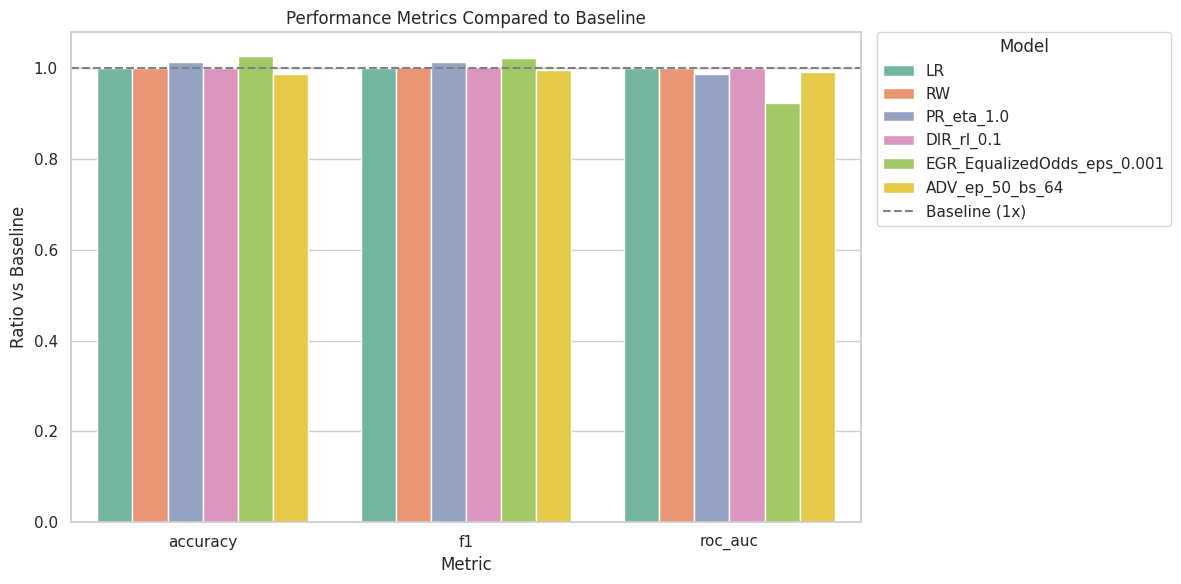

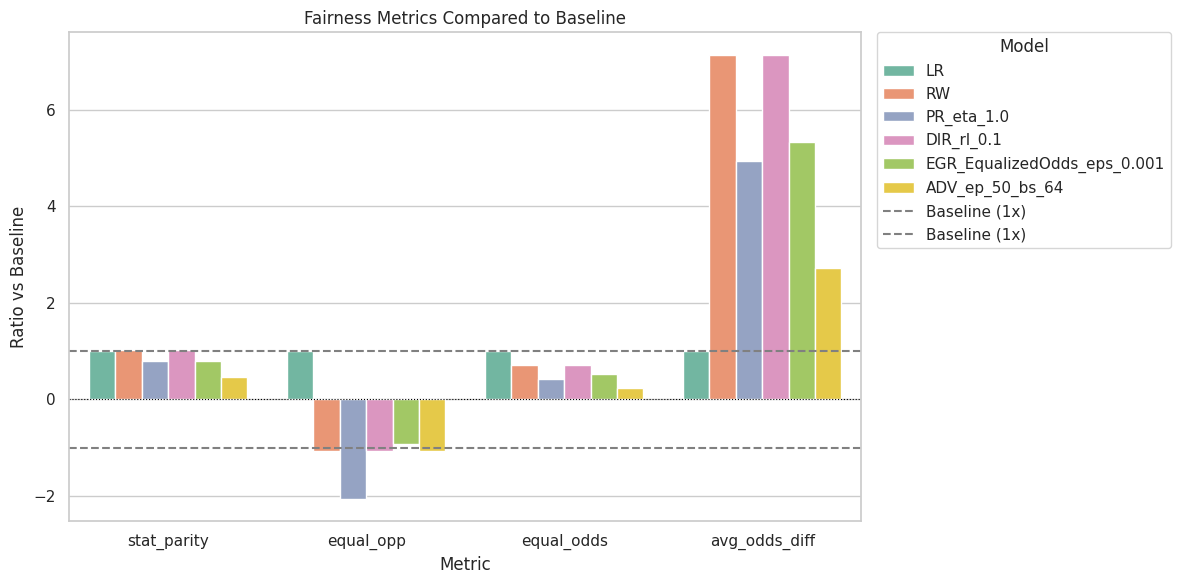

/tmp/ipython-input-2097818403.py:84: RuntimeWarning: invalid value encountered in scalar divide
  n_fav
/tmp/ipython-input-2097818403.py:89: RuntimeWarning: invalid value encountered in scalar divide
  n_unfav
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


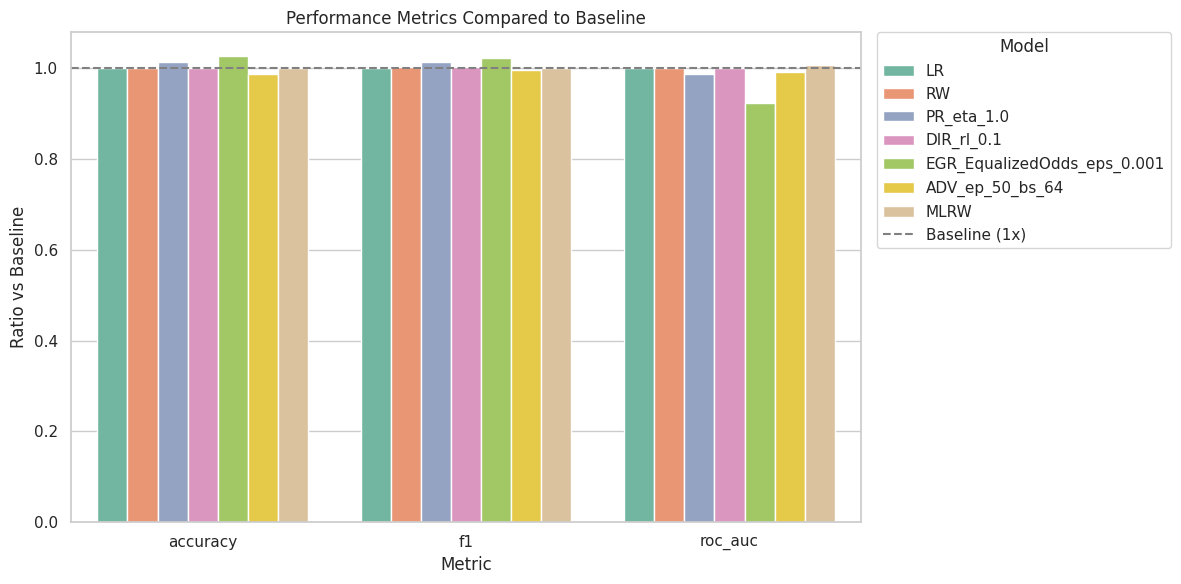

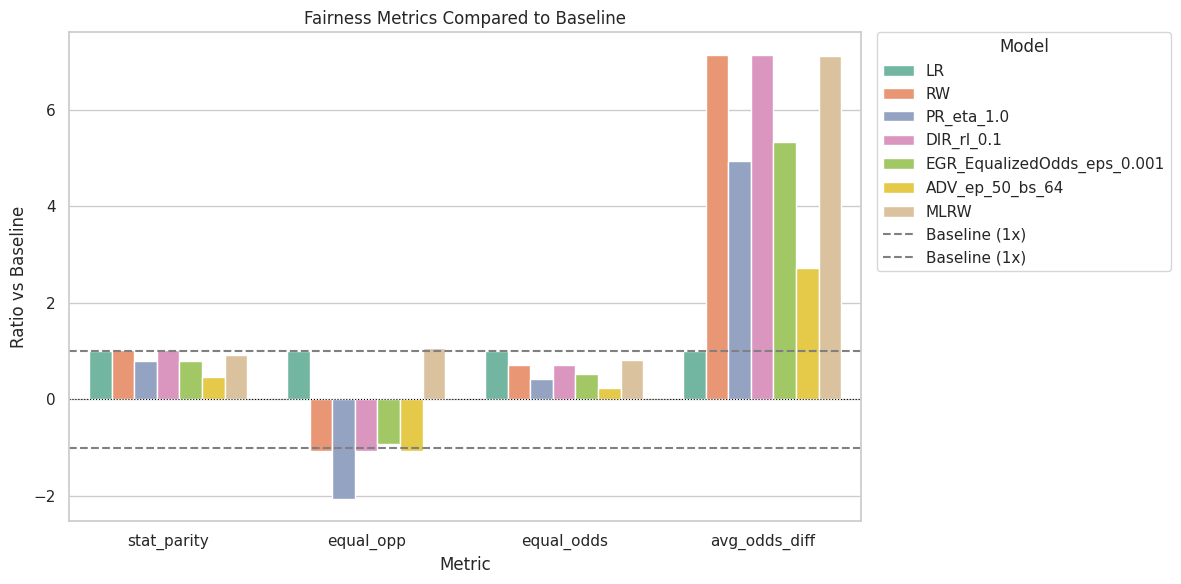

In [ ]:
boundary_results_dict, boundary_result_df = train_evaluate_plot(models, param_grid, X_train_flipped, y_train_flipped, X_test_flipped, y_test_flipped, target, sensitive_feature)

# --- Step 4: Plot Pareto Front ---
pareto_plot(boundary_result_df)

# --- Step 5: Select Best Model by Composite Score ---
best_name_boundary = max(boundary_results_dict, key=lambda x: composite_score(boundary_results_dict[x]))
best_model_boundary = boundary_results_dict[best_name_boundary]['best_model']
print(f"Balanced Best Model: {best_name_boundary}")

# Check if it's a pipeline
if isinstance(best_model_boundary, Pipeline):
    print("Model parameters:")
    print(best_model_boundary.named_steps['clf'].get_params())
else:
    print("Model parameters:")
    print(best_model_boundary.get_params())

# --- Step 6: Run Fairness Mitigation Methods ---
tf.compat.v1.reset_default_graph()
sess = tf.compat.v1.Session()
combined_results = run_all_fairness_methods(best_name_boundary, boundary_data, X_train_flipped, y_train_flipped, X_test_flipped, y_test_flipped, target, sensitive_feature, boundary_result_df, boundary_results_dict)

# --- Step 7: Visualise Comparison ---
combined_results.style.apply(highlight_max, subset=['accuracy', 'f1', 'roc_auc']).apply(highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff'])
plot_comparison(combined_results)

# --- Step 8: Apply MultiLevel Reweighing ---
mlrw_results = mlrw(best_name_boundary, boundary_data, X_train_flipped, y_train_flipped, X_test_flipped, y_test_flipped, boundary_results_dict)

# --- Step 9: Visualise Comparison with MRLW ---
combined_final = pd.concat([combined_results, mlrw_results], axis=0)
combined_final.style.apply(highlight_max, subset=['accuracy', 'f1', 'roc_auc']).apply(highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff'])
plot_comparison(combined_final)


In [ ]:
# Export the results DataFrame to a CSV file
combined_final.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/Results/German/German_Sex_Boundary_Priv.csv')

In [ ]:
X_train_flippedUP, X_test_flippedUP, y_train_flippedUP, y_test_flippedUP = train_test_split(X_flipped_UP, y_flipped_UP, test_size=0.2, random_state=random_seed, stratify=y_flipped_UP)

In [ ]:
boundary_data_UP = pd.concat([X_train_flippedUP, y_train_flippedUP], axis=1)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:34:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 584, number of negative: 216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.730000 -> initscore=0.994623
[LightGBM] [Info] Start training from score 0.994623
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

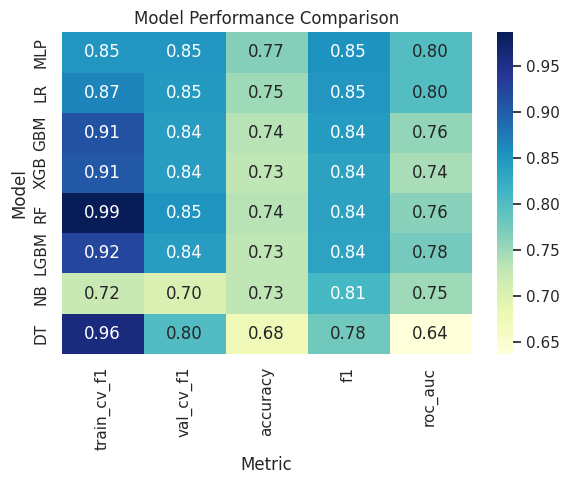

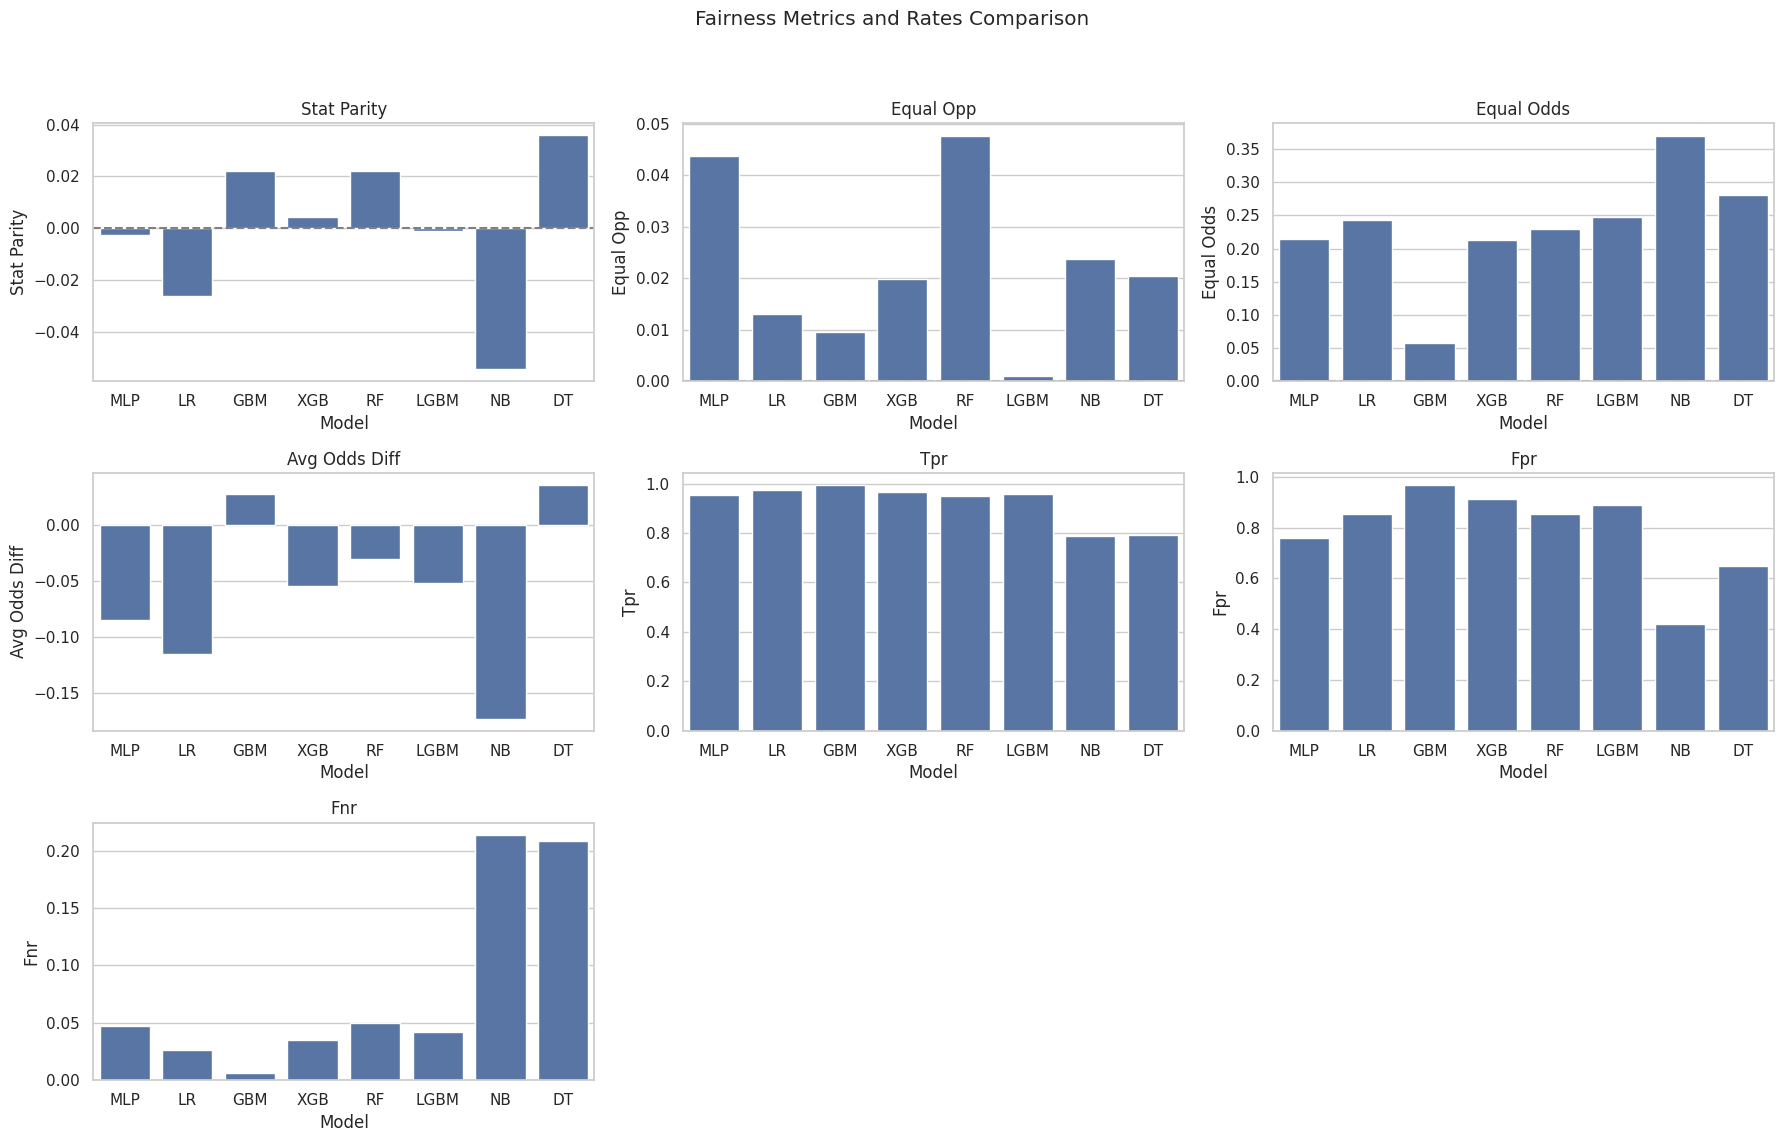

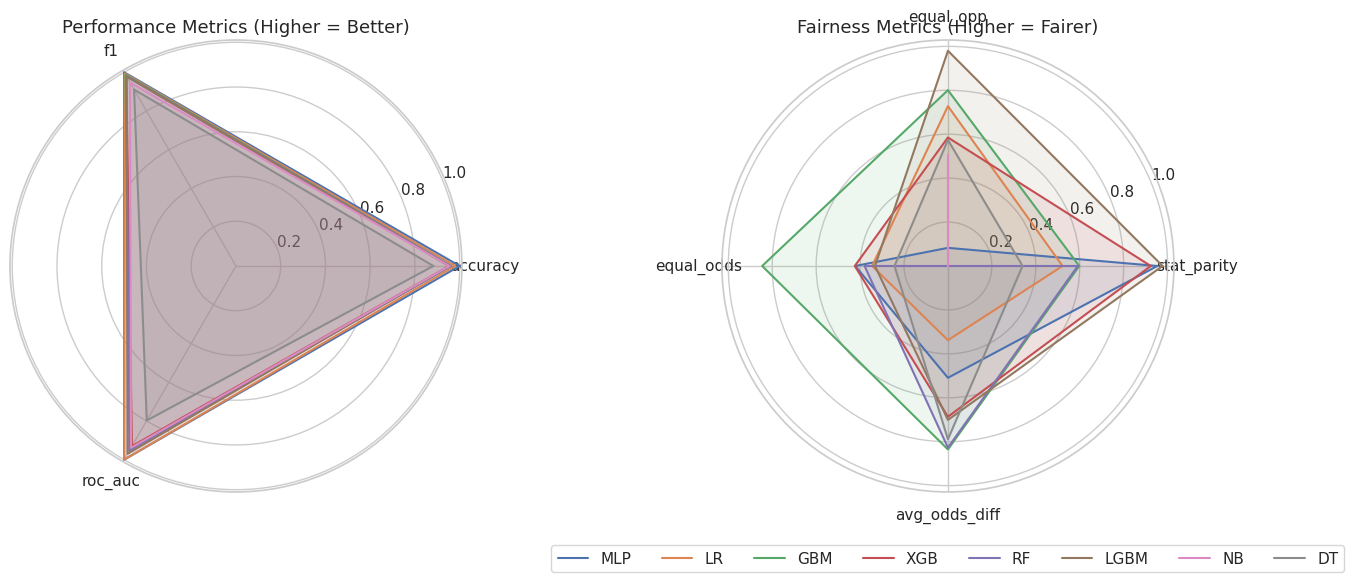

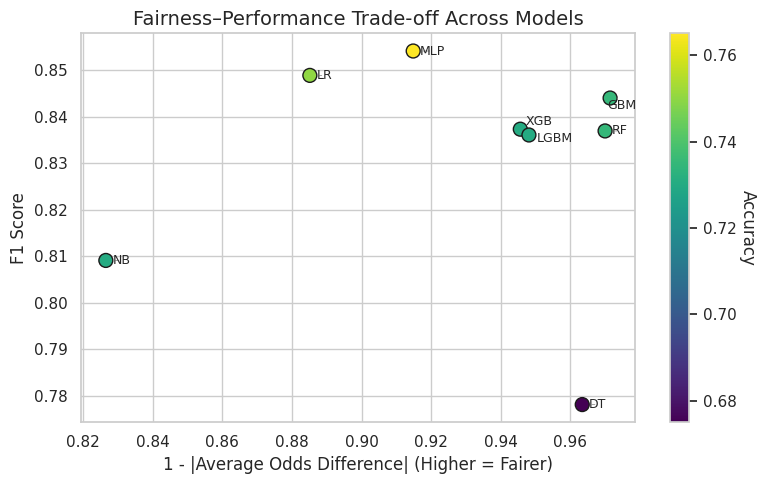

Balanced Best Model: GBM
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 57, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler 

epoch 0; iter: 0; batch classifier loss: 0.648731; batch adversarial loss: 0.726553
epoch 1; iter: 0; batch classifier loss: 0.582932; batch adversarial loss: 0.741067
epoch 2; iter: 0; batch classifier loss: 0.662663; batch adversarial loss: 0.720021
epoch 3; iter: 0; batch classifier loss: 0.426914; batch adversarial loss: 0.730558
epoch 4; iter: 0; batch classifier loss: 0.521875; batch adversarial loss: 0.715537
epoch 5; iter: 0; batch classifier loss: 0.540382; batch adversarial loss: 0.711532
epoch 6; iter: 0; batch classifier loss: 0.431457; batch adversarial loss: 0.689728
epoch 7; iter: 0; batch classifier loss: 0.622993; batch adversarial loss: 0.687800
epoch 8; iter: 0; batch classifier loss: 0.391837; batch adversarial loss: 0.681284
epoch 9; iter: 0; batch classifier loss: 0.449082; batch adversarial loss: 0.680196
epoch 0; iter: 0; batch classifier loss: 0.648731; batch adversarial loss: 0.726553
epoch 1; iter: 0; batch classifier loss: 0.582932; batch adversarial loss: 0

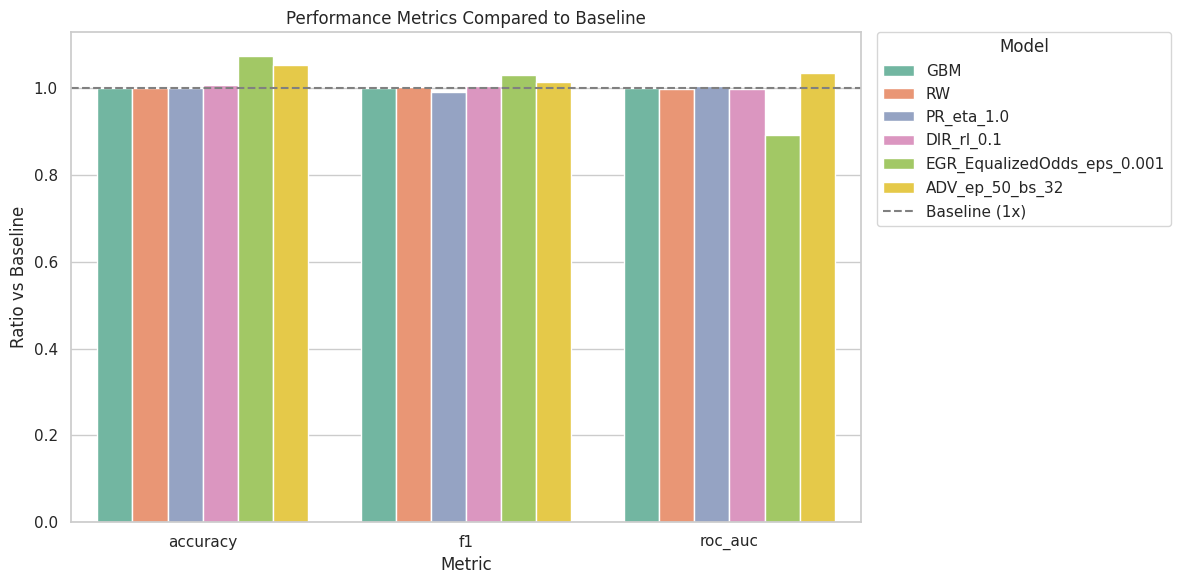

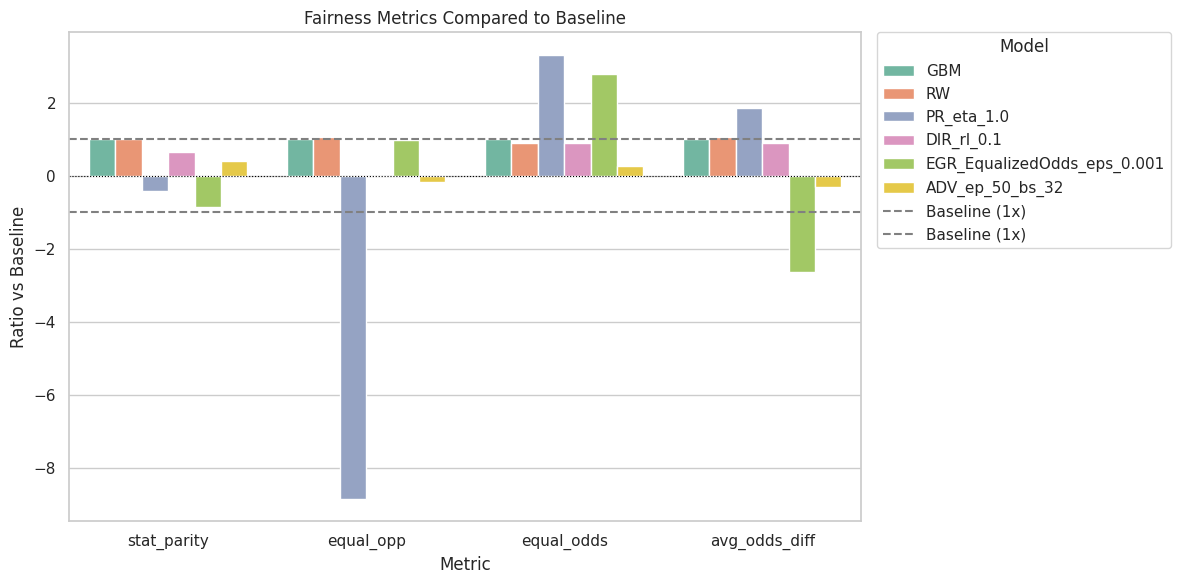

/tmp/ipython-input-2097818403.py:84: RuntimeWarning: invalid value encountered in scalar divide
  n_fav
/tmp/ipython-input-2097818403.py:89: RuntimeWarning: invalid value encountered in scalar divide
  n_unfav
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


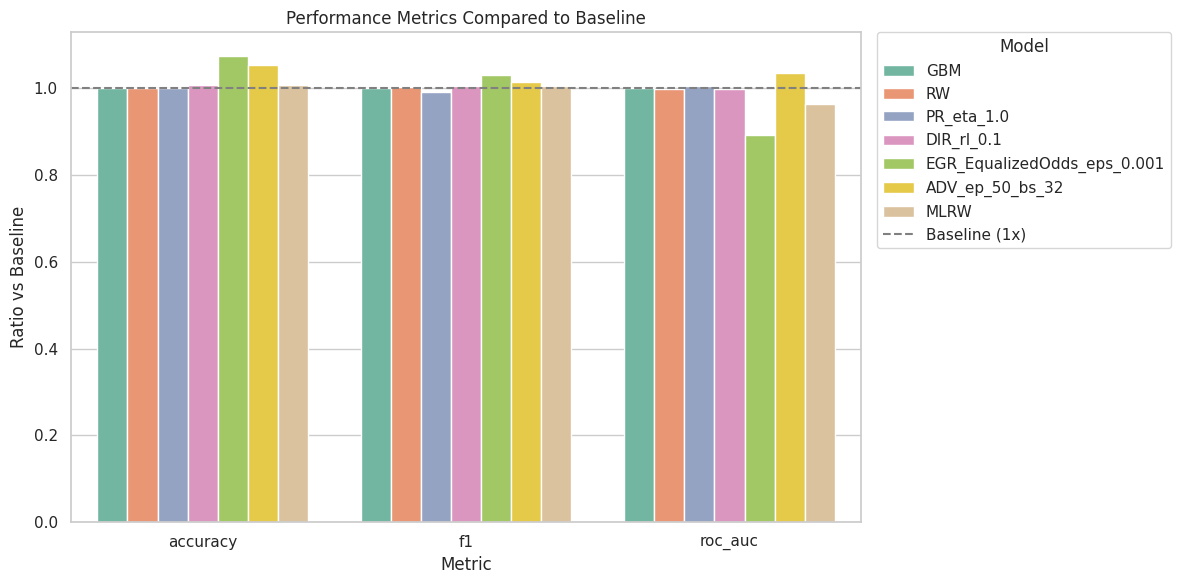

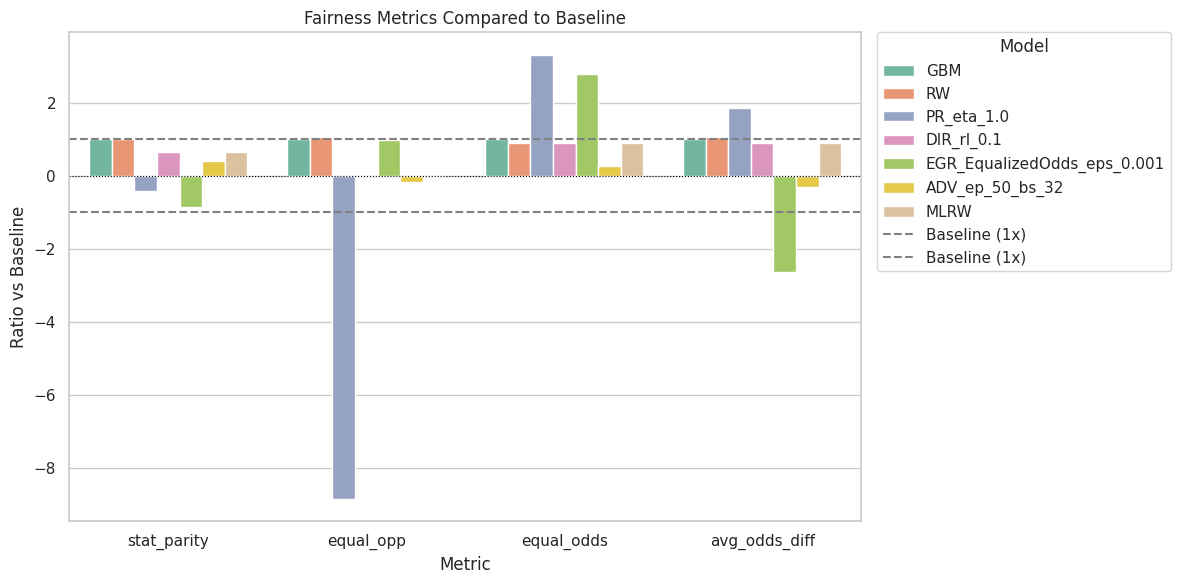

In [ ]:
boundaryUP_results_dict, boundaryUP_result_df = train_evaluate_plot(models, param_grid, X_train_flippedUP, y_train_flippedUP, X_test_flippedUP, y_test_flippedUP, target, sensitive_feature)

# --- Step 4: Plot Pareto Front ---
pareto_plot(boundaryUP_result_df)

# --- Step 5: Select Best Model by Composite Score ---
best_name_boundary = max(boundaryUP_results_dict, key=lambda x: composite_score(boundaryUP_results_dict[x]))
best_model_boundary = boundaryUP_results_dict[best_name_boundary]['best_model']
print(f"Balanced Best Model: {best_name_boundary}")

# Check if it's a pipeline
if isinstance(best_model_boundary, Pipeline):
    print("Model parameters:")
    print(best_model_boundary.named_steps['clf'].get_params())
else:
    print("Model parameters:")
    print(best_model_boundary.get_params())

# --- Step 6: Run Fairness Mitigation Methods ---
tf.compat.v1.reset_default_graph()
sess = tf.compat.v1.Session()
combined_results = run_all_fairness_methods(best_name_boundary, boundary_data_UP, X_train_flippedUP, y_train_flippedUP, X_test_flippedUP, y_test_flippedUP, target, sensitive_feature, boundaryUP_result_df, boundaryUP_results_dict)

# --- Step 7: Visualise Comparison ---
combined_results.style.apply(highlight_max, subset=['accuracy', 'f1', 'roc_auc']).apply(highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff'])
plot_comparison(combined_results)

# --- Step 8: Apply MultiLevel Reweighing ---
mlrw_results = mlrw(best_name_boundary, boundary_data_UP, X_train_flippedUP, y_train_flippedUP, X_test_flippedUP, y_test_flippedUP, boundaryUP_results_dict)

# --- Step 9: Visualise Comparison with MRLW ---
combined_final = pd.concat([combined_results, mlrw_results], axis=0)
combined_final.style.apply(highlight_max, subset=['accuracy', 'f1', 'roc_auc']).apply(highlight_min_abs, subset=['stat_parity', 'equal_opp', 'equal_odds', 'avg_odds_diff'])
plot_comparison(combined_final)


In [ ]:
# Export the results DataFrame to a CSV file
combined_final.to_csv('/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/FinalProj_Main/Results/German/German_Sex_Boundary_UnderPriv.csv')

#### Final Runs for all biased_df (fixed model)

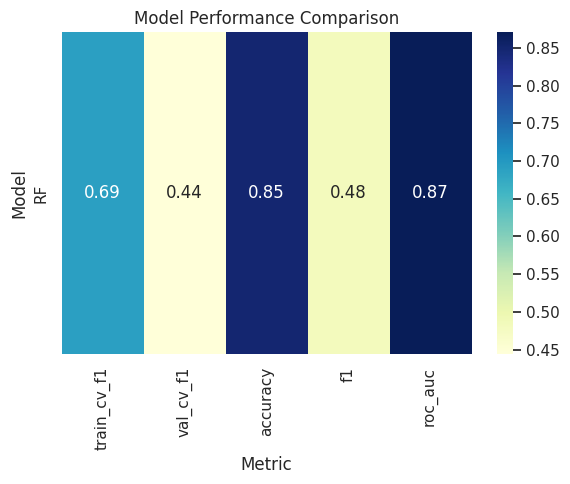

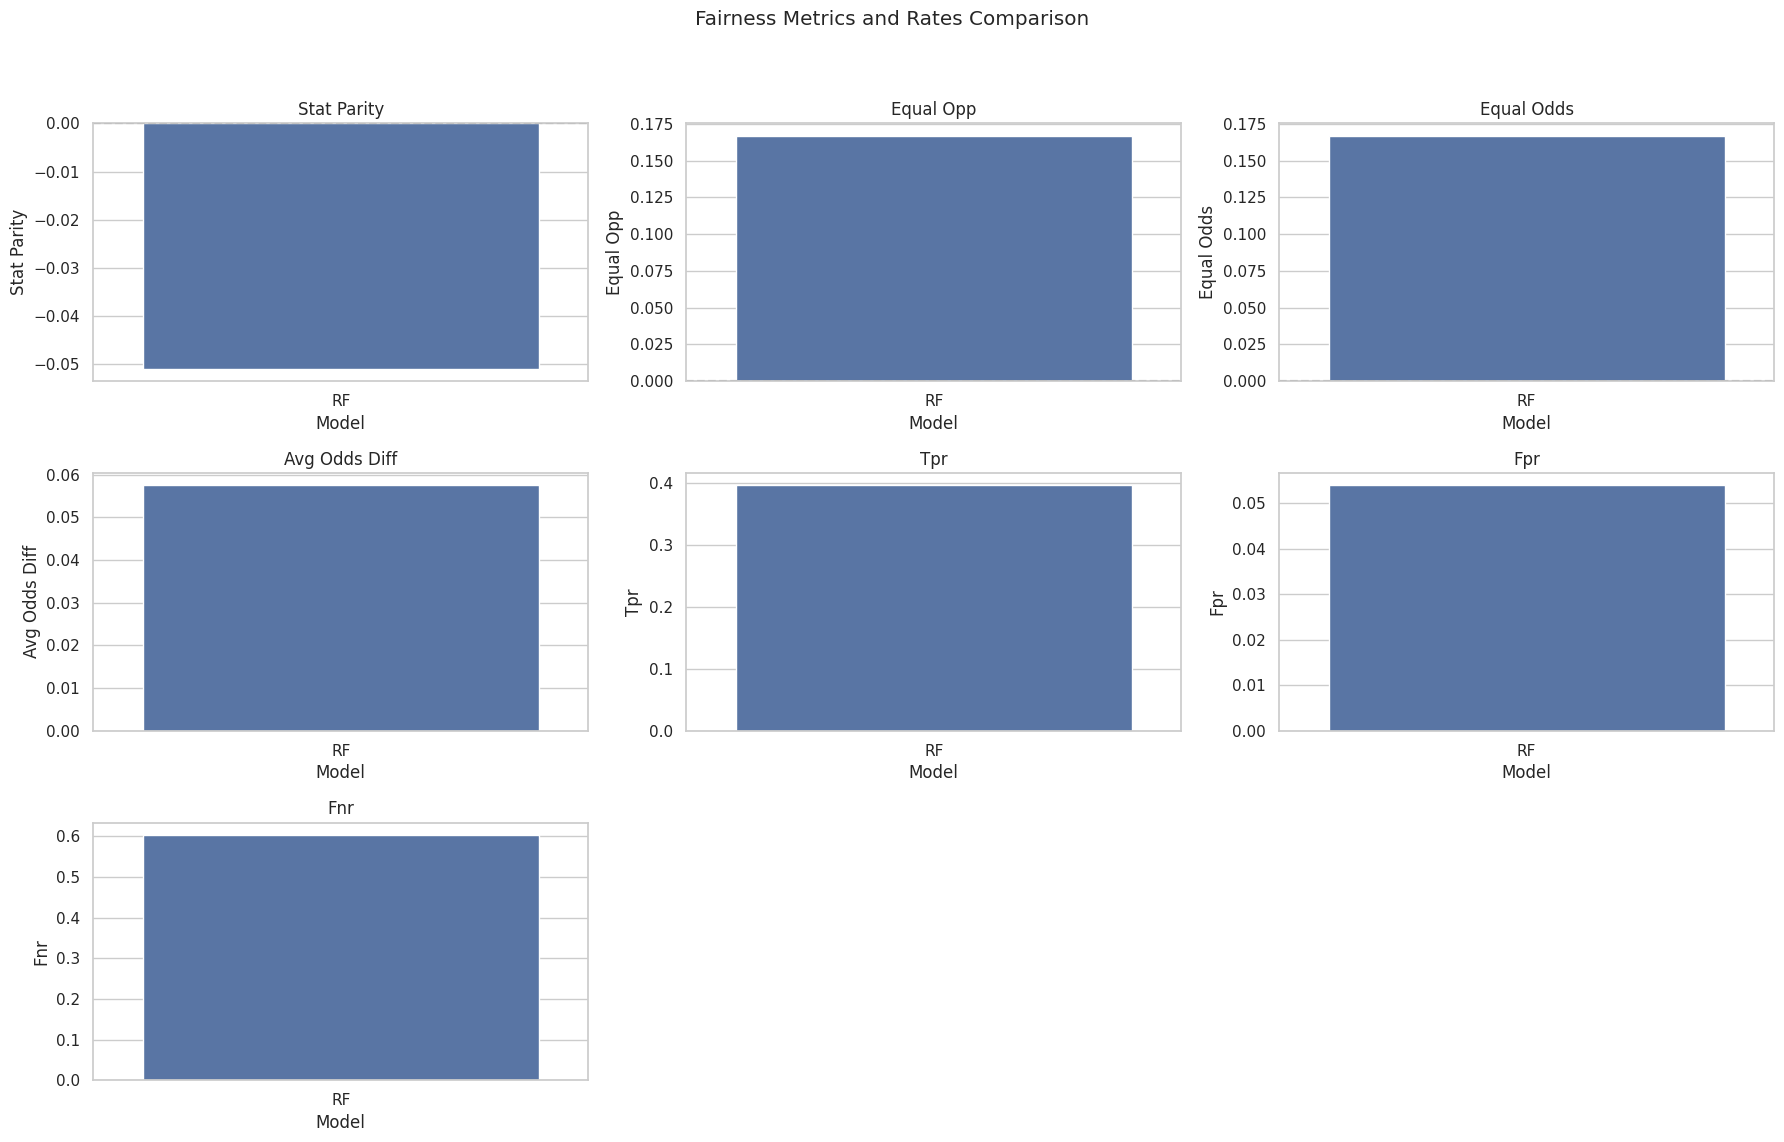

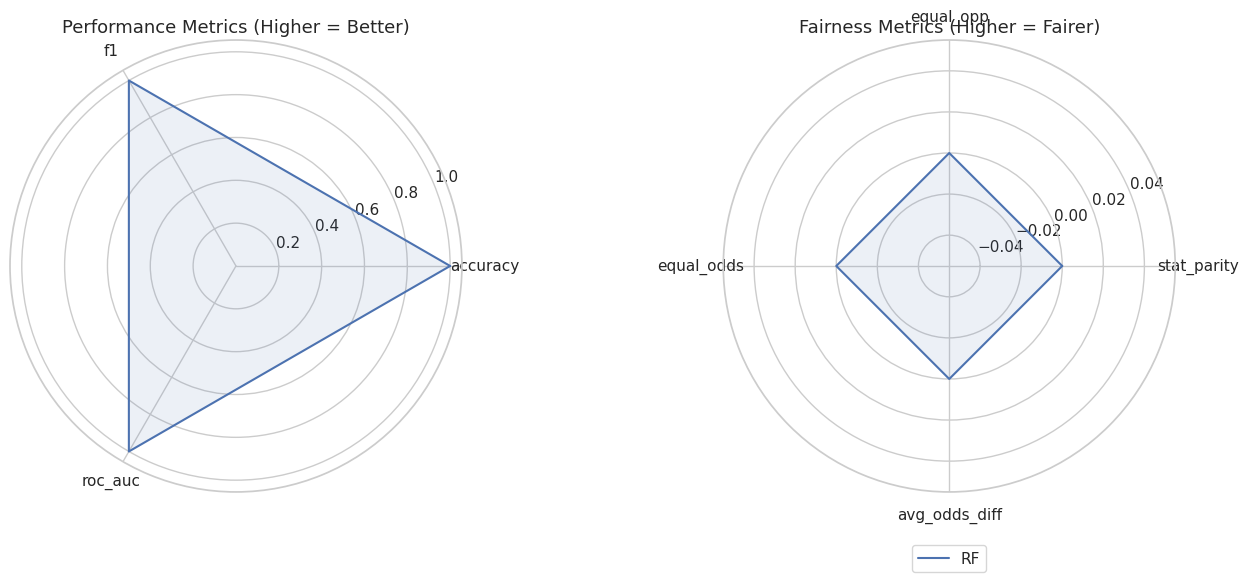

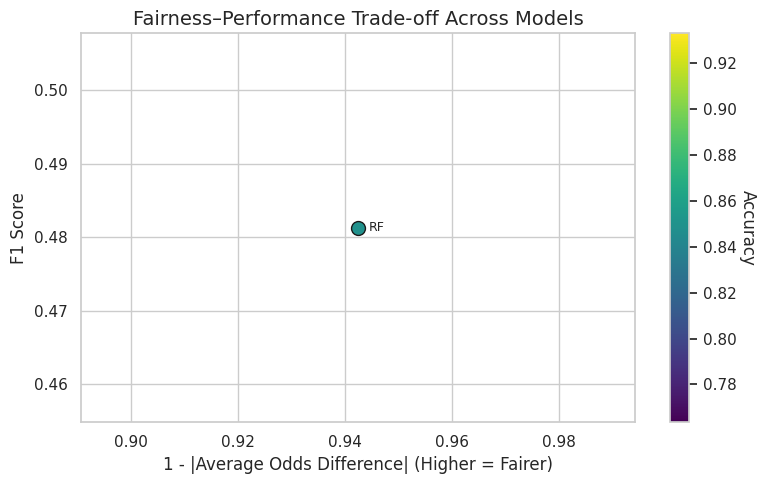

Balanced Best Model: RF
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
epoch 0; iter: 0; batch classifier loss: 0.600666; batch adversarial loss: 0.785037
epoch 0; iter: 200; batch classifier loss: 1.106978; batch adversarial loss: 0.983481
epoch 1; iter: 0; batch classifier loss: 1.206052; batch adversarial loss: 0.883285
epoch 1; iter: 200; batch classifier loss: 1.094018; batch adversarial loss: 0.721722
epoch 2; iter: 0; batch classifier loss: 0.849460; batch adversarial loss: 0.663978
epoch 2; iter: 200; batch classifier loss: 0.427196; batch adversarial loss: 0.648298
epoch 3; iter: 0; batch classifier

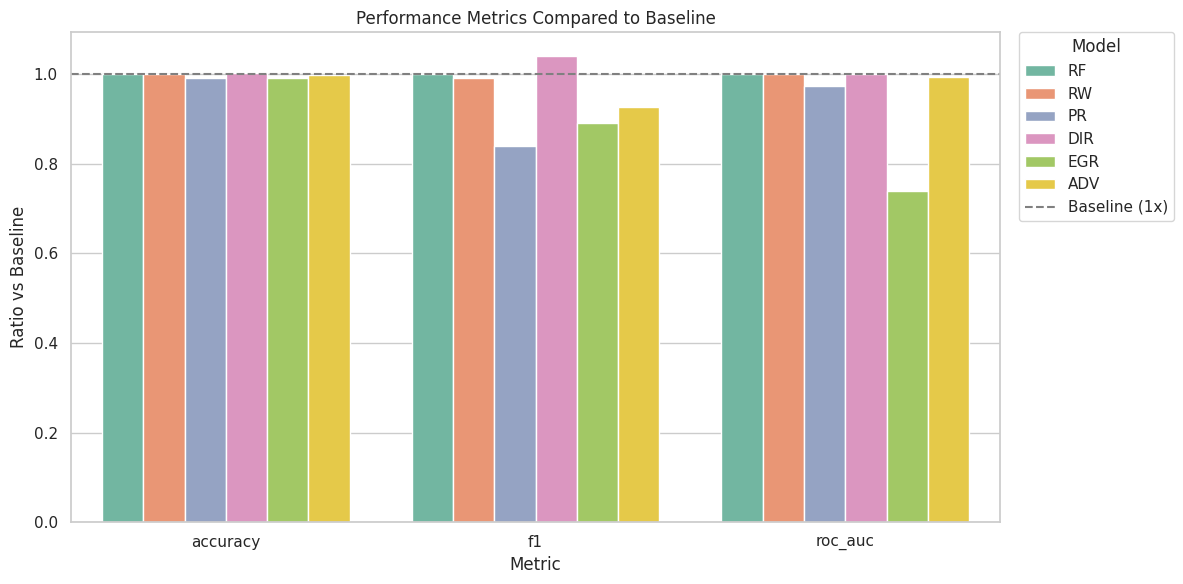

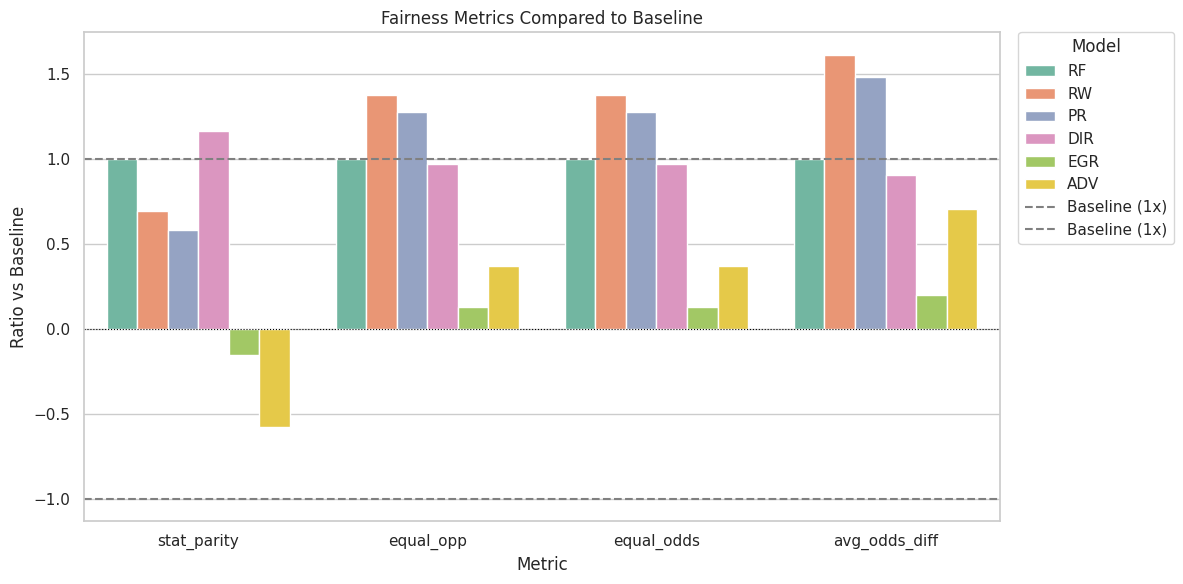

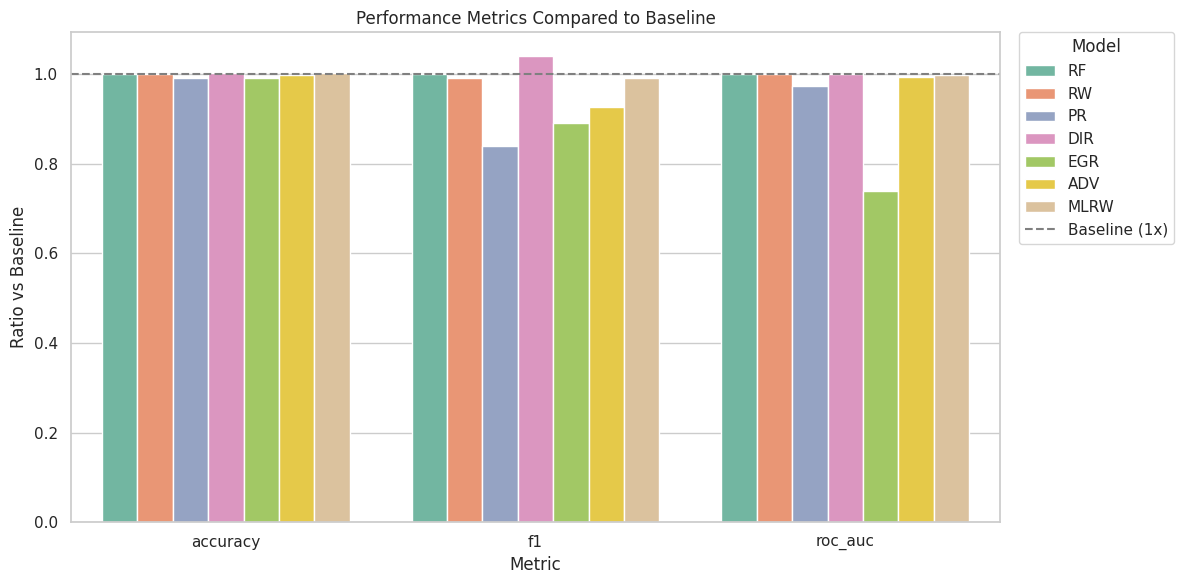

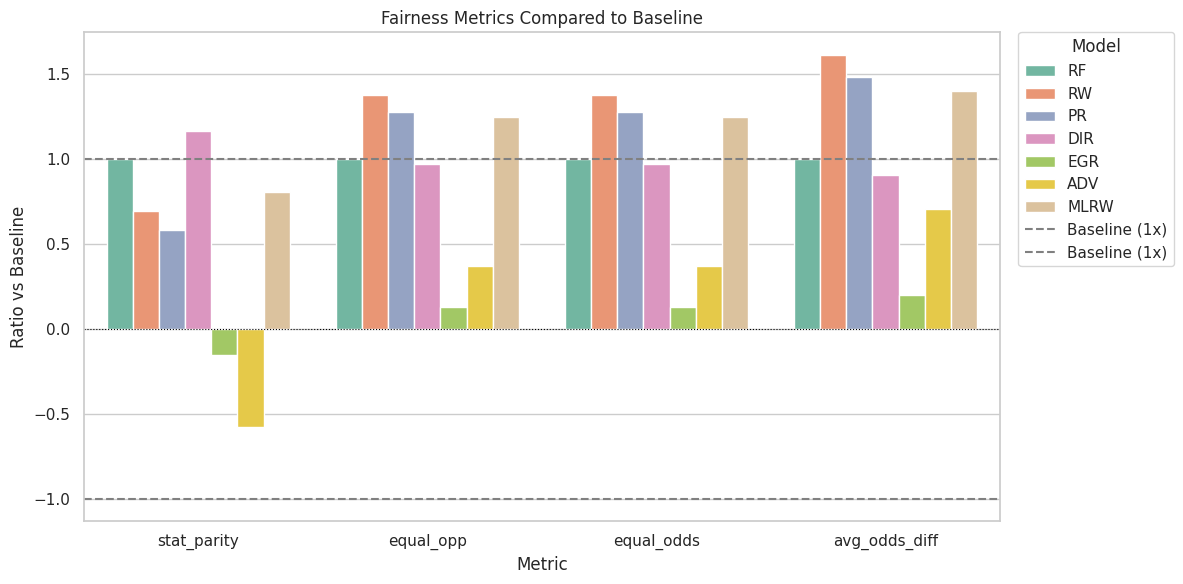

In [ ]:
combined_results2_df_flip, combined_results2_df_flip_mrlw = run_fair_ml_pipeline_fixedmodel(
    data=biased_df_flip,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_results2_df_flip_2, combined_results2_df_flip_2_mrlw = run_fair_ml_pipeline_fixedmodel(
    data=biased_df_flip_2,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_results2_df_flip_3, combined_results2_df_flip_3_mrlw = run_fair_ml_pipeline_fixedmodel(
    data=biased_df_flip_3,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_results2_df_flip_4, combined_results2_df_flip_4_mrlw = run_fair_ml_pipeline_fixedmodel(
    data=biased_df_flip_4,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
combined_results2_genalgo, combined_results2_genalgo_mrlw = run_fair_ml_pipeline_fixedmodel(
    data=df_unfair,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

##  PART 2: SENSITIVE FEATURE IDENTIFICATION

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf.fit(X_train, y_train)
perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=random_seed)

importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': perm.importances_mean})
importance_df = importance_df.sort_values('importance', ascending=False)

sensitive_feature = importance_df.iloc[0]['feature']  # Most sensitive feature
print(f"Most sensitive feature: {sensitive_feature}")

Most sensitive feature: status_A14


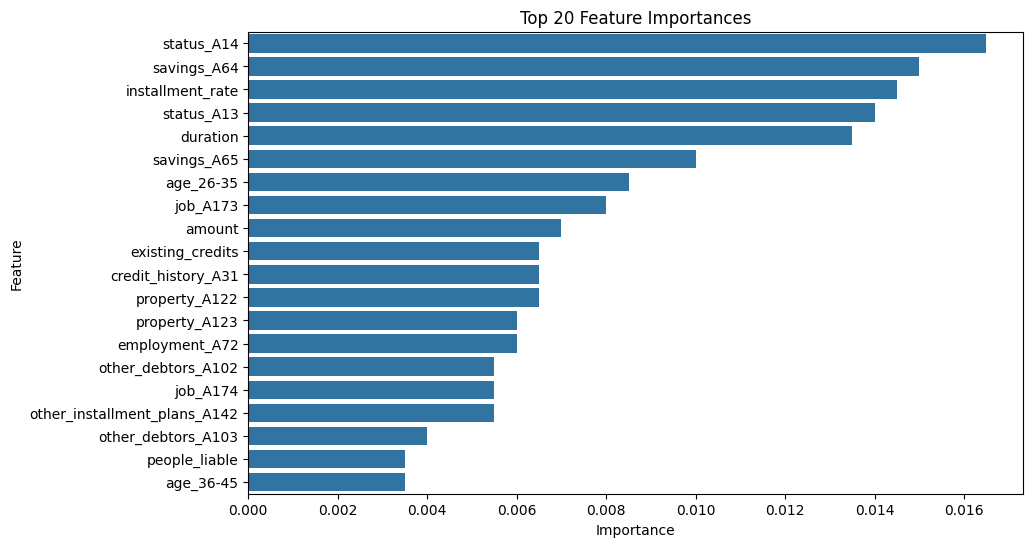

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###Fair Feature importance

Added a compute_fair_feature_importance function (inspired by FairSHAP). It uses permutation-based perturbation to estimate how each feature contributes to fairness metrics (like statistical parity or equal opportunity).

In [ ]:
def compute_fair_feature_importance(model, X_test, y_test, sensitive_feature, target, fairness_metric='stat_parity'):
    base_pred = model.predict(X_test)
    base_pred = np.array(base_pred).astype(int)
    val_df = X_test.copy()
    val_df[target] = y_test.astype(int)
    base_pred_df = X_test.copy()
    base_pred_df[target] = base_pred.astype(int)

    base_true = BinaryLabelDataset(df=val_df, label_names=[target], protected_attribute_names=[sensitive_feature])
    base_pred_ds = BinaryLabelDataset(df=base_pred_df, label_names=[target], protected_attribute_names=[sensitive_feature])
    base_metric = ClassificationMetric(base_true, base_pred_ds,
        privileged_groups=[{sensitive_feature: 1}], unprivileged_groups=[{sensitive_feature: 0}])

    base_score = {
        'stat_parity': base_metric.statistical_parity_difference(),
        'equal_opp': base_metric.equal_opportunity_difference(),
        'equal_odds': base_metric.equalized_odds_difference()
    }[fairness_metric]

    feature_importance = []
    for feature in X_test.columns:
        X_temp = X_test.copy()
        X_temp[feature] = np.random.permutation(X_temp[feature].values)

        y_pred_temp = model.predict(X_temp)
        y_pred_temp = np.array(y_pred_temp).astype(int)
        temp_df = X_test.copy()
        temp_df[target] = y_pred_temp

        temp_pred_ds = BinaryLabelDataset(df=temp_df, label_names=[target], protected_attribute_names=[sensitive_feature])
        temp_metric = ClassificationMetric(base_true, temp_pred_ds,
            privileged_groups=[{sensitive_feature: 1}], unprivileged_groups=[{sensitive_feature: 0}])

        temp_score = {
            'stat_parity': temp_metric.statistical_parity_difference(),
            'equal_opp': temp_metric.equal_opportunity_difference(),
            'equal_odds': temp_metric.equalized_odds_difference()
        }[fairness_metric]

        importance_score = abs(temp_score - base_score)
        feature_importance.append({
            'feature': feature,
            'fairness_importance': importance_score
        })

        print(f"{feature}: base_score={base_score:.4f}, temp_score={temp_score:.4f}")

    # Return sorted DataFrame
    importance_df = pd.DataFrame(feature_importance).sort_values(by='fairness_importance', ascending=False).reset_index(drop=True)

    return importance_df

In [ ]:
fair_importance = compute_fair_feature_importance(rf, X_test, y_test, sensitive_feature, target)
print(fair_importance.head())

duration: base_score=-0.2533, temp_score=-0.2667
amount: base_score=-0.2533, temp_score=-0.2320
installment_rate: base_score=-0.2533, temp_score=-0.2560
residence_since: base_score=-0.2533, temp_score=-0.2507
existing_credits: base_score=-0.2533, temp_score=-0.2827
people_liable: base_score=-0.2533, temp_score=-0.2613
sex: base_score=-0.2533, temp_score=-0.2213
marital_status: base_score=-0.2533, temp_score=-0.2320
status_A12: base_score=-0.2533, temp_score=-0.2427
status_A13: base_score=-0.2533, temp_score=-0.2693
status_A14: base_score=-0.2533, temp_score=-0.1387
credit_history_A31: base_score=-0.2533, temp_score=-0.2453
credit_history_A32: base_score=-0.2533, temp_score=-0.2160
credit_history_A33: base_score=-0.2533, temp_score=-0.2533
credit_history_A34: base_score=-0.2533, temp_score=-0.2213
purpose_A41: base_score=-0.2533, temp_score=-0.2373
purpose_A410: base_score=-0.2533, temp_score=-0.2533
purpose_A42: base_score=-0.2533, temp_score=-0.2453
purpose_A43: base_score=-0.2533, te

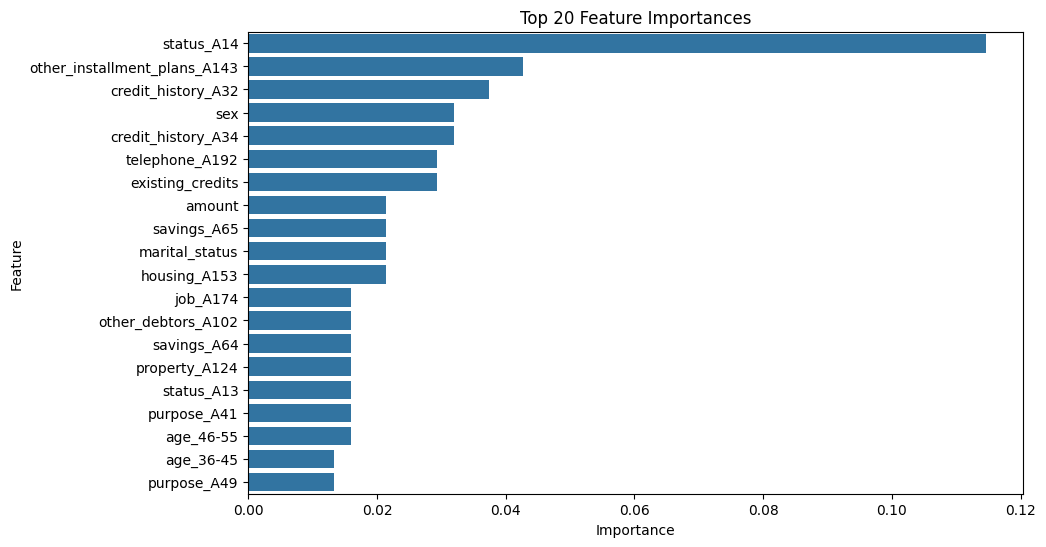

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='fairness_importance', y='feature', data=fair_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## FairFIS

In [ ]:
!git clone https://github.com/DebolinaHalder/FairTreeFIS.git
!cd FairTreeFIS
!python3 setup.py install

fatal: destination path 'FairTreeFIS' already exists and is not an empty directory.
python3: can't open file '//setup.py': [Errno 2] No such file or directory


In [ ]:
!git clone https://github.com/DebolinaHalder/FairTreeFIS.git #Clone the repo
%cd FairTreeFIS #Navigate into directory.
!pip install . #Install the package to your environment
%cd ..

fatal: destination path 'FairTreeFIS' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'FairTreeFIS #Navigate into directory.'
/content
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
/


In [ ]:
from fairTreeFIS import FairTreeFIS

ModuleNotFoundError: No module named 'fairTreeFIS'

In [ ]:
sensitive_index = list(X.columns).index('sex') if isinstance(X, pd.DataFrame) else 9

fair_fis = FairTreeFIS(model=clf, X=X_test, y=y_test, sensitive_feature_index=sensitive_index)

fairfis_scores = fair_fis.compute_fair_fis()

In [ ]:
# Convert scores to sorted list
scores_sorted = sorted(fairfis_scores.items(), key=lambda x: abs(x[1]), reverse=True)

for feature_idx, score in scores_sorted:
    print(f"Feature {feature_idx}: FairFIS Score = {score:.4f}")

In [ ]:
def compute_fairfis_scores(model, X_test_array, y_test_array, sensitive_feature_index):
    fair_fis = FairTreeFIS(
        model=model,
        X=X_test_array,
        y=y_test_array,
        sensitive_feature_index=sensitive_feature_index
    )
    return fair_fis.compute_fair_fis()

FairFIS_model = DecisionTreeClassifier(max_depth=5, random_state=42)
FairFIS_model.fit(X_train, y_train)

# Convert to arrays if using DataFrames
X_test_array = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
sensitive_idx = X.columns.get_loc('sex') if 'sex' in X.columns else 0

fairfis_scores = compute_fairfis_scores(FairFIS_model, X_test_array, y_test.values, sensitive_idx)

# Display FairFIS scores sorted
sorted_scores = sorted(fairfis_scores.items(), key=lambda x: abs(x[1]), reverse=True)
for idx, score in sorted_scores:
    feature_name = X.columns[idx] if isinstance(X, pd.DataFrame) else f"Feature {idx}"
    print(f"{feature_name}: FairFIS Score = {score:.4f}")

NameError: name 'FairTreeFIS' is not defined

## Identifying Most Sensitive Features

In [ ]:
protected_candidates = ['sex', 'race']

for attr in protected_candidates:
    # Recover protected attribute from original X
    X_test_tmp = X_test.copy()
    X_test_tmp[attr] = X.loc[X_test.index, attr].values

    # Ensure predictions align with test set index
    y_pred_series = pd.Series(y_pred, index=X_test.index, name='income')

    # Construct true and predicted dataframes
    true_df = pd.concat([X_test_tmp, y_test], axis=1)
    pred_df = pd.concat([X_test_tmp, y_pred_series], axis=1)

    # Create AIF360 datasets
    true_dataset = BinaryLabelDataset(
        favorable_label=1,
        unfavorable_label=0,
        df=true_df,
        label_names=['income'],
        protected_attribute_names=[attr]
    )

    pred_dataset = BinaryLabelDataset(
        favorable_label=1,
        unfavorable_label=0,
        df=pred_df,
        label_names=['income'],
        protected_attribute_names=[attr]
    )

    # Fairness metric
    metric = ClassificationMetric(
        true_dataset, pred_dataset,
        unprivileged_groups=[{attr: 0}],
        privileged_groups=[{attr: 1}]
    )

    print(f"Fairness impact of {attr}:")
    print("  Statistical Parity:", round(metric.statistical_parity_difference(), 3))
    print("  Equal Opportunity:", round(metric.equal_opportunity_difference(), 3))
    print("  Disparate Impact:", round(metric.disparate_impact(), 3))
    print("-----")

Fairness impact of sex:
  Statistical Parity: -0.174
  Equal Opportunity: -0.058
  Disparate Impact: 0.331
-----


KeyError: 'race'

### Other Codes

In [ ]:
def apply_mlrw(train_df, label_column, protected_features_with_levels):
    """
    Apply MultiLevel Reweighing to training data.

    Args:
        train_df (pd.DataFrame): Input training DataFrame.
        label_column (str): Target label column name (e.g., 'income').
        protected_features_with_levels (list): List of dicts like:
            [{'feature_name': 'sex', 'privileged_value': 1, 'unprivileged_value': 0, 'level': 1}, ...]

    Returns:
        BinaryLabelDataset: AIF360 dataset with instance weights
    """
    multi_privileged_groups = [
        {'feature_name': d['feature_name'], 'privileged_value': d['privileged_value'], 'level': d['level']}
        for d in protected_features_with_levels
    ]
    multi_unprivileged_groups = [
        {'feature_name': d['feature_name'], 'unprivileged_value': d['unprivileged_value'], 'level': d['level']}
        for d in protected_features_with_levels
    ]

    dataset = BinaryLabelDataset(
        df=train_df.copy(),
        label_names=[label_column],
        protected_attribute_names=[d['feature_name'] for d in protected_features_with_levels]
    )

    mlrw = MultiLevelReweighing(multi_privileged_groups, multi_unprivileged_groups)
    mlrw.fit(dataset)
    dataset_mlrw = mlrw.transform(dataset)

    return dataset_mlrw

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:08:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6428, number of negative: 33572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160700 -> initscore=-1.653029
[LightGBM] [Info] Start training from score -1.653029


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


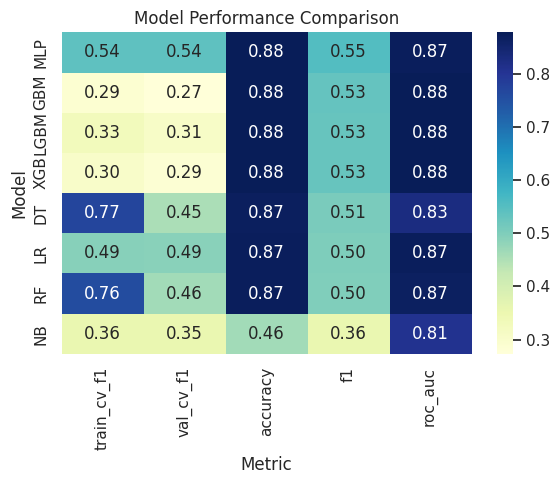

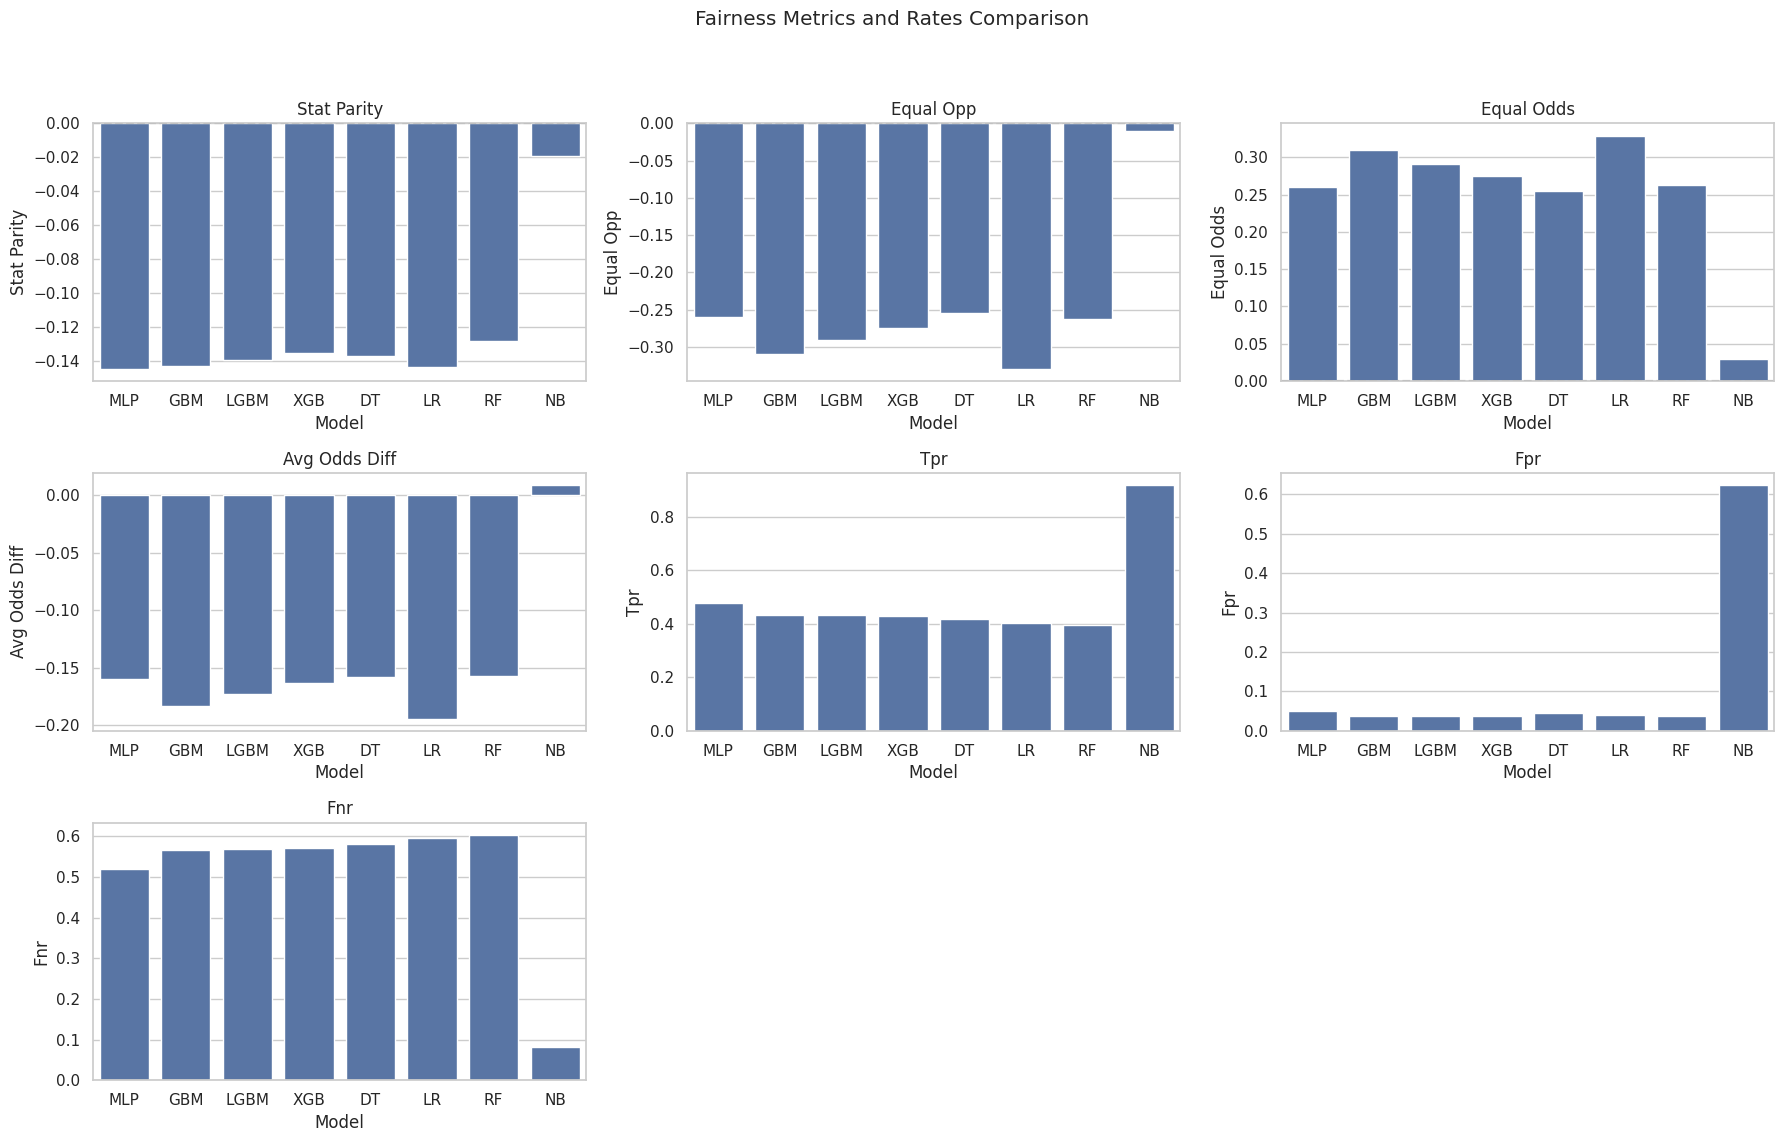

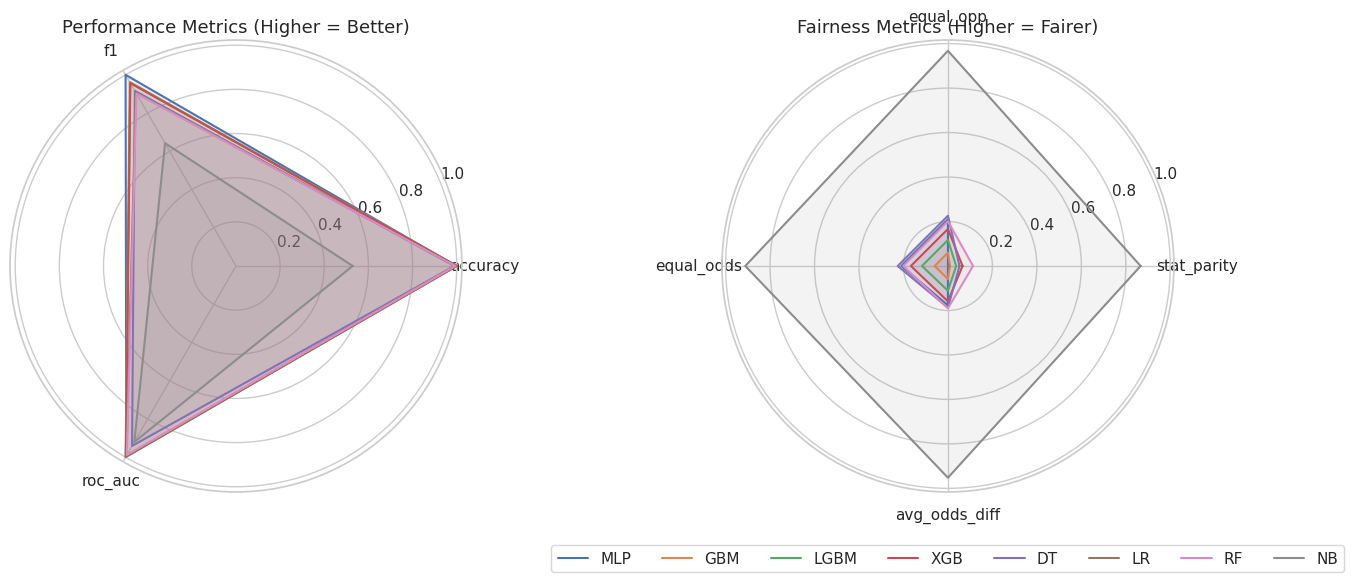

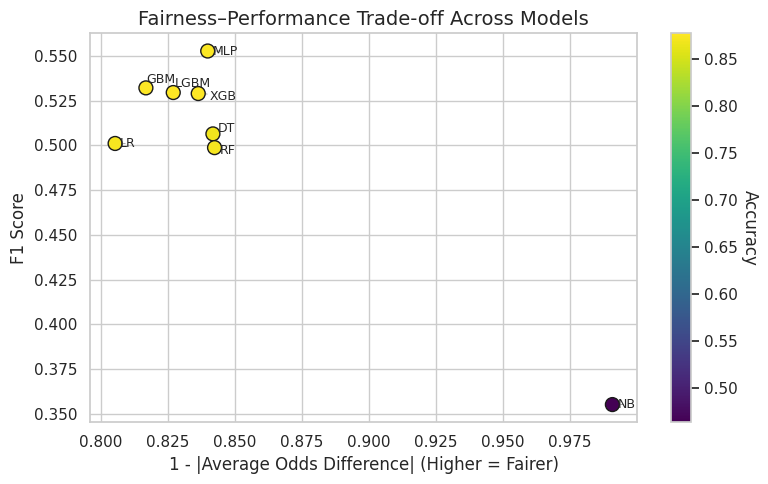

Balanced Best Model: NB
Model parameters: {'priors': None, 'var_smoothing': 1e-07}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/aif360/algorithms/inprocessing/celisMeta/FalseDiscovery.py:31: RuntimeWarning: invalid value encountered in divide
  prob_y_1 = (prob_1_1 + prob_1_0) / total
/usr/local/lib/python3.11/dist-packages/aif360/algorithms/inprocessing/celisMeta/FalseDiscovery.py:32:

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
combined_results_2010 = run_fair_ml_pipeline(
    data=Adult_2010,
    target=target,
    sensitive_feature=sensitive_feature,
    param_grid=param_grid
)

In [ ]:
def compare_datasets(df1, df2, name1="Dataset 1", name2="Dataset 2"):
    """
    Compares two pandas DataFrames and reports differences in columns, data types, and basic value counts.

    Args:
        df1 (pd.DataFrame): The first DataFrame.
        df2 (pd.DataFrame): The second DataFrame.
        name1 (str): Name for the first dataset in reports.
        name2 (str): Name for the second dataset in reports.
    """
    print(f"--- Comparing {name1} and {name2} ---")

    # 1. Column Comparison
    cols1 = set(df1.columns)
    cols2 = set(df2.columns)

    if cols1 == cols2:
        print("Columns are identical.")
    else:
        print("Column differences found:")
        if cols1 - cols2:
            print(f"  Columns in {name1} but not in {name2}: {cols1 - cols2}")
        if cols2 - cols1:
            print(f"  Columns in {name2} but not in {name1}: {cols2 - cols1}")

    # Find common columns for further comparison
    common_cols = list(cols1.intersection(cols2))

    # 2. Data Type Comparison (for common columns)
    print("\n--- Data Type Comparison (Common Columns) ---")
    dtype_diffs = {}
    for col in common_cols:
        if df1[col].dtype != df2[col].dtype:
            dtype_diffs[col] = (df1[col].dtype, df2[col].dtype)

    if dtype_diffs:
        print("Data type differences found:")
        for col, dtypes in dtype_diffs.items():
            print(f"  Column '{col}': {name1} is {dtypes[0]}, {name2} is {dtypes[1]}")
    else:
        print("Data types are consistent for common columns.")

    # 3. Shape Comparison
    print("\n--- Shape Comparison ---")
    print(f"{name1} shape: {df1.shape}")
    print(f"{name2} shape: {df2.shape}")
    if df1.shape != df2.shape:
        print("Shapes are different.")
    else:
        print("Shapes are identical.")


    # 4. Value Count Comparison (for a few common categorical columns)
    # Identify common categorical columns
    cat_cols1 = df1[common_cols].select_dtypes(include='object').columns
    cat_cols2 = df2[common_cols].select_dtypes(include='object').columns
    common_cat_cols = list(cat_cols1.intersection(cat_cols2))

    if common_cat_cols:
        print("\n--- Value Count Comparison (Top Categorical Columns) ---")
        # Limit to a few columns for readability
        sample_cat_cols = common_cat_cols[:5]
        for col in sample_cat_cols:
            print(f"\nColumn: '{col}'")
            print(f"-- {name1} Value Counts --")
            print(df1[col].value_counts(normalize=True).head()) # Show top 5 normalized counts
            print(f"\n-- {name2} Value Counts --")
            print(df2[col].value_counts(normalize=True).head()) # Show top 5 normalized counts

            # Check if value sets are identical
            if set(df1[col].unique()) != set(df2[col].unique()):
                print(f"  Warning: Unique values differ for '{col}'")
    else:
        print("\nNo common categorical columns to compare value counts.")

    # 5. Basic Statistics Comparison (for a few common numeric columns)
    num_cols1 = df1[common_cols].select_dtypes(include=np.number).columns
    num_cols2 = df2[common_cols].select_dtypes(include=np.number).columns
    common_num_cols = list(num_cols1.intersection(num_cols2))

    if common_num_cols:
        print("\n--- Basic Statistics Comparison (Top Numeric Columns) ---")
        # Limit to a few columns for readability
        sample_num_cols = common_num_cols[:5]
        for col in sample_num_cols:
             print(f"\nColumn: '{col}'")
             print(f"-- {name1} Description --")
             print(df1[col].describe().head())
             print(f"\n-- {name2} Description --")
             print(df2[col].describe().head())

    else:
        print("\nNo common numeric columns to compare statistics.")

compare_datasets(Adult_2010, data, name1="Adult_2010", name2="Original Adult Data (1994)")


--- Comparing Adult_2010 and Original Adult Data (1994) ---
Columns are identical.

--- Data Type Comparison (Common Columns) ---
Data type differences found:
  Column 'capital-gain': Adult_2010 is float64, Original Adult Data (1994) is int64
  Column 'fnlwgt': Adult_2010 is float64, Original Adult Data (1994) is int64
  Column 'capital-loss': Adult_2010 is float64, Original Adult Data (1994) is int64

--- Shape Comparison ---
Adult_2010 shape: (50000, 15)
Original Adult Data (1994) shape: (45222, 15)
Shapes are different.

--- Value Count Comparison (Top Categorical Columns) ---

Column: 'occupation'
-- Adult_2010 Value Counts --
occupation
Other-services       0.20378
Adm-clerical         0.13842
Prof-specialty       0.13364
Sales                0.10646
Machine-op-inspct    0.09854
Name: proportion, dtype: float64

-- Original Adult Data (1994) Value Counts --
occupation
Craft-repair       0.133121
Prof-specialty     0.132856
Exec-managerial    0.132325
Adm-clerical       0.122507
Sa

In [ ]:
tf.compat.v1.reset_default_graph()
sess = tf.compat.v1.Session()

combined_results = run_all_fairness_methods(best_name, X_train, y_train, X_test, y_test, target, sensitive_feature, results_df, results_dict)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


ValueError: The two datasets are expected to differ only in 'labels' or 'scores'.